# 1.0 Dataset Introduction

Source: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

This dataset contains `10,128` records of bank customers' information, utilized for predicting customer churn from credit card services. It comprises `20` features, including age, salary, marital status, credit card limit, and credit card category, among others. A challenge within the dataset is the **imbalance** represented by the churned customers, who constitute approximately `16.07%` of the dataset. This issue must be addressed during model development to ensure accuracy and reliability.

___
<hr style="height: 3px; border-width:0;">

# 2.0 Import Libraries

Basic libraries are imported to assist us in reading and plotting data.

In [1]:
# Import base libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

___
# 3.0 Load Data

This phase involves loading and displaying the data, followed by the preliminary removal of unused columns as indicated by the dataset's author.

In [2]:
# Adjust pandas' settings and import dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('BankChurners.csv')
df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [3]:
# Show the columns/variables in dataset
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
# Remove unused columns
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
              'CLIENTNUM'], axis=1)

___
<hr style="height: 3px; border-width:0;">

# 4.0 Data Exploration / Exploratory Data Analysis

In this phase, we will investigate an overview of the dataset and perform univariate analysis on each column to understand the data distribution.

Below are the description for each column in the dataset

<table border="1" style="margin-left: 0;">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Attrition_Flag</td>
        <td>Indicates whether the customer's account is active or has churned.</td>
    </tr>
    <tr>
        <td>Customer_Age</td>
        <td>Age of the customer.</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>Gender of the customer.</td>
    </tr>
    <tr>
        <td>Dependent_count</td>
        <td>Number of dependents for the customer.</td>
    </tr>
    <tr>
        <td>Education_Level</td>
        <td>Education level of the customer.</td>
    </tr>
    <tr>
        <td>Marital_Status</td>
        <td>Marital status of the customer.</td>
    </tr>
    <tr>
        <td>Income_Category</td>
        <td>Income category of the customer.</td>
    </tr>
    <tr>
        <td>Card_Category</td>
        <td>Type of credit card held by the customer.</td>
    </tr>
    <tr>
        <td>Months_on_book</td>
        <td>Number of months the customer has been with the bank.</td>
    </tr>
    <tr>
        <td>Total_Relationship_Count</td>
        <td>Total number of products the customer has with the bank.</td>
    </tr>
    <tr>
        <td>Months_Inactive_12_mon</td>
        <td>Number of months the customer has been inactive in the last 12 months.</td>
    </tr>
    <tr>
        <td>Contacts_Count_12_mon</td>
        <td>Number of contacts between the customer and the bank in the last 12 months.</td>
    </tr>
    <tr>
        <td>Credit_Limit</td>
        <td>Credit limit of the customer.</td>
    </tr>
    <tr>
        <td>Total_Revolving_Bal</td>
        <td>Total revolving balance on the customer's credit card.</td>
    </tr>
    <tr>
        <td>Avg_Open_To_Buy</td>
        <td>Average open to buy credit line (unused portion of the credit line).</td>
    </tr>
    <tr>
        <td>Total_Amt_Chng_Q4_Q1</td>
        <td>Change in transaction amount from Q4 to Q1.</td>
    </tr>
    <tr>
        <td>Total_Trans_Amt</td>
        <td>Total transaction amount in the last 12 months.</td>
    </tr>
    <tr>
        <td>Total_Trans_Ct</td>
        <td>Total number of transactions in the last 12 months.</td>
    </tr>
    <tr>
        <td>Total_Ct_Chng_Q4_Q1</td>
        <td>Change in transaction count from Q4 to Q1.</td>
    </tr>
    <tr>
        <td>Avg_Utilization_Ratio</td>
        <td>Average card utilization ratio.</td>
    </tr>
</table>


In [5]:
# Identify dataset's size
df.shape

(10127, 20)

In [6]:
# Identify the column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
# Identify the number of unique instances for each column
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [8]:
# Obtain statistical summary for numerical columns
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [9]:
# Obtain statistical summary for categorical columns
df.describe(include='O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [10]:
# Create lists containing categorical and numerical variables
categorical_features = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',4 'Avg_Utilization_Ratio']

In [5]:
# Determine the size of labels
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

## 4.1 Univariate Analysis
A type of analysis focuses on analyzing one type of variable at a time by investigating the number of an instance for a particular variable.

### 4.1.1 Categorical Variables

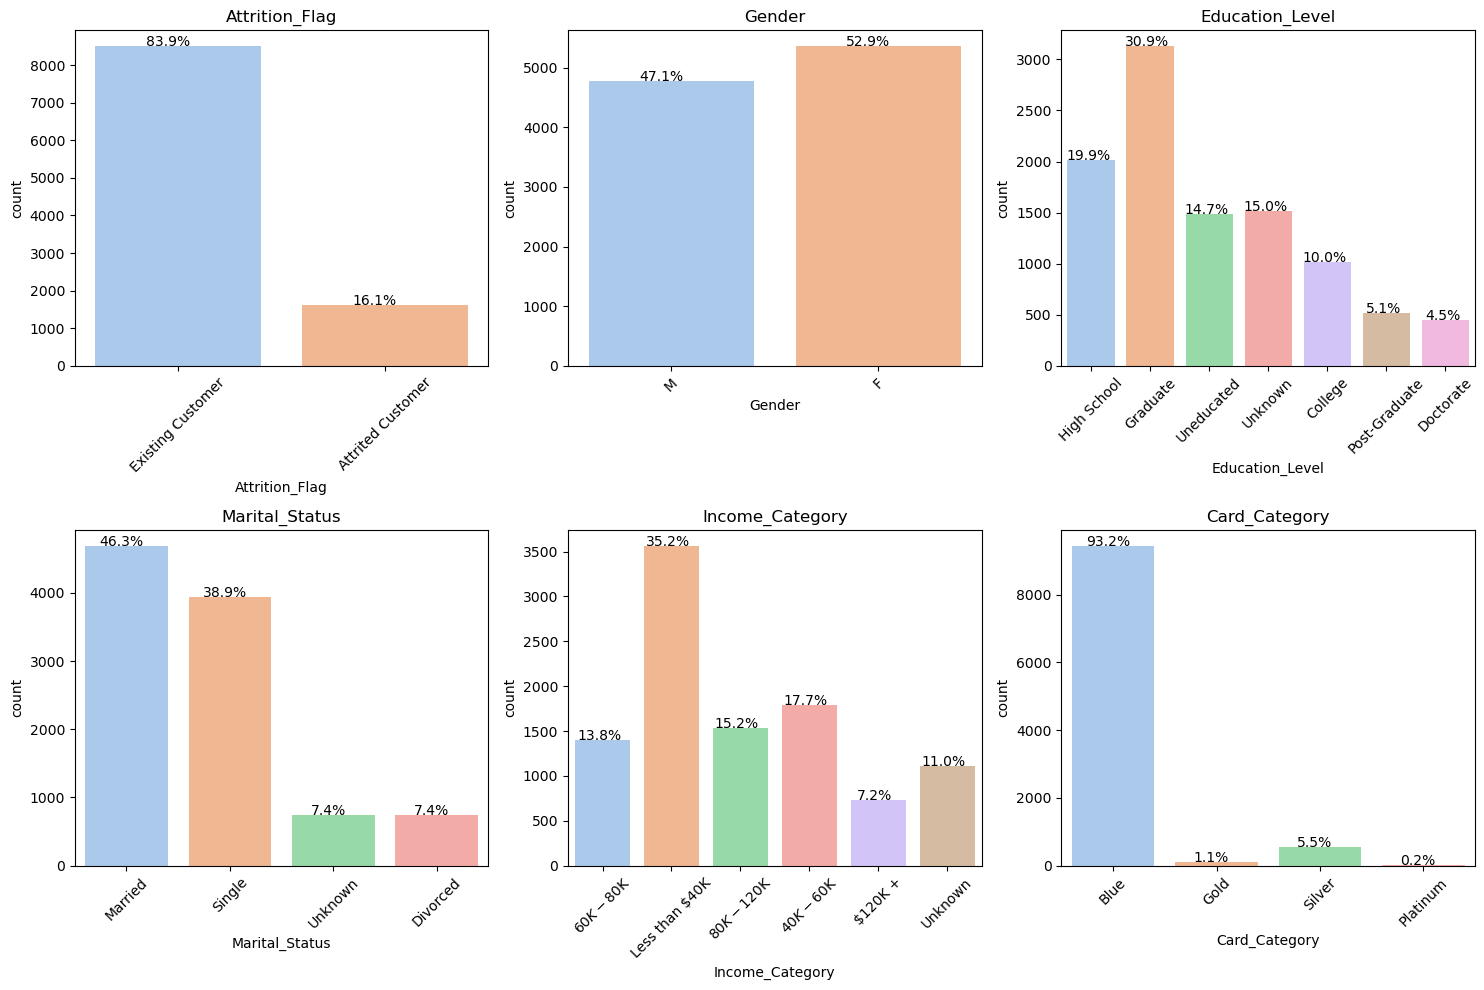

In [11]:
# Set up the figure with a specific size for the plots
plt.figure(figsize=(15, 10))

# Loop through each categorical feature in the list
for i, feature in enumerate(categorical_features):

    # Create a subplot in a grid of 2 rows and 3 columns
    plt.subplot(2, 3, i+1)

    # Calculate the total number of non-NA/null entries for the current feature 
    total = df[feature].count()

    # Create a count plot for the current feature with a pastel color palette
    ax = sns.countplot(x=feature, data=df, palette="pastel")
    
    # Loop through each bar (patch) in the count plot
    for p in ax.patches:
        # Calculate the percentage of each category
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)

        # Calculate the position for the annotation (centered on the bar)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()

        # Annotate the bar with the calculated percentage
        ax.annotate(percentage, (x, y), ha='center')

    # Set the title of the subplot to the name of the current feature
    plt.title(feature)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

1. **Attrition_Flag**: The majority of the customers (83.9%) are existing customers, with a smaller portion (16.1%) having attrited. This indicates that the dataset primarily consists of current customers.

2. **Gender**: The distribution between male and female customers is relatively balanced, with a slightly higher percentage of female customers (52.9%) compared to male customers (47.1%).

3. **Education_Level**: The customers' education levels vary, with the majority holding high school diplomas (30.9%) and graduate degrees (19.9%). A significant portion is uneducated (14.7%) or have unknown education levels (15.0%), and a smaller group have completed college (10.0%), post-graduate (5.1%), or doctorate studies (4.5%).

4. **Marital_Status**: Married customers make up nearly half of the dataset (46.3%), followed by single customers (38.9%). A small percentage of customers have an unknown marital status (7.4%) or are divorced (7.4%).

5. **Income_Category**: The largest income category represented is "Less than \\$40K" (35.2%), followed by "\\$40K - \\$60K" (17.7%) and "\\$60K - \\$80K" (13.8%). Other categories include "\\$80K - \\$120K" (15.2%) and "\\$120K +" (7.2%), with a small portion having an unknown income category (11.0%).

6. **Card_Category**: The overwhelming majority of customers have a blue card (93.2%), indicating that it's the most common card type. A small minority have gold (1.1%), silver (5.5%), or platinum (0.2%) cards.

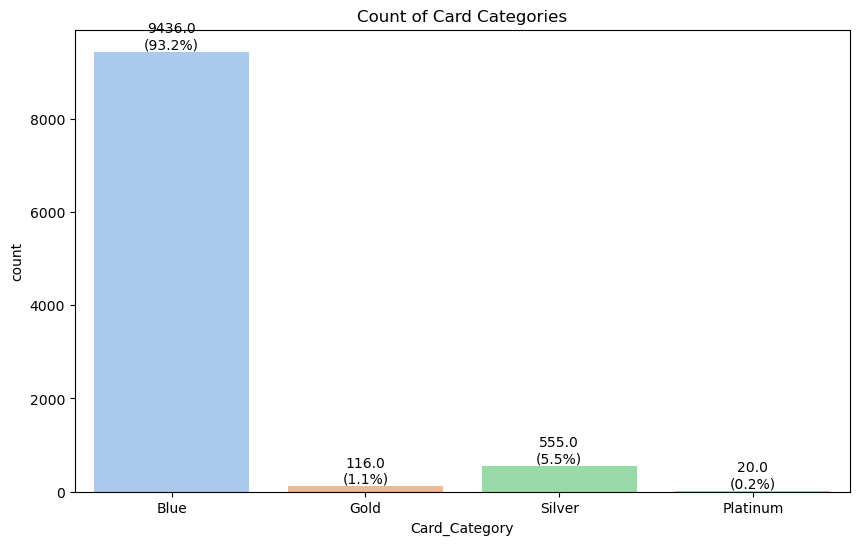

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Card_Category', data=df, palette="pastel")
plt.title('Count of Card Categories')

# Calculate the total number of observations to calculate percentages
total_count = len(df)

# Annotating the bars with the count and percentage
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total_count:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom')

plt.show()

There are only 20 'Platinum' and 116 'Gold', which represents smaller size of dataset. Thus, both of them will be combined into the same category later in data preprocessing phase.

### 4.1.2 Numerical Variables

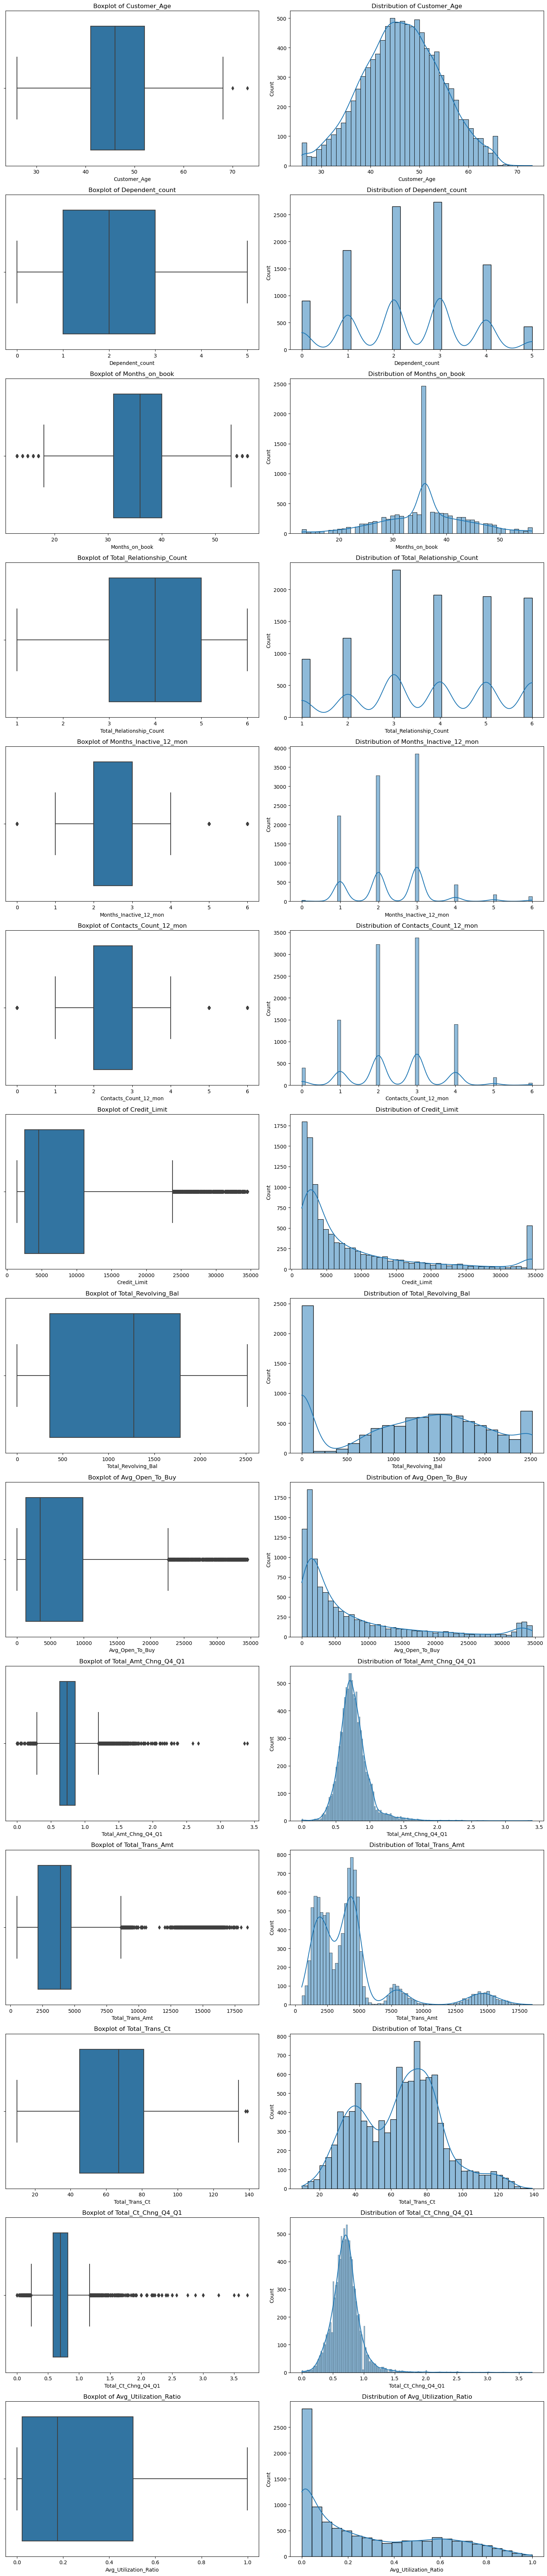

In [13]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))


for i, feature in enumerate(numerical_features):
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature}')
    axes[i, 0].set_xlabel(feature)
    
    # Distribution plot
    sns.histplot(df[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {feature}')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.show()

1. **Customer_Age**: The distribution of customer age appears to be fairly normally distributed with a slight right skew. The boxplot indicates that the bulk of customers fall between the mid-40s to mid-50s with some outliers on the higher age range.

2. **Dependent_count**: This variable shows that most customers have between 0 to 3 dependents. There are outliers present with a higher number of dependents.

3. **Months_on_book**: The number of months customers have been with the bank appears to be normally distributed with a peak around 36 months. The boxplot shows a fairly symmetric distribution without many outliers.

4. **Total_Relationship_Count**: It shows a multi-modal distribution, suggesting specific numbers of products are more common, such as 3 or 6.

5. **Months_Inactive_12_mon**: Most customers have been inactive for 1 to 3 months in the last 12 months, with a few outliers who have been inactive for longer.

6. **Contacts_Count_12_mon**: This variable shows that most customers had 2 to 3 contacts with the bank in the last 12 months, with a relatively small number of outliers indicating more frequent contact.

7. **Credit_Limit**: The distribution of credit limits is right-skewed, indicating that most customers have lower credit limits, with a few customers having very high credit limits.

8. **Total_Revolving_Bal**: This feature is also right-skewed, with many customers having lower revolving balances, and a few having higher balances.

9. **Avg_Open_To_Buy**: Similar to credit limit, this metric is right-skewed with most values clustered at the lower end of the scale.

10. **Total_Amt_Chng_Q4_Q1**: This variable shows the change in transaction amount from Q4 to Q1 and appears to be normally distributed with a peak around 0.7 to 0.8.

11. **Total_Trans_Amt**: The total transaction amount in the last 12 months is right-skewed with most customers having lower transaction amounts.

12. **Total_Trans_Ct**: The total number of transactions count over the last 12 months shows a distribution that is slightly left-skewed.

13. **Total_Ct_Chng_Q4_Q1**: The change in transaction count from Q4 to Q1 is normally distributed, similar to the total amount change.

14. **Avg_Utilization_Ratio**: The average card utilization ratio shows a right-skewed distribution, with a peak near zero and a long tail, indicating that while many customers have a low utilization ratio, there are some with higher ratios.

## 4.2 Bivariate Analysis
A type of analysis that focuses on investigating the relationship between two variables.

### 4.2.1 Numerical-Numerical Relationships

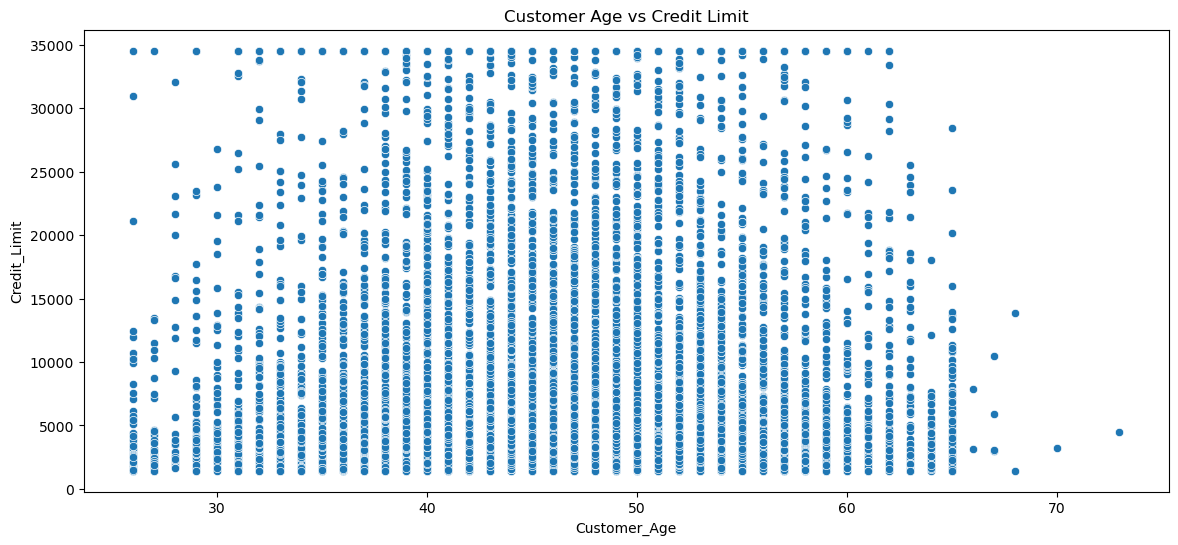

In [14]:
# Scatter plot for Customer_Age vs Credit_Limit
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Customer_Age', y='Credit_Limit')
plt.title('Customer Age vs Credit Limit')

plt.show()

The scatter plot for Customer_Age vs Credit_Limit doesn't show a distinct pattern, suggesting that there may not be a strong linear relationship between age and credit limit.

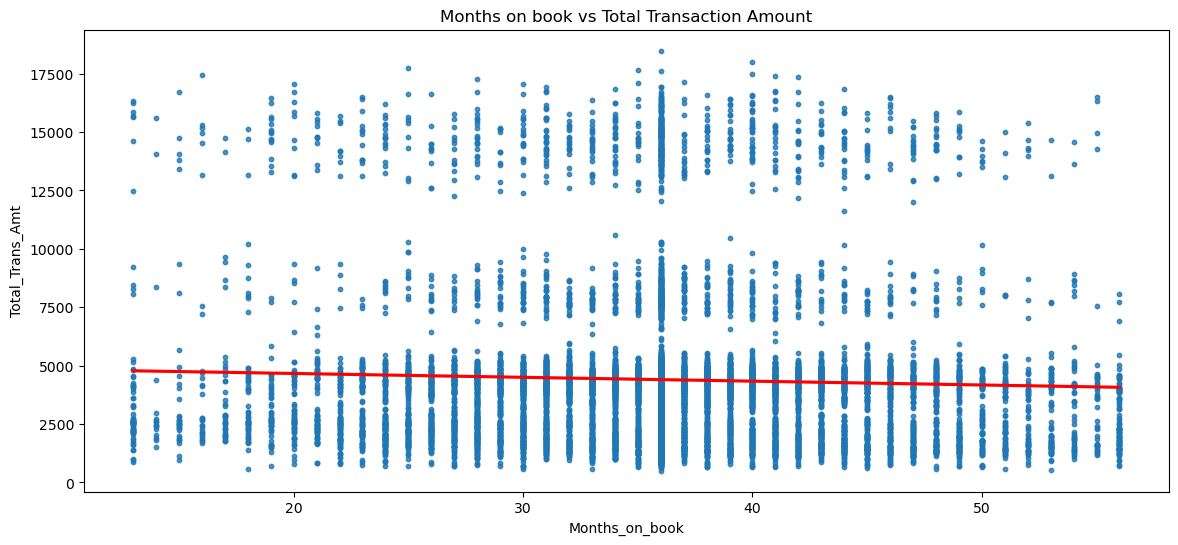

In [15]:
# Line plot with trend line for Months_on_book vs Total_Trans_Amt
plt.figure(figsize=(14, 6))
sns.regplot(data=df, x='Months_on_book', y='Total_Trans_Amt', ci=None, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Months on book vs Total Transaction Amount')

plt.show()

The scatter plot suggests there isn't a strong linear relationship between 'Months on book' and 'Total Transaction Amount'.

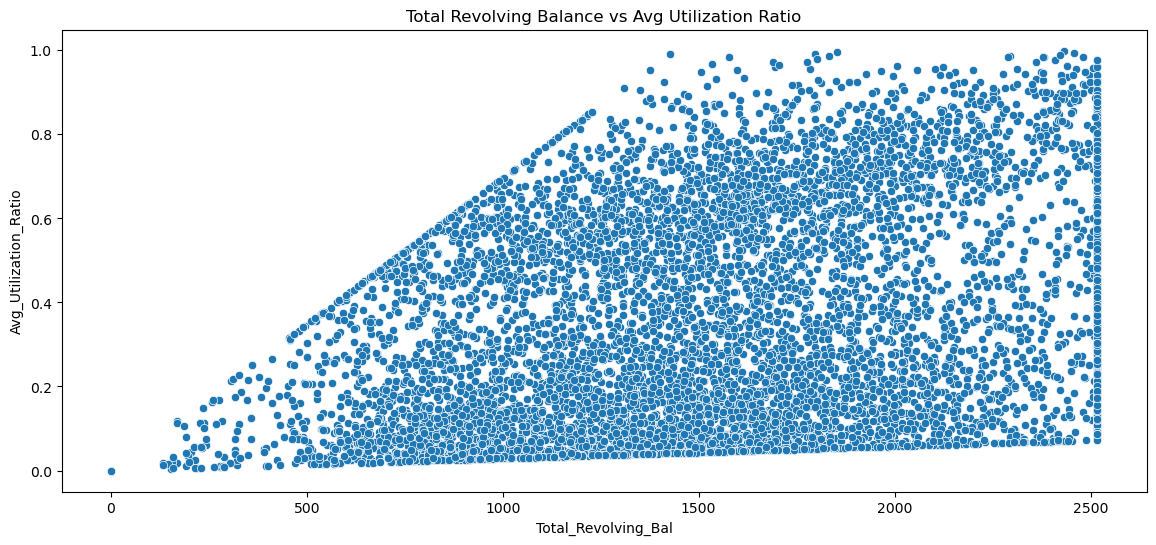

In [16]:
# Scatter plot for Total_Revolving_Bal vs Avg_Utilization_Ratio
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio')
plt.title('Total Revolving Balance vs Avg Utilization Ratio')

plt.show()

The scatter plot for Total_Revolving_Bal vs Avg_Utilization_Ratio indicates a possible positive correlation, as expected since utilization ratio is partially derived from the revolving balance.

### 4.2.2 Categorical-Numerical Relationships


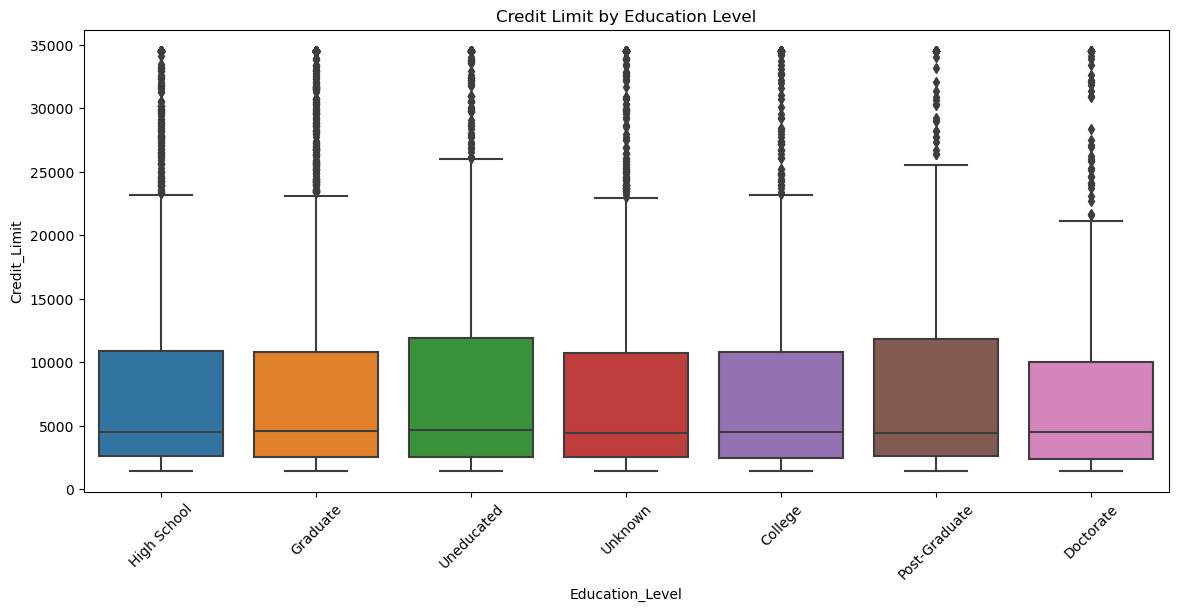

In [17]:
# Box plot for Credit_Limit across different Education_Level categories
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Education_Level', y='Credit_Limit')
plt.title('Credit Limit by Education Level')
plt.xticks(rotation=45)

plt.show()

The box plots indicate that there is some variation in credit limits among different education levels, although it does not appear to be a strong distinguishing factor. All categories show a wide range of credit limits with a large number of outliers on the higher end, suggesting that individuals with higher education levels do not necessarily have significantly higher credit limits than those with lower education levels. However, those with a doctorate show slightly higher median credit limits compared to other education levels.

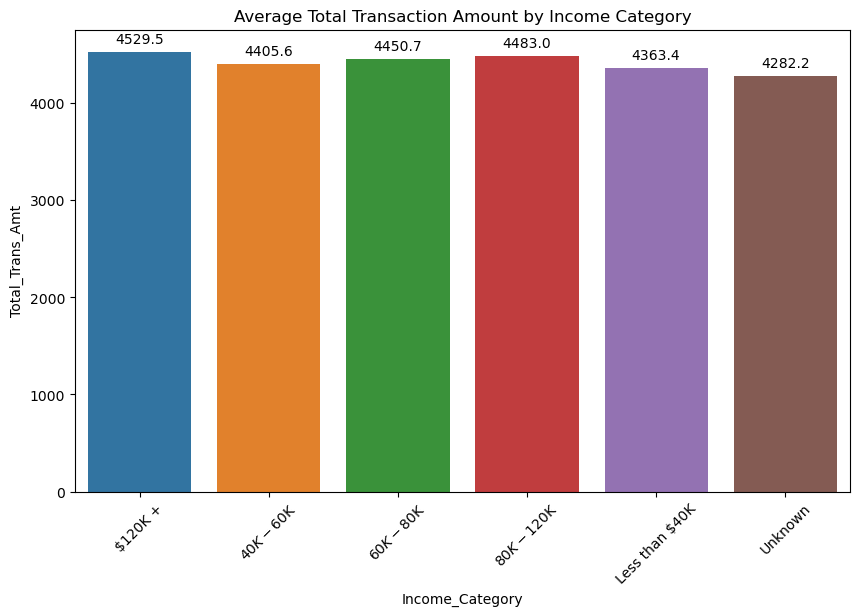

In [18]:
# Re-plotting the bar chart for average Total_Trans_Amt by Income_Category with value annotations
plt.figure(figsize=(10, 6))
avg_trans_amt_by_income = df.groupby('Income_Category')['Total_Trans_Amt'].mean().reset_index()
ax = sns.barplot(data=avg_trans_amt_by_income, x='Income_Category', y='Total_Trans_Amt')
plt.title('Average Total Transaction Amount by Income Category')
plt.xticks(rotation=45)

# Annotating the bars with the average value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

- The highest average transaction amount is observed in the "60K - 80K" income category, followed closely by the "80K - 120K" and "40K - 60K" categories.
- Interestingly, customers with an income of "Less than $40K" and those with "Unknown" income levels have a lower average transaction amount compared to the middle-income categories.

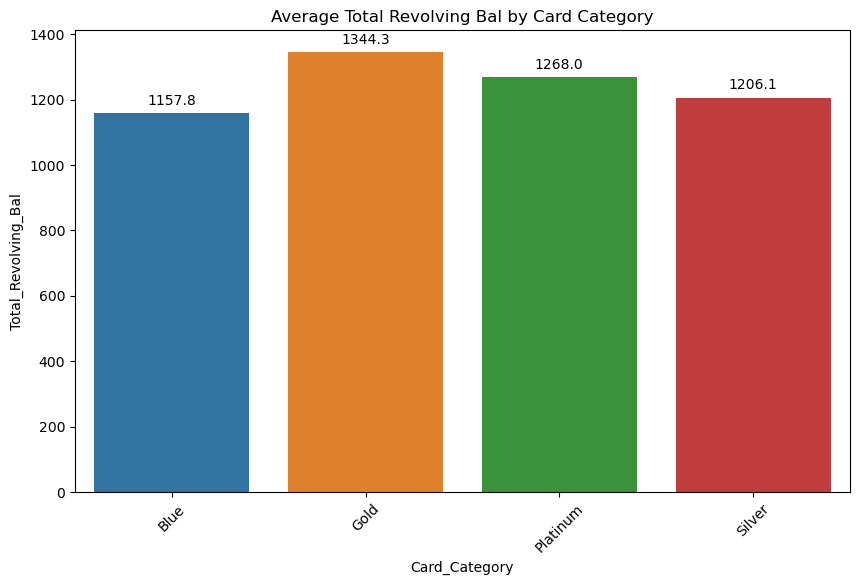

In [19]:
# Bar plot for average Total_Revolving_Bal for different Card_Category with value annotations
plt.figure(figsize=(10, 6))
avg_rev_bal_by_card = df.groupby('Card_Category')['Total_Revolving_Bal'].mean().reset_index()
ax = sns.barplot(data=avg_rev_bal_by_card, x='Card_Category', y='Total_Revolving_Bal')
plt.title('Average Total Revolving Bal by Card Category')
plt.xticks(rotation=45)

# Annotating the bars with the average value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

- Customers with gold cards have the highest average revolving balance at approximately \\$1344.3, indicating that they might be utilizing their credit line more than other cardholders.
- Platinum cardholders follow closely with an average revolving balance of about \\$1268.0. This group also tends to maintain a significant revolving balance, which could suggest a comfort level with utilizing available credit.
- Silver cardholders have an average revolving balance of around \\$1206.1, slightly less than platinum cardholders, but still indicative of substantial credit usage.
- Blue cardholders, which likely represent the entry-level card offering, have the lowest average revolving balance of \\$1157.8 among the card categories.

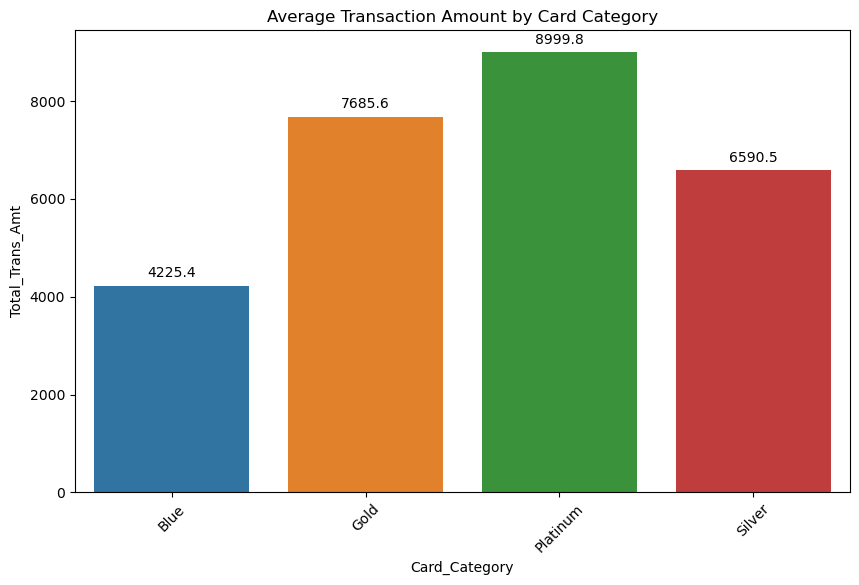

In [20]:
plt.figure(figsize=(10, 6))
avg_trans_amt_by_card = df.groupby('Card_Category')['Total_Trans_Amt'].mean().reset_index()
ax = sns.barplot(data=avg_trans_amt_by_card, x='Card_Category', y='Total_Trans_Amt')
plt.title('Average Transaction Amount by Card Category')
plt.xticks(rotation=45)

# Annotating the bars with the average value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

- Customers with platinum cards have the highest average transaction amount, coming in at approximately \\$8999.8. This suggests that customers who have platinum cards, which are often associated with higher credit limits and more features, tend to spend more.
- The next highest average transaction amount is seen with gold cardholders, averaging around \\$7685.6, followed by silver cardholders with \\$6590.5.
- Customers with blue cards, which are typically the most basic card type offered, have the lowest average transaction amount of \\$4225.4.
- This pattern indicates a clear correlation between the tier of the card category and the average transaction amount. Higher-tier cards (platinum and gold) are associated with higher average transaction amounts, which may reflect the spending power and behavior of the customers who hold these cards.

### 4.2.3 Categorical-Categorical Relationships

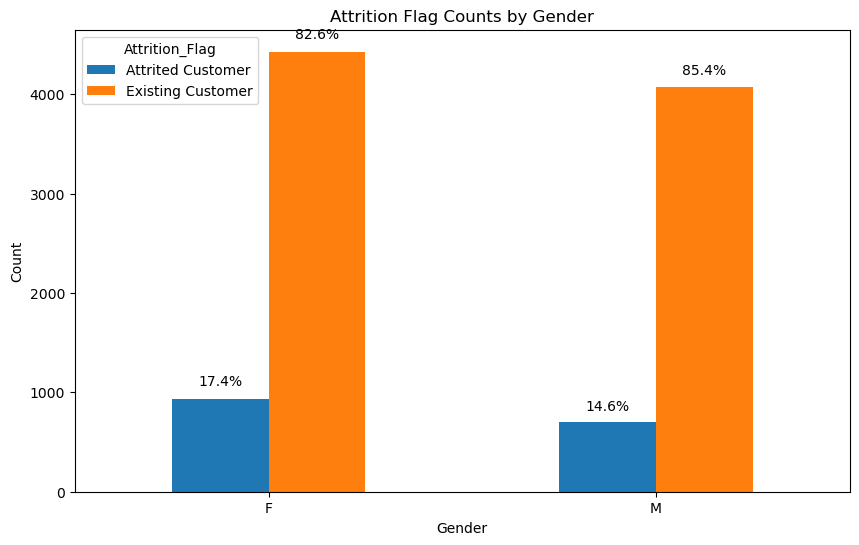

In [21]:
count_data = df.groupby(['Gender', 'Attrition_Flag']).size().unstack()
ax = count_data.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition Flag Counts by Gender')
plt.xticks(rotation=0)

# Calculate the total counts for each gender (sum over rows)
gender_totals = count_data.sum(axis=1)

# Annotating the bars with percentages
for rect in ax.patches:
    # Find the height and width of the bar
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # Get the gender from the x position of the bar
    gender = 'F' if x < width else 'M'  # Adjust according to how your bars are positioned
    
    # The total for the gender is taken from gender_totals using the gender
    total = gender_totals[gender]
    
    # Calculate the percentage
    percentage = f'{height/total:.1%}'
    
    # Annotate the percentage on the bar
    ax.text(
        x + width/2,
        y + height + 0.02 * total,  # Slightly above the top of the bar
        percentage,
        ha='center',
        va='bottom'
    )

plt.show()

For both genders, the majority of customers are existing (non-attrited), with a smaller percentage having attrited.
The exact percentages are annotated on each bar, showing the proportion of attrited and existing customers within each gender category.

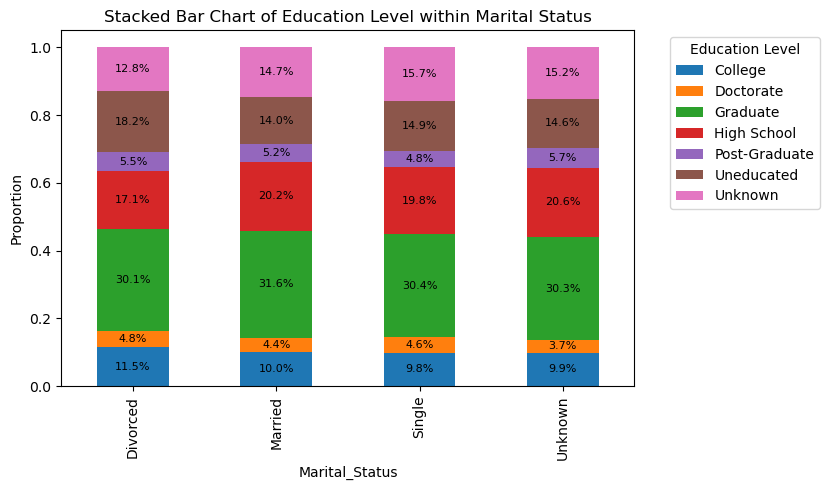

In [22]:
education_marital_crosstab = pd.crosstab(df['Marital_Status'], df['Education_Level'], normalize='index')

# Plotting the stacked bar chart
ax = education_marital_crosstab.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the title and labels
plt.title('Stacked Bar Chart of Education Level within Marital Status')
plt.ylabel('Proportion')

# Adjusting the legend to avoid blocking the graph
ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating the values on the bars
for n, bar_group in enumerate(ax.containers):
    for rect in bar_group:
        # Calculating the height and width of the bar
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The label is positioned at the center of the bar segment
        label_x = x + width / 2
        label_y = y + height / 2

        # Only add a label to the bar segment if the height is sufficient
        if height > 0.01:  # Threshold can be adjusted based on the dataset
            value = f'{height:.1%}'
            ax.text(label_x, label_y, value, ha='center', va='center', fontsize=8, color='black')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the layout to fit both the graph and the legend
plt.show()

- For each marital status, the proportions of education levels are stacked to sum to 100%, allowing for an easy comparison of the educational composition within each category.
- Divorced customers have the highest proportion of individuals with a high school education, while married customers have the highest proportion of college-educated individuals.
- Single and unknown marital status categories have a more even distribution across high school, graduate, and college education levels.
- Post-graduate levels are relatively low across all marital statuses but are most prevalent among married customers.
- The 'Unknown' education level is significant across all marital statuses, indicating a sizable proportion of customers whose education level is not recorded or is ambiguous.

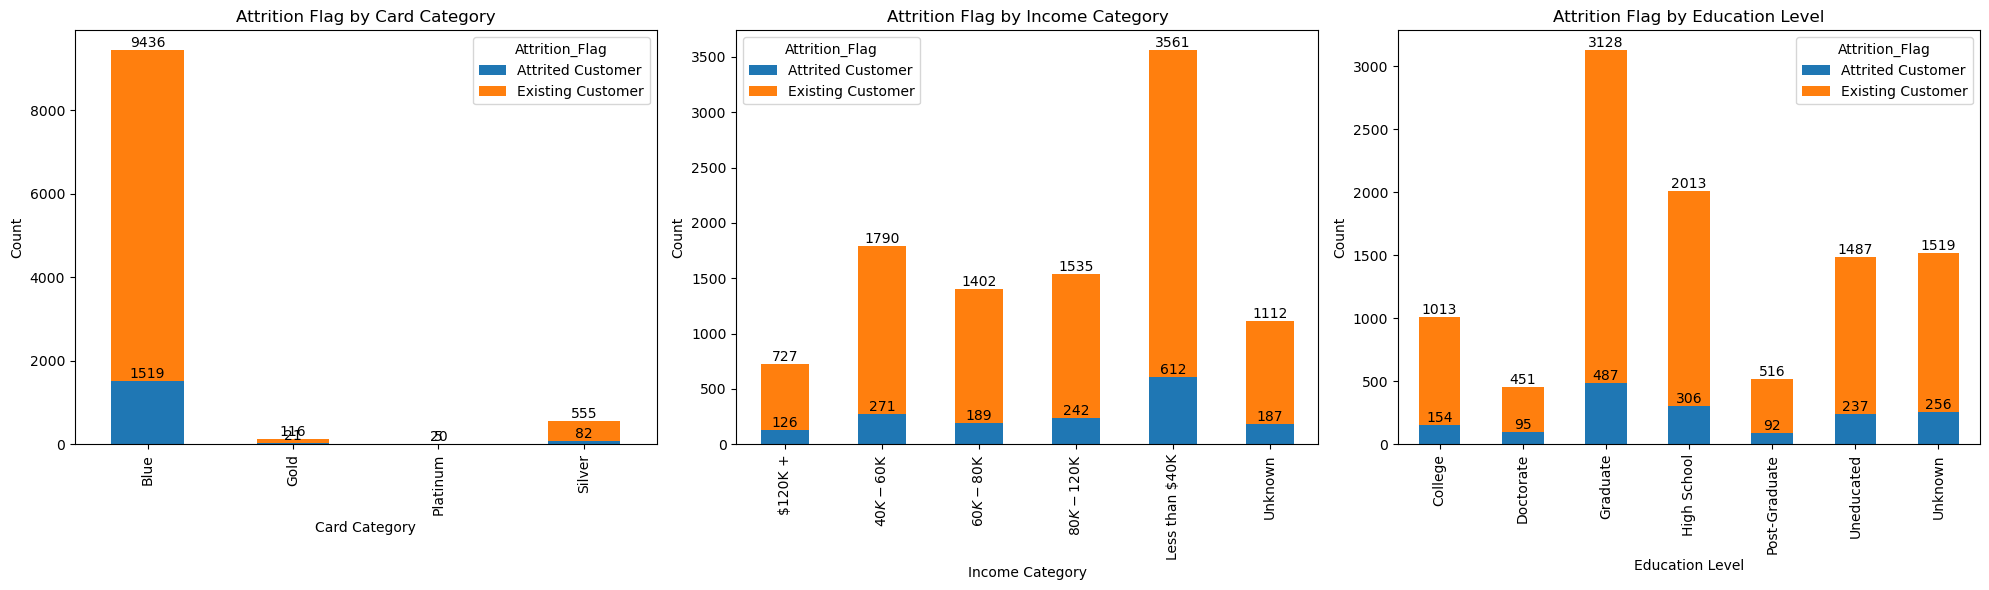

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Bar plot for Attrition_Flag with Card_Category
attrition_card_cat = df.groupby(['Card_Category', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Attrition Flag by Card Category')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Card Category')

# Bar plot for Attrition_Flag with Income_Category
attrition_income_cat = df.groupby(['Income_Category', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Attrition Flag by Income Category')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Income Category')

# Bar plot for Attrition_Flag with Education_Level
attrition_education_level = df.groupby(['Education_Level', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Attrition Flag by Education Level')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Education Level')

# Adding value annotations to each bar in all the plots
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container)

# Adjusting layout
plt.tight_layout()
plt.show()

**Attrition Flag by Card Category**:  

- The majority of customers in each card category are existing customers. However, the attrition seems to be relatively higher in the platinum and silver card categories compared to blue and gold.
- The blue card category has the highest number of customers overall, with the vast majority being existing customers and a small number who have attrited.
- Gold cards have a higher number of existing customers compared to attrited customers, but the absolute numbers are much smaller than in the blue card category.
- Platinum and silver card categories have the lowest total counts but show a visible proportion of attrition.


**Attrition Flag by Income Category**:

- Customers in the "Less than \\$40K" income category show the highest count of attrition compared to other income categories.
"40K - \\$60K" and "60K - \\$80K" income categories follow with the second and third highest counts of attrition, respectively.
- The "\\$120K+" category, while having a smaller customer base, shows a relatively low number of attritions.


**Attrition Flag by Education Level**:

- Customers with a graduate education level show the highest count of attrition, followed by those with a high school education.
- Doctorate and post-graduate customers have the lowest counts of attrition, which might suggest a correlation between higher education levels and lower attrition rates.
- The "Unknown" education level category also shows a significant count of attrition, indicating that not having this information might be associated with a higher attrition rate.

### Temporal-Numerical Relationships

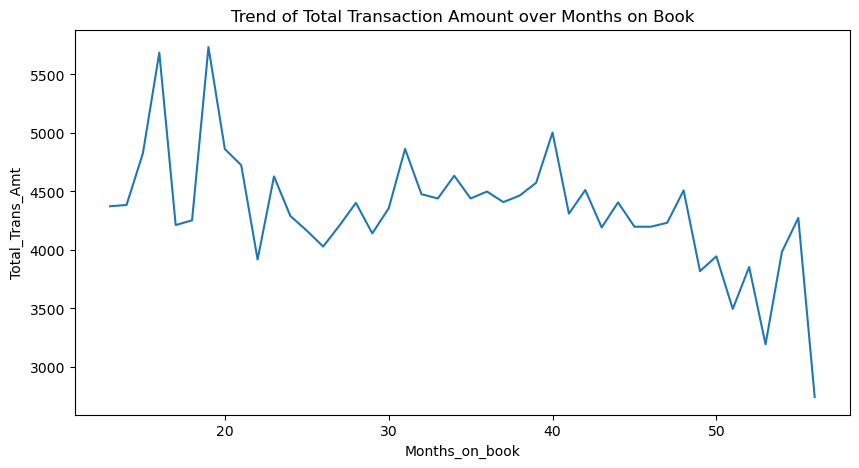

In [24]:
# Line plot for Total_Trans_Amt over Months_on_book
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Months_on_book', y='Total_Trans_Amt', errorbar=None, estimator=np.mean)
plt.title('Trend of Total Transaction Amount over Months on Book')
plt.show()

- The line graph fluctuates significantly, suggesting that the average total transaction amount varies considerably from month to month.
- There are peaks in the transaction amount at various points, most notably in the early months and around the 20-30 month range. This could indicate periods when customers are more actively transacting, possibly due to promotions or lifecycle events.
- The general trend does not show a clear increase or decrease over time, implying that the relationship between the length of the customer's relationship with the bank (months on book) and their transaction amount is not linear.

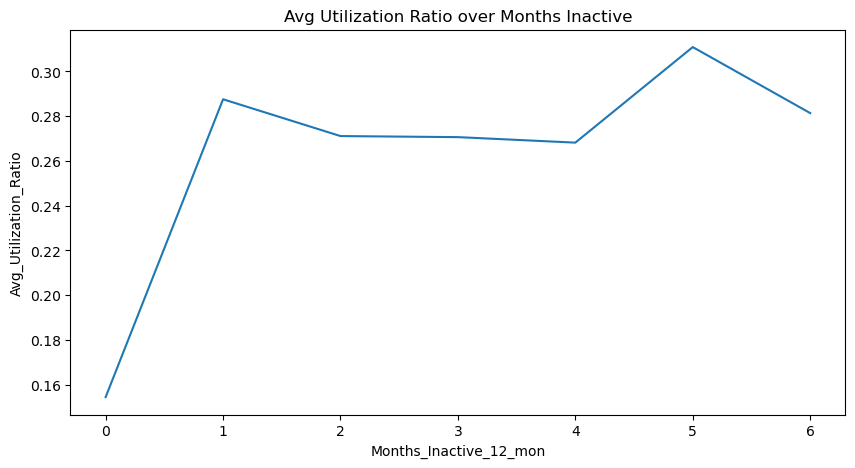

In [25]:
# Line plot for Avg_Utilization_Ratio over Months_Inactive_12_mon
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Months_Inactive_12_mon', y='Avg_Utilization_Ratio', errorbar=None, estimator=np.mean)
plt.title('Avg Utilization Ratio over Months Inactive')
plt.show()

- The average utilization ratio decreases sharply after the first month of inactivity and then levels off.
- It appears that customers who are inactive for one month have a higher average utilization ratio, which might indicate that these customers are temporarily inactive but still maintain their credit usage.
- After one month of inactivity, the utilization ratio remains relatively consistent across the 2-6 month inactivity range, suggesting that longer-term inactive customers tend to use a smaller portion of their credit line.

### 4.2.4 Temporal-Categorical Relationships

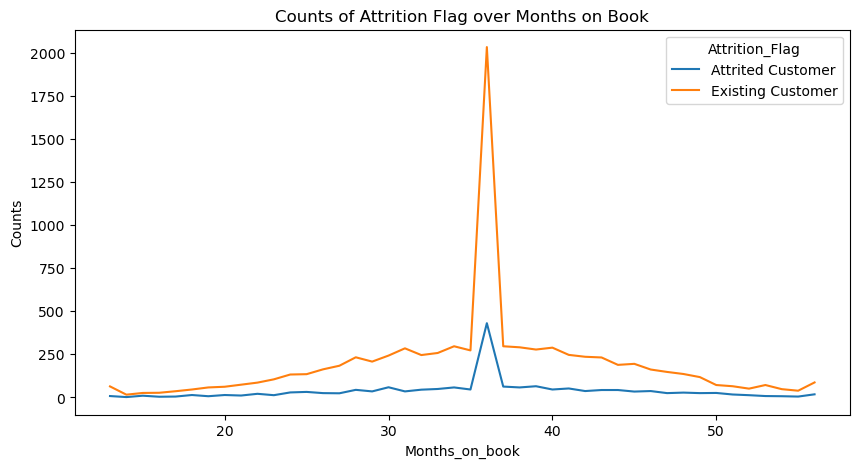

In [26]:
attrition_months_crosstab = df.groupby(['Months_on_book', 'Attrition_Flag']).size().unstack().fillna(0)
attrition_months_crosstab.plot(kind='line', figsize=(10, 5))
plt.title('Counts of Attrition Flag over Months on Book')
plt.ylabel('Counts')
plt.show()

- The counts of attrition (both for attrited and existing customers) are relatively stable across the majority of the time span, with a significant spike in attrition counts around 36 months.
- This spike could indicate a common point in the customer lifecycle where a large number of customers decide to leave, possibly due to the end of a promotional period or a common contract term.
- After the spike, the counts for existing customers continue as before, indicating that the event at 36 months does not significantly impact the remaining customer base in the long term.

___
<hr style="height: 3px; border-width:0;">

# 5.0 Data Preprocessing

In this phase, we will examine the dataset for missing or duplicated values, remove outliers, handle ordinal data through mapping, and manage nominal data using one-hot encoding.

In [11]:
# Check for nan values for each column
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
# Check if there is any duplicated records
df.duplicated().sum()

0

Since there are outliers in the numerical features, we will remove them if the values exceed lower bound and upper_bound

In [13]:
from collections import Counter

In [14]:
def count_outliers(data, features, threshold):
    """
    Counts the number of unique outliers across given features within a dataset.
    
    This function identifies outliers based on the interquartile range (IQR) method.
    An outlier is defined as a data point that lies outside the 1st quartile (Q1) and 
    3rd quartile (Q3) by a certain threshold.

    Parameters:
    - data (DataFrame): The dataset containing the features to analyze.
    - features (list): A list of column names (strings) in the dataset for which outliers are to be counted.
    - threshold (float): The multiplier for IQR to determine the cutoff beyond which data points are considered outliers.
    
    Returns:
    int: The number of unique outliers across the specified features.

    Note: A data point is counted as a unique outlier if it is an outlier in any of the specified features.
    """
    
    outlier_indices = []
    
    # Iterate through each feature to calculate outliers
    for feature in features:
        # Calculate first, third quartiles and interquartile range
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Determine lower and upper bound for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Find indices of data points that are outside the bounds (outliers)
        feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index

        # Extend the list of outlier indices with the newly found outliers
        outlier_indices.extend(feature_outliers)
    
    # Count the occurrences of each outlier index
    outlier_count = Counter(outlier_indices)
    # Calculate the number of unique outliers
    unique_outlier_count = len(set(outlier_indices))
    
    return unique_outlier_count

In [15]:
# Calculate and print number of outliers in dataset
outliers_rows = count_outliers(df, numerical_features, 1.5)
print(f'Number of rows with outliers: {outliers_rows}')

Number of rows with outliers: 3326


In [16]:
# Current dataset's size before removing outliers
df.shape

(10127, 20)

If we remove the rows with outliers with accounting how many outliers it has, we will remove 32.8% data from the dataset, which making the dataset more smaller. Thus, we should remove the outliers based on the number of outliers that it has.

In [17]:
def detect_outliers(data, features, n, threshold):
    """
    Detects outliers across specified features within a dataset based on the interquartile range (IQR) method. 
    An outlier is defined as a data point that is beyond the 1st quartile (Q1) and 3rd quartile (Q3) by a specified threshold.
    This function further identifies data points that are considered outliers in more than 'n' features.

    Parameters:
    - data (DataFrame): The Pandas DataFrame containing the dataset.
    - features (list of str): A list of column names (strings) in the dataset to check for outliers.
    - n (int): The minimum number of features for which a data point must be an outlier to be included in the return list.
    - threshold (float): The multiplier for IQR to set the bounds for detecting outliers.
    
    Returns:
    list: A list of indices of data points that are outliers in more than 'n' features.

    Note: The function returns the indices of data points that are considered outliers in multiple features,
    providing a way to identify the most extreme outliers that could potentially skew the analysis.
    """

    outlier_indices = []

    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outlier_list_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices.extend(outlier_list_col)

    outlier_count = Counter(outlier_indices)

    # Identify indices of data points that are outliers in more than 'n' features
    multiple_outliers = [index for index, count in outlier_count.items() if count > n]

    return multiple_outliers

In [18]:
# Determine and remove records with more than 1 outliers
outliers_indices = detect_outliers(df, numerical_features, n=1, threshold=1.5)
print(f'Number of rows with outliers: {len(outliers_indices)}')

df = df.drop(index=outliers_indices)

Number of rows with outliers: 1274


In [19]:
# Current dataset's size after removing outliers
df.shape

(8853, 20)

In [20]:
# Perform mapping for ordinal data
mappings = {
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Education_Level': {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 
                        'Post-Graduate': 4, 'Graduate': 5, 'Doctorate': 6},
    'Income_Category': {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, 
                        '$80K - $120K': 4, '$120K +': 5},
    'Card_Category': {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 2}
}

for feature, mapping in mappings.items():
    df[feature] = df[feature].map(mapping)

df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
5                0            44      M                2                5   
9                0            48      M                2                5   
10               0            42      M                5                1   
13               0            35      M                3                5   
14               0            57      F                2                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
5         Married                2              0              36   
9          Single                4              0              36   
10        Unknown                5              0              31   
13        Unknown                3              0              30   
14        Married                1              0              48   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
5                          3                       1                      2   
9                          6                       3                      3   
10                         5                       3                      2   
13                         5                       1                      3   
14                         5                       2                      2   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
5         4010.0                 1247           2763.0                 1.376   
9        11656.0                 1677           9979.0                 1.524   
10        6748.0                 1467           5281.0                 0.831   
13        8547.0                 1666           6881.0                 1.163   
14        2436.0                  680           1756.0                 1.190   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
5              1088              24                0.846   
9              1441              32                0.882   
10             1201              42                0.680   
13             1311              33                2.000   
14             1570              29                0.611   

    Avg_Utilization_Ratio  
5                   0.311  
9                   0.144  
10                  0.217  
13                  0.195  
14                  0.279

In [21]:
# Original columns number
len(df.columns)

20

Some of the independent variables will be highly correlated/has strong variance inflation factors with other independent variables. Thus, k-1 (where k is number of categories in a categorical variable) approach will be performed for nominal categorial features by removing one of the categories.

In [22]:
# Perform one-hot encoding for nominal data
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

df = df.drop(columns=['Gender_M', 'Marital_Status_Unknown'])

# Checking the new length of columns
len(df.columns)

22

In [23]:
df.head()

Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
5                0            44                2                5   
9                0            48                2                5   
10               0            42                5                1   
13               0            35                3                5   
14               0            57                2                5   

    Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
5                 2              0              36                         3   
9                 4              0              36                         6   
10                5              0              31                         5   
13                3              0              30                         5   
14                1              0              48                         5   

    Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
5                        1                      2        4010.0   
9                        3                      3       11656.0   
10                       3                      2        6748.0   
13                       1                      3        8547.0   
14                       2                      2        2436.0   

    Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
5                  1247           2763.0                 1.376   
9                  1677           9979.0                 1.524   
10                 1467           5281.0                 0.831   
13                 1666           6881.0                 1.163   
14                  680           1756.0                 1.190   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
5              1088              24                0.846   
9              1441              32                0.882   
10             1201              42                0.680   
13             1311              33                2.000   
14             1570              29                0.611   

    Avg_Utilization_Ratio  Gender_F  Marital_Status_Divorced  \
5                   0.311         0                        0   
9                   0.144         0                        0   
10                  0.217         0                        0   
13                  0.195         0                        0   
14                  0.279         1                        0   

    Marital_Status_Married  Marital_Status_Single  
5                        1                      0  
9                        0                      1  
10                       0                      0  
13                       0                      0  
14                       1                      0

___
<hr style="height: 3px; border-width:0;">

# 6.0 Correlation Assessment
Determine the correlation between columns.

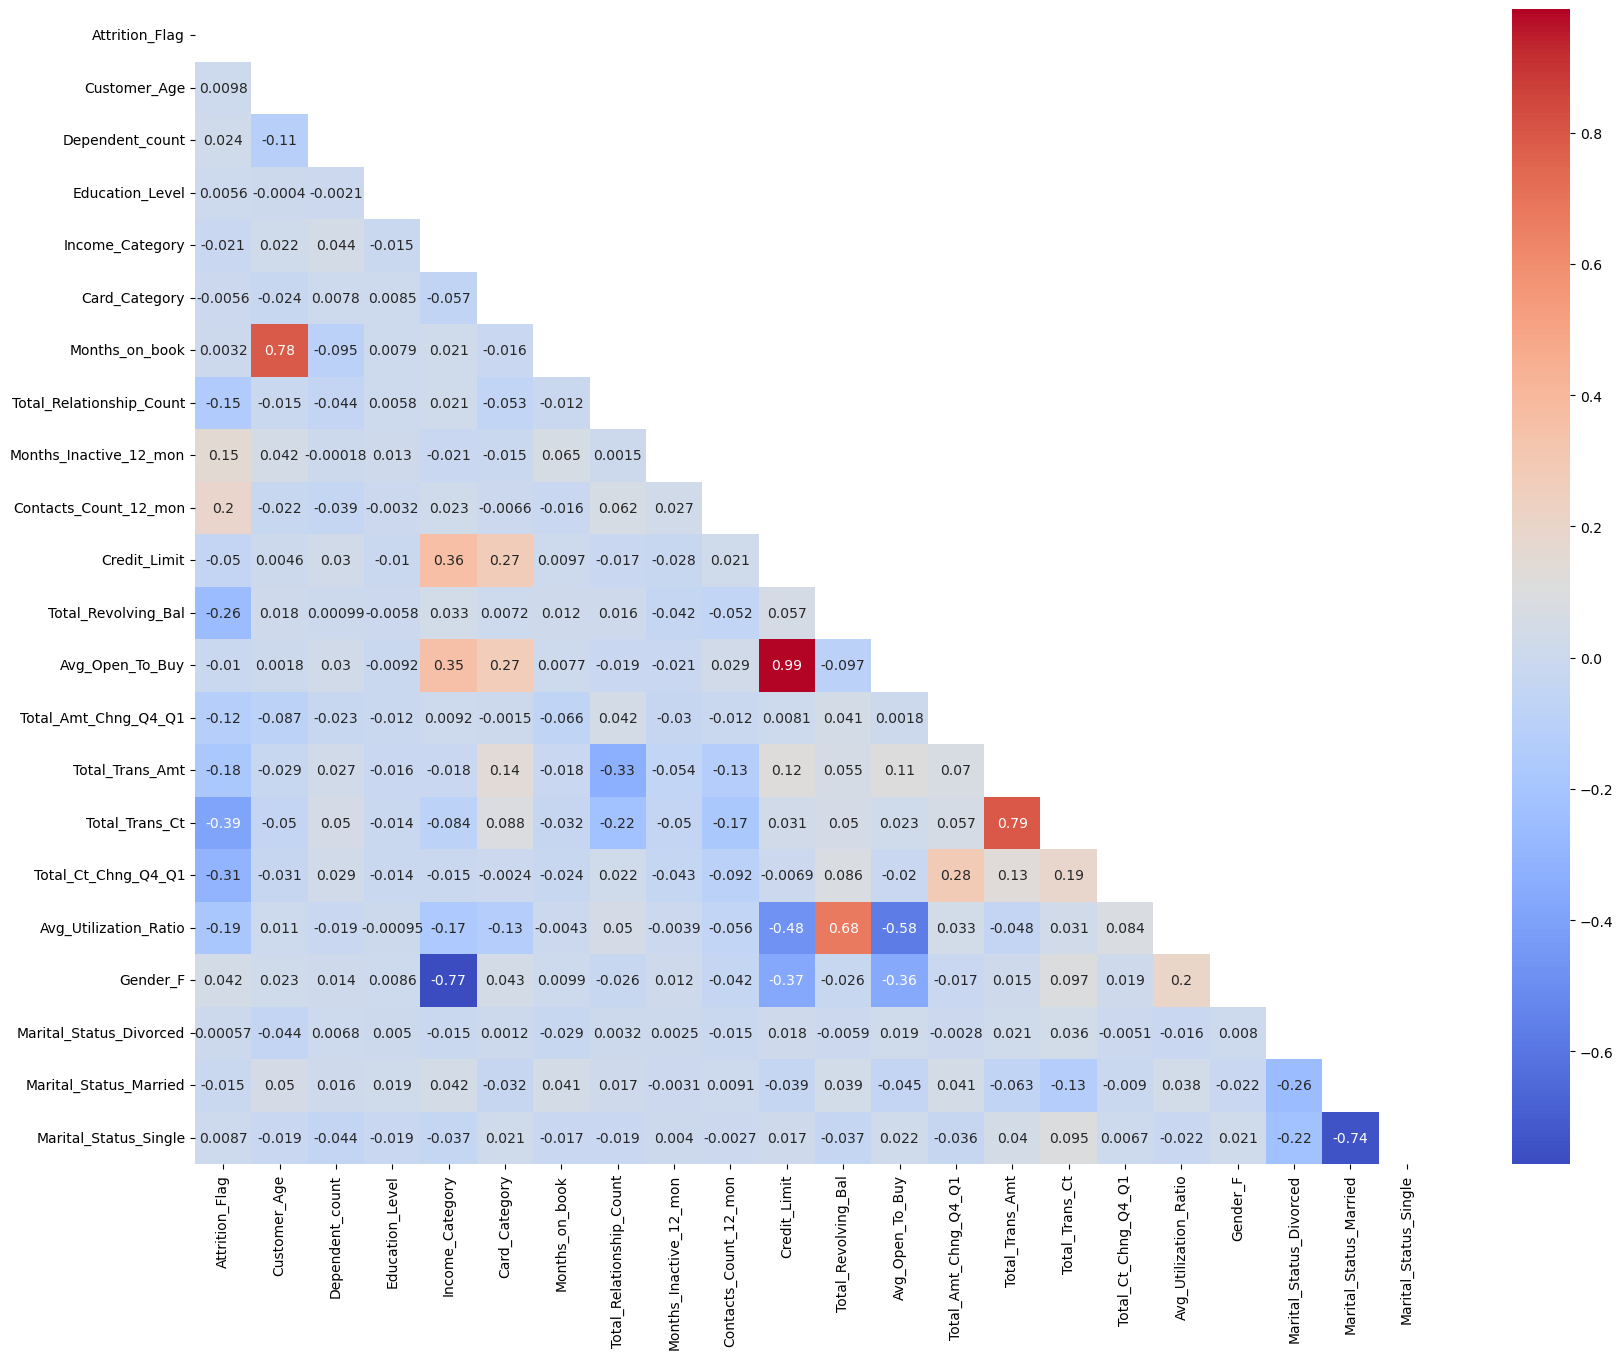

In [24]:
plt.figure(figsize=(20, 15))

correlation_matrix = df.corr()

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Display the lower triangle of the correlation matrix with a heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True)
plt.show()

There appears to be a strong positive linear relationship between 'Avg Open To Buy' and 'Credit Limit', which makes sense as 'Avg Open To Buy' is typically calculated as the difference between the credit limit and the current balance on the account. Therefore, as the credit limit increases, the 'Avg Open To Buy' would also increase if the balance remains constant or does not increase proportionally.

In [25]:
# Drop 'Avg_Open_To_Buy' column
df = df.drop(columns=['Avg_Open_To_Buy'])
len(df.columns)

21

In [26]:
# Update numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

___
<hr style="height: 3px; border-width:0;">

# 7.0 Data Splitting and Scaling

This phase involves splitting the data into training and testing sets. Afterwards, numerical features are normalized to enhance the training speed. Imbalanced data is then addressed using the Synthetic Minority Oversampling Technique (SMOTE) after performing feature selection.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
# Set seed values
seed_value = 42
np.random.seed(seed_value)

n_jobs_value = -1

In [29]:
# Form label dataset
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

x.shape, y.shape

((8853, 20), (8853,))

In [30]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=seed_value)

print(f"Training set: {X_train.shape[0]}")
print(f"Testing set: {X_test.shape[0]}")

Training set: 7082
Testing set: 1771


In [31]:
# Check number of instances for each label
y_train.value_counts()

0    5940
1    1142
Name: Attrition_Flag, dtype: int64

Because the data is imbalanced, SMOTE is used to deal with under-sampling problem. SMOTE will be applied after performing feature selection.

In [32]:
# Perform scaling on the dataset
scaler = StandardScaler()

scaler.fit(X_train[numerical_features])

X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled

In [33]:
X_train

Customer_Age  Dependent_count  Education_Level  Income_Category  \
7618      0.835428        -0.259747                3                1   
3991     -0.669501         0.512515                4                5   
9788     -1.923609        -1.032008                4                1   
5900      1.086250        -0.259747                3                1   
3604     -0.669501         0.512515                5                2   
...            ...              ...              ...              ...   
6497      0.584607         0.512515                1                4   
5926     -1.045733         0.512515                0                4   
6143     -0.669501         1.284776                3                2   
1068     -1.421966        -0.259747                2                0   
8082      1.587893        -1.032008                5                2   

      Card_Category  Months_on_book  Total_Relationship_Count  \
7618              0        1.028900                 -0.552071   
3991              0       -0.886259                  1.386657   
9788              1        0.007482                  1.386657   
5900              0        0.901223                  0.740414   
3604              0       -0.886259                  0.740414   
...             ...             ...                       ...   
6497              0        0.518191                 -0.552071   
5926              0       -0.758582                  0.740414   
6143              0       -0.886259                  0.740414   
1068              0        0.007482                 -0.552071   
8082              0        0.007482                 -1.844556   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
7618                0.686473               0.508024     -0.888710   
3991               -1.354930               0.508024     -0.501334   
9788                0.686473               2.357330      1.200967   
5900               -0.334229              -1.341282     -0.741668   
3604               -1.354930               0.508024     -0.791002   
...                      ...                    ...           ...   
6497               -0.334229              -0.416629     -0.566793   
5926               -1.354930               0.508024     -0.472348   
6143               -0.334229               0.508024     -0.541646   
1068               -0.334229               1.432677     -0.342391   
8082               -0.334229               0.508024     -0.497687   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
7618            -1.409461              0.859894        -0.446157   
3991             1.654419              0.619438         0.205175   
9788            -1.409461              0.465955         1.067489   
5900             0.228847             -0.480522         0.103556   
3604            -0.103705              0.660367        -0.374540   
...                   ...                   ...              ...   
6497            -1.409461             -0.009841        -0.239370   
5926            -0.524286             -0.367968         0.096136   
6143            -1.409461              0.629670        -0.423252   
1068            -0.002228             -0.807952        -0.763597   
8082            -0.258978             -0.178672         0.198078   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
7618       -0.735796            -0.493364              -1.080413         1   
3991        0.639172            -0.588729               1.496335         0   
9788        0.239988            -0.359853              -1.080413         0   
5900        0.373049            -0.555351               1.065681         1   
3604       -0.292258             0.798832               0.853942         1   
...              ...                  ...                    ...       ...   
6497        0.594819             0.732077              -1.080413         0   
5926        0.639172             0.636712              -0.366245         0   


___
# 8.0 Feature Selection and Statistical Test
Two methods - Permutation Importance with Extra Tree Classifier and SelectKBest with f_classif are employed to determine top 15 features. The selected features from both methods will be fitted to a simple logistic regression model. The selected features from method that gives high accuracy score will undergo Wald Test to determine the significance of selected variables with p-value lower than 0.05.

In [34]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [35]:
# Logistic Regression for all features
log_reg_all = LogisticRegression(max_iter=1000, random_state=seed_value)
log_reg_all.fit(X_train, y_train)

# Predict on the training set
y_test_pred_all = log_reg_all.predict(X_test)

# Calculate accuracy on the training set
accuracy_all = accuracy_score(y_test, y_test_pred_all)

In [36]:
# Coefficients, p-values, and confidence intervals from logistic regression using statsmodels - waltstat
X_train_sm = sm.add_constant(X_train)  # Add a constant to the model
logit_model_all = sm.Logit(y_train, X_train_sm)
result_all = logit_model_all.fit(disp=False)

# Extracting the results
coefficients_all = result_all.params
p_values_all = result_all.pvalues
conf_int_all = result_all.conf_int(alpha=0.05)  # 95% confidence interval

In [37]:
# Creating a DataFrame to display the results
coefficients_df_all = pd.DataFrame({
    'Coefficient': coefficients_all,
    'P-value': p_values_all,
    '95% CI Lower': conf_int_all[0],
    '95% CI Upper': conf_int_all[1]
})

In [38]:
# Displaying the accuracy and the DataFrame with coefficients and Wald test results
print(f"Accuracy on the training set: {accuracy_all}")
coefficients_df_all

Accuracy on the training set: 0.8961038961038961


Coefficient        P-value  95% CI Lower  \
const                       -3.584415   1.392709e-43     -4.091897   
Customer_Age                -0.015401   8.294628e-01     -0.155540   
Dependent_count              0.140084   2.776983e-03      0.048301   
Education_Level             -0.006794   7.725362e-01     -0.052864   
Income_Category              0.141151   8.809855e-03      0.035533   
Card_Category                0.380879   1.067580e-01     -0.081947   
Months_on_book              -0.127102   7.521002e-02     -0.267118   
Total_Relationship_Count    -0.693777   2.954387e-41     -0.794853   
Months_Inactive_12_mon       0.555246   1.848137e-32      0.463508   
Contacts_Count_12_mon        0.545123   3.021527e-29      0.449953   
Credit_Limit                -0.204220   1.849344e-03     -0.332780   
Total_Revolving_Bal         -0.656887   1.363371e-16     -0.812606   
Total_Amt_Chng_Q4_Q1        -0.084851   6.669100e-02     -0.175543   
Total_Trans_Amt              1.585291   1.765343e-68      1.407620   
Total_Trans_Ct              -2.826612  2.636784e-162     -3.030677   
Total_Ct_Chng_Q4_Q1         -0.617428   1.522061e-35     -0.714681   
Avg_Utilization_Ratio       -0.170781   6.023332e-02     -0.348913   
Gender_F                     0.888607   2.330966e-09      0.597016   
Marital_Status_Divorced     -0.039954   8.660572e-01     -0.504221   
Marital_Status_Married      -0.629075   4.137781e-04     -0.978244   
Marital_Status_Single       -0.008376   9.627159e-01     -0.359554   

                          95% CI Upper  
const                        -3.076933  
Customer_Age                  0.124739  
Dependent_count               0.231866  
Education_Level               0.039275  
Income_Category               0.246770  
Card_Category                 0.843704  
Months_on_book                0.012915  
Total_Relationship_Count     -0.592701  
Months_Inactive_12_mon        0.646984  
Contacts_Count_12_mon         0.640292  
Credit_Limit                 -0.075659  
Total_Revolving_Bal          -0.501167  
Total_Amt_Chng_Q4_Q1          0.005840  
Total_Trans_Amt               1.762961  
Total_Trans_Ct               -2.622547  
Total_Ct_Chng_Q4_Q1          -0.520176  
Avg_Utilization_Ratio         0.007351  
Gender_F                      1.180198  
Marital_Status_Divorced       0.424314  
Marital_Status_Married       -0.279906  
Marital_Status_Single         0.342802

- **const (intercept)**: The coefficient is positive and the p-value is extremely low, indicating that the intercept is statistically significant. However, the intercept does not have a practical interpretation without the context of other variables.

- **Customer_Age**: The coefficient is negative, suggesting that as customer age increases, the likelihood of attrition decreases slightly. However, the p-value is above 0.05, indicating that age is not a statistically significant predictor of attrition in this model.

- **Dependent_count**: The negative coefficient suggests that having more dependents is associated with a lower likelihood of attrition. The p-value is below 0.05, making it statistically significant.

- **Education_Level**: The negative coefficient indicates a lower likelihood of attrition with higher education levels. The p-value is very low, showing strong statistical significance.

- **Income_Category**: The negative coefficient implies that higher income categories are associated with lower attrition. The p-value is very low, so income category is significant.

- **Card_Category**: The coefficient is negative, but the p-value is slightly above 0.05, suggesting that card category is not a significant predictor at the conventional 5% level.

- **Months_on_book**: The negative coefficient suggests a longer duration with the bank decreases the likelihood of attrition, and the p-value indicates significance.

- **Total_Relationship_Count**: The negative coefficient indicates that having more products with the bank decreases the likelihood of attrition, with a low p-value signifying strong significance.

- **Months_Inactive_12_mon**: The positive coefficient suggests that longer periods of inactivity are associated with higher attrition, which is statistically significant as indicated by the p-value.

- **Contacts_Count_12_mon**: The positive coefficient implies that more frequent contacts with the bank are associated with higher attrition, with a significant p-value.

- **Credit_Limit**: The coefficient is negative but not statistically significant, as indicated by the p-value above 0.05.

- **Total_Revolving_Bal**: A negative coefficient indicates that higher revolving balances are associated with lower attrition, which is significant.

- **Total_Amt_Chng_Q4_Q1**: The negative coefficient suggests a decrease in the amount change from Q4 to Q1 decreases the likelihood of attrition. The p-value shows it is significant.

- **Total_Trans_Amt**: The positive coefficient suggests that higher transaction amounts are associated with higher attrition, with a low p-value indicating strong significance.

- **Total_Trans_Ct**: A large negative coefficient implies that a higher number of transactions is associated with lower attrition, significantly so according to the p-value.

- **Total_Ct_Chng_Q4_Q1**: The negative coefficient and low p-value suggest a significant decrease in the likelihood of attrition with an increase in the change in transaction count from Q4 to Q1.

- **Avg_Utilization_Ratio**: The negative coefficient indicates that a higher utilization ratio might be associated with lower attrition, but the p-value is above 0.05, which means it's not statistically significant.

- **Gender_F**: The negative coefficient suggests being female is associated with lower attrition compared to being male. The p-value indicates this is a significant predictor.

- **Marital_Status_Divorced**: The negative coefficient and low p-value show that being divorced is significantly associated with lower attrition compared to the baseline marital status.

- **Marital_Status_Married**: Similarly, being married is significantly associated with lower attrition, as suggested by the negative coefficient and low p-value.

- **Marital_Status_Single**: The negative coefficient indicates that being single is associated with lower attrition, with a significant p-value.

For each variable, the 95% confidence intervals give a range of plausible values for the coefficients. If the interval does not contain zero, the effect is statistically significant at the 5% level. This applies to most variables in the list, except for Customer_Age, Card_Category, Credit_Limit, and Avg_Utilization_Ratio, where their intervals include zero, suggesting that their effects are not statistically significant at the 5% level.

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

In [40]:
# Create a Extra Tree Classifier with current dataset
extra_tree_model = ExtraTreesClassifier(n_estimators=100, random_state=seed_value)
extra_tree_model.fit(X_train, y_train)

# Perform permutation importance on the classifier model
perm_importance = permutation_importance(extra_tree_model, X_test, y_test, n_repeats=30, random_state=seed_value)

In [41]:
feature_names = df.drop('Attrition_Flag', axis=1).columns
feature_importance = perm_importance.importances_mean

# Get the indices that would sort the importances in ascending order
sorted_idx = feature_importance.argsort()

# Reverse the indices to get descending order
sorted_idx = sorted_idx[::-1]

# Print out the feature names and their corresponding importance scores
print("Feature importances:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

Feature importances:
Total_Trans_Ct: 0.0598
Total_Revolving_Bal: 0.0280
Total_Trans_Amt: 0.0246
Total_Relationship_Count: 0.0244
Total_Ct_Chng_Q4_Q1: 0.0108
Months_Inactive_12_mon: 0.0105
Avg_Utilization_Ratio: 0.0056
Total_Amt_Chng_Q4_Q1: 0.0054
Credit_Limit: 0.0043
Contacts_Count_12_mon: 0.0043
Gender_F: 0.0036
Customer_Age: 0.0031
Months_on_book: 0.0015
Income_Category: 0.0013
Education_Level: 0.0008
Card_Category: 0.0006
Marital_Status_Divorced: 0.0002
Dependent_count: 0.0001
Marital_Status_Married: -0.0002
Marital_Status_Single: -0.0010


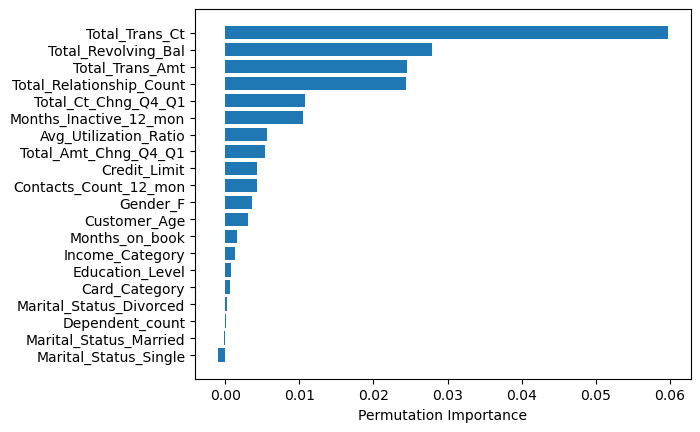

In [42]:
feature_names = df.drop('Attrition_Flag', axis=1).columns
feature_importance = perm_importance.importances_mean

sorted_idx = feature_importance.argsort()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [43]:
# Get the top 15 feature indices from permutation importance
top_15_indices = sorted_idx[-15:]

# Select the top 15 features from the training and test sets
X_train_top_15 = X_train.iloc[:, top_15_indices]
X_test_top_15 = X_test.iloc[:, top_15_indices]

In [44]:
# Train the logistic regression model with the top 15 features
log_reg_top_15 = LogisticRegression(max_iter=1000, random_state=seed_value)
log_reg_top_15.fit(X_train_top_15, y_train)

# Predict on the test set using the top 15 features
y_test_pred_top_15 = log_reg_top_15.predict(X_test_top_15)

# Calculate accuracy on the test set
accuracy_top_15 = accuracy_score(y_test, y_test_pred_top_15)

In [45]:
# Get the coefficients from the logistic regression model
coefficients_top_15 = log_reg_top_15.coef_[0]

# Map the top 15 feature indices to names
top_15_feature_names = feature_names[top_15_indices]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': top_15_feature_names,
    'Coefficient': coefficients_top_15
})

# Print the accuracy and the DataFrame with feature coefficients
print(f"Accuracy on the test set with top 15 features: {accuracy_top_15}")
feature_coefficients_df.sort_values(by='Coefficient', ascending=False)

Accuracy on the test set with top 15 features: 0.893845285149633


Feature  Coefficient
12           Total_Trans_Amt     1.504141
4                   Gender_F     0.892942
9     Months_Inactive_12_mon     0.556413
5      Contacts_Count_12_mon     0.523220
1            Income_Category     0.129295
0            Education_Level    -0.012520
3               Customer_Age    -0.040106
7       Total_Amt_Chng_Q4_Q1    -0.099336
2             Months_on_book    -0.140693
6               Credit_Limit    -0.151612
8      Avg_Utilization_Ratio    -0.167908
10       Total_Ct_Chng_Q4_Q1    -0.614377
13       Total_Revolving_Bal    -0.666713
11  Total_Relationship_Count    -0.703547
14            Total_Trans_Ct    -2.672764

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

In [47]:
selector = SelectKBest(score_func=f_classif, k='all')

X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

In [48]:
feature_names = df.drop('Attrition_Flag', axis=1).columns
selected_mask = selector.get_support()
selected_feature_names = feature_names[selected_mask]
selected_scores = selector.scores_[selected_mask]
selected_pvalues = selector.pvalues_

In [49]:
# Create a DataFrame from the selected features and their scores
features_scores_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': selected_scores, 'P-value': selected_pvalues})

# Sort the DataFrame by the scores in descending order
sorted_features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

In [50]:
sorted_features_scores_df

Feature        Score        P-value
13            Total_Trans_Ct  1343.441805  1.819033e-269
14       Total_Ct_Chng_Q4_Q1   750.710050  3.525172e-157
10       Total_Revolving_Bal   503.647167  8.205725e-108
8      Contacts_Count_12_mon   320.796044   3.381888e-70
15     Avg_Utilization_Ratio   277.469179   3.855919e-61
12           Total_Trans_Amt   253.983853   3.309735e-56
7     Months_Inactive_12_mon   167.618006   6.586878e-38
6   Total_Relationship_Count   144.295469   6.388267e-33
11      Total_Amt_Chng_Q4_Q1   114.249419   1.827468e-26
9               Credit_Limit    15.795814   7.125961e-05
16                  Gender_F     8.152600   4.312451e-03
1            Dependent_count     3.587036   5.827275e-02
3            Income_Category     1.445116   2.293535e-01
18    Marital_Status_Married     0.621440   4.305392e-01
0               Customer_Age     0.534705   4.646595e-01
19     Marital_Status_Single     0.233372   6.290494e-01
4              Card_Category     0.233193   6.291812e-01
2            Education_Level     0.118545   7.306285e-01
5             Months_on_book     0.061414   8.042822e-01
17   Marital_Status_Divorced     0.001190   9.724845e-01

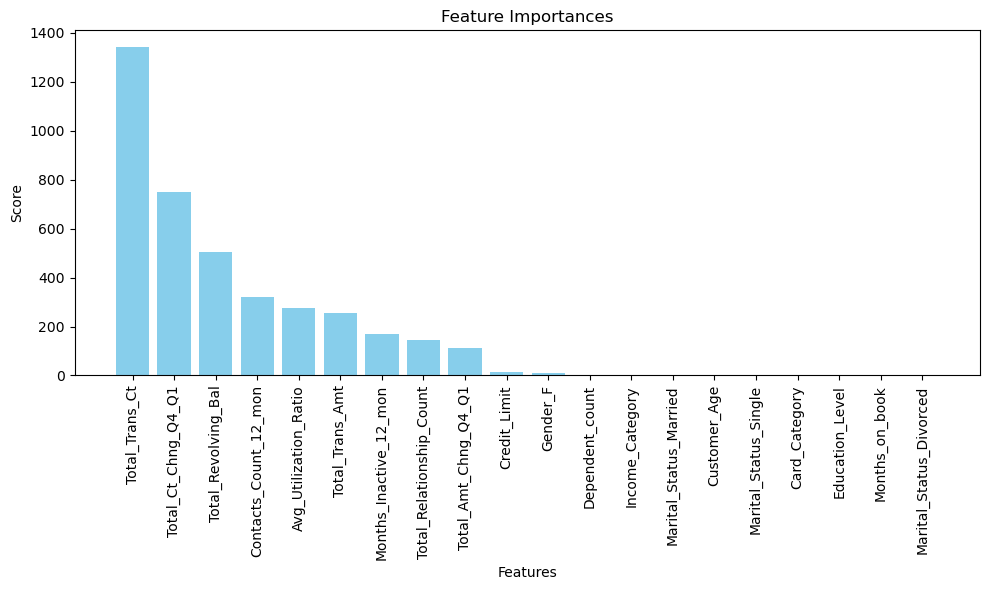

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_features_scores_df['Feature'], sorted_features_scores_df['Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

In [52]:
# We will select the top 15 features according to the scores from SelectKBest
top_15_features = sorted_features_scores_df.head(15)['Feature'].values

# Filter the training and test sets to include only the top 15 features
X_train_top15 = X_train[top_15_features]
X_test_top15 = X_test[top_15_features]

# Fit the logistic regression model on the selected top 15 features
log_reg_top15 = LogisticRegression(max_iter=1000, random_state=seed_value)
log_reg_top15.fit(X_train_top15, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
# Predict on the test set using the top 15 features
y_test_pred_top15 = log_reg_top15.predict(X_test_top15)

# Calculate accuracy on the test set
accuracy_top15 = accuracy_score(y_test, y_test_pred_top15)

# Get the coefficients from the logistic regression model
coefficients_top15 = log_reg_top15.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': top_15_features,
    'Coefficient': coefficients_top15
})

In [54]:
accuracy_top15

0.8961038961038961

Based on the results, the top 15 feautures selected by SelectKBest shows a higher accuracy score compared to Permutation Importance. Thus, the features selected by SelectKBest will be used for modelling.

In [55]:
# Display features in the descending order for Coefficient
feature_coefficients_df.sort_values(by='Coefficient', ascending=False)

Feature  Coefficient
5            Total_Trans_Amt     1.557987
10                  Gender_F     0.868444
3      Contacts_Count_12_mon     0.538349
6     Months_Inactive_12_mon     0.537854
11           Dependent_count     0.141809
12           Income_Category     0.127336
8       Total_Amt_Chng_Q4_Q1    -0.084712
14              Customer_Age    -0.113245
4      Avg_Utilization_Ratio    -0.166662
9               Credit_Limit    -0.175733
13    Marital_Status_Married    -0.611073
1        Total_Ct_Chng_Q4_Q1    -0.614205
2        Total_Revolving_Bal    -0.653095
7   Total_Relationship_Count    -0.690027
0             Total_Trans_Ct    -2.782543

In [56]:
# Combine both importance and scores into a dataframe for comparison
feature_ranking = pd.DataFrame({
    'Feature': feature_names,
    'PermutationImportance': feature_importance,
    'SelectKBestScore': selector.scores_
})

# Rank the features based on permutation importance and SelectKBest scores
feature_ranking['PermutationRank'] = feature_ranking['PermutationImportance'].rank(ascending=False)
feature_ranking['SelectKBestRank'] = feature_ranking['SelectKBestScore'].rank(ascending=False)

# Sort the dataframe based on PermutationImportance rank
feature_ranking = feature_ranking.sort_values('PermutationRank')

# Display the feature rankings
feature_ranking.reset_index(drop=True, inplace=True)
feature_ranking[['Feature', 'PermutationRank', 'SelectKBestRank']] 

Feature  PermutationRank  SelectKBestRank
0             Total_Trans_Ct              1.0              1.0
1        Total_Revolving_Bal              2.0              3.0
2            Total_Trans_Amt              3.0              6.0
3   Total_Relationship_Count              4.0              8.0
4        Total_Ct_Chng_Q4_Q1              5.0              2.0
5     Months_Inactive_12_mon              6.0              7.0
6      Avg_Utilization_Ratio              7.0              5.0
7       Total_Amt_Chng_Q4_Q1              8.0              9.0
8               Credit_Limit              9.0             10.0
9      Contacts_Count_12_mon             10.0              4.0
10                  Gender_F             11.0             11.0
11              Customer_Age             12.0             15.0
12            Months_on_book             13.0             19.0
13           Income_Category             14.0             13.0
14           Education_Level             15.0             18.0
15             Card_Category             16.0             17.0
16   Marital_Status_Divorced             17.0             20.0
17           Dependent_count             18.0             12.0
18    Marital_Status_Married             19.0             14.0
19     Marital_Status_Single             20.0             16.0

- Total_Trans_Ct (Total Transaction Count) is the most critical feature in predicting attrition according to both methods, which indicates that the number of transactions a customer makes is a strong predictor of whether they will leave the bank.

- The feature Marital_Status_Married ranks significantly higher in permutation importance (2nd) compared to SelectKBest (7th), suggesting that marital status may have an interaction effect with other features that is captured in the model-based permutation importance method but not in the univariate SelectKBest scores.

- Total_Relationship_Count and Total_Revolving_Bal are also ranked highly by both methods, indicating that the number of products a customer has with the bank and their revolving balance are key indicators of customer retention.

- Total_Ct_Chng_Q4_Q1 (Change in Transaction Count Q4 over Q1) is ranked 7th by permutation importance and 2nd by SelectKBest. This discrepancy might imply that the change in transaction count has a strong univariate effect but may be less critical when considering the impact alongside other features.

- Some features like Months_Inactive_12_mon (Months Inactive in the Last 12 Months) have significantly different rankings between the two methods, which might be due to SelectKBest considering each feature individually, while permutation importance assesses features' importance in the context of the model.

- Demographic features like Marital_Status_Divorced, Gender_F, and Income_Category have a lower ranking in both methods, indicating they might be less predictive of attrition compared to transactional and relationship features.

- The lowest ranked features, such as Dependent_count, Card_Category, and Months_on_book, suggest that these may have the least predictive power for attrition in this context.

However, Customer age is removed as it is demed to be not statistically important in wald test.

In [57]:
# Display top 15 features
top_15_features

array(['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
       'Total_Trans_Amt', 'Months_Inactive_12_mon',
       'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit',
       'Gender_F', 'Dependent_count', 'Income_Category',
       'Marital_Status_Married', 'Customer_Age'], dtype=object)

In [58]:
# Retain the top 14 features as Customer_Age is not statistically significant
top_14_features = np.delete(top_15_features, 14)
top_14_features

array(['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
       'Total_Trans_Amt', 'Months_Inactive_12_mon',
       'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit',
       'Gender_F', 'Dependent_count', 'Income_Category',
       'Marital_Status_Married'], dtype=object)

In [59]:
# Use top 15 features from SelectKBest

X_train = X_train[top_14_features]
X_test = X_test[top_14_features]

In [60]:
X_train.columns

Index(['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt',
       'Months_Inactive_12_mon', 'Total_Relationship_Count',
       'Total_Amt_Chng_Q4_Q1', 'Credit_Limit', 'Gender_F', 'Dependent_count',
       'Income_Category', 'Marital_Status_Married'],
      dtype='object')

In [61]:
X_train.head()

Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
7618       -0.735796            -0.493364            -1.409461   
3991        0.639172            -0.588729             1.654419   
9788        0.239988            -0.359853            -1.409461   
5900        0.373049            -0.555351             0.228847   
3604       -0.292258             0.798832            -0.103705   

      Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
7618               0.508024              -1.080413        -0.446157   
3991               0.508024               1.496335         0.205175   
9788               2.357330              -1.080413         1.067489   
5900              -1.341282               1.065681         0.103556   
3604               0.508024               0.853942        -0.374540   

      Months_Inactive_12_mon  Total_Relationship_Count  Total_Amt_Chng_Q4_Q1  \
7618                0.686473                 -0.552071              0.859894   
3991               -1.354930                  1.386657              0.619438   
9788                0.686473                  1.386657              0.465955   
5900               -0.334229                  0.740414             -0.480522   
3604               -1.354930                  0.740414              0.660367   

      Credit_Limit  Gender_F  Dependent_count  Income_Category  \
7618     -0.888710         1        -0.259747                1   
3991     -0.501334         0         0.512515                5   
9788      1.200967         0        -1.032008                1   
5900     -0.741668         1        -0.259747                1   
3604     -0.791002         1         0.512515                2   

      Marital_Status_Married  
7618                       1  
3991                       0  
9788                       0  
5900                       0  
3604                       1

___
<hr style="height: 3px; border-width:0;">

# 9.0 Balancing Data via SMOTE
The imbalance dataset issue is addressed by applying SMOTE methods. The effectiveness of whether SMOTE or similar approaches should be applied before or after feature selection can be found via this [research paper](https://riubu.ubu.es/bitstream/handle/10259/6192/Ramos-esa_2022.pdf;jsessionid=D2AB9F0711B134ED01F74009B880EE25?sequence=1).

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
# Apply SMOTE
sm = SMOTE(random_state=seed_value)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train, random_state=seed_value)

In [65]:
# Check number of instances for labels in training set
y_train.value_counts()

1    5940
0    5940
Name: Attrition_Flag, dtype: int64

In [66]:
# Check number of instances for labels in testing set
y_test.value_counts()

0    1508
1     263
Name: Attrition_Flag, dtype: int64

___
<hr style="height: 3px; border-width:0;">

# 10.0 Model Building, Hyperparameter Tuning and Evaluation

In this project, we will utilized classification models to predict if the customer will churn or not. Each model has different number of hyperparameters that need to be tuned. The models include Logistic Regression, Support Vector Classifier, Random Forest Classifier and Gradient Boosting Classifier. Different scoring metrics will be used to evaluate the model from different perspectives, such as accuracy, precision, recall, f1 score and roc_auc.


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import lightgbm as lgb
from sklearn.model_selection import cross_validate
from sklearn.base import clone
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import time

In [68]:
def display_train_score(cv_results, name):
    """
    Display training set scores from cross-validation results and return them in a dictionary.

    Parameters:
    - cv_results: The results dictionary obtained from a cross-validator.
    - name: A string representing the name of the model.

    Returns:
    - A dictionary containing mean scores for accuracy, precision, recall, f1 score, and ROC AUC.
    """

    # Calculate mean scores from cross-validation results
    results = {
        'mean_accuracy': cv_results['test_accuracy'].mean(),
        'mean_precision': cv_results['test_precision'].mean(),
        'mean_recall': cv_results['test_recall'].mean(),
        'mean_f1': cv_results['test_f1_score'].mean(),
        'mean_roc_auc': cv_results['test_roc_auc'].mean()
    }

    # Print the results for each metric
    print(f"Results for training set of {name}:")
    for metric, value in results.items():
        print(f"{metric.replace('mean_', '').capitalize()}: {value:.6f}")
    print("\n==================================================")
    
    return results

In [69]:
def display_test_score(y_test, y_pred, y_prob, name):
    """
    Display test set scores and plot confusion matrix and ROC curve for the test set predictions.

    Parameters:
    - y_test: Array containing true labels for the test set.
    - y_pred: Array containing predicted labels for the test set.
    - y_prob: Array containing predicted probabilities for the positive class in the test set.
    - name: A string representing the name of the model.

    Returns:
    - A dictionary containing scores for accuracy, precision, recall, f1 score, and ROC AUC.
    """

    # Calculate scores for the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_roc_auc = roc_auc_score(y_test, y_prob, average='weighted')
    
    # Print the scores
    print(f"Test Results for testing set of {name}:")
    print(f"Accuracy: {test_accuracy:.6f}")
    print(f"Precision: {test_precision:.6f}")
    print(f"Recall: {test_recall:.6f}")
    print(f"F1 Score: {test_f1:.6f}")
    print(f"ROC AUC: {test_roc_auc:.6f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc_value = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return {
        'mean_accuracy': test_accuracy,
        'mean_precision': test_precision,
        'mean_recall': test_recall,
        'mean_f1': test_f1,
        'mean_roc_auc': test_roc_auc
    }

In [70]:
def append_to_dataframe(model, params, time_taken, train_result, test_result, dataframe):
    """
    Append model evaluation results and information to a DataFrame for comparison.

    Parameters:
    - model: The model object used for training and prediction.
    - params: Parameters used for the model.
    - time_taken: Time taken for training and testing the model.
    - train_result: Dictionary containing training set evaluation metrics.
    - test_result: Dictionary containing test set evaluation metrics.
    - dataframe: Pandas DataFrame to which the new record will be appended.

    Returns:
    - Updated DataFrame with the new record appended.
    """

    # Create a record of the model information and results
    model_info = {
        'Model': model.__class__.__name__,
        'Parameters': params,
        'Elapsed Time': time_taken,
        'Train Accuracy': train_result['mean_accuracy'],
        'Train Precision': train_result['mean_precision'],
        'Train Recall': train_result['mean_recall'],
        'Train F1': train_result['mean_f1'],
        'Train ROC AUC': train_result['mean_roc_auc'],
        'Test Accuracy': test_result['mean_accuracy'],
        'Test Precision': test_result['mean_precision'],
        'Test Recall': test_result['mean_recall'],
        'Test F1': test_result['mean_f1'],
        'Test ROC AUC': test_result['mean_roc_auc']
    }
    
    # Convert the record into a DataFrame and append it to the existing DataFrame
    new_record_df = pd.DataFrame([model_info])
    
    return pd.concat([dataframe, new_record_df], ignore_index=True)

## 10.1 Baseline Performance
We start by create a base Logistic Regression, Support Vector Classifier, Random Forest Classifier and Gradient Boosting Classifier model. These models will not perform any hyperparameter tuning and its results from different metrics will be used as a baseline performance for comparison later.

In [71]:
def baseline_model(models, train_scoring, results_df, n_jobs_value):
    """
    Train and evaluate given models multiple times, appending the evaluation metrics to a DataFrame.

    Parameters:
    - models (dict): A dictionary of model name and model object pairs to be evaluated.
    - train_scoring (dict or list): Scoring metrics to be used for cross-validation.
    - results_df (DataFrame): A DataFrame to store the results of the model evaluations.
    - n_jobs_value (int): The number of jobs to run in parallel for cross_validate. -1 means using all processors.

    Returns:
    - DataFrame: Updated DataFrame with the results from each model evaluation.

    This function performs cross-validation on the training set for each model, evaluates performance on the test set,
    and then records the evaluation metrics along with training time in a DataFrame. The process is repeated 5 times 
    for each model to ensure reliability of the performance estimates.
    """

    # Repeat the evaluation process 5 times
    for i in range(5):
        for name, model in models.items(): # Iterate over each model
            start_time = time.time() # Start timing the evaluation

            # Perform cross-validation and get the training set scores
            cv_results = cross_validate(model, X_train, y_train, cv=3, scoring=train_scoring, n_jobs=n_jobs_value)

            # Clone the model to avoid fitting the same model instance
            cloned_model = clone(model)
            cloned_model.fit(X_train, y_train) # Fit the model to the training set

            # Get model parameters after fitting
            params = cloned_model.get_params()

            # Display and get training set scores
            train_result = display_train_score(cv_results, name)
            
            time_taken = time.time() - start_time # Calculate time taken for training and cross-validation
            print(f"Time taken: {time_taken:.5f} seconds")
            print("==================================================\n")

            # Make predictions on the test set
            y_pred = cloned_model.predict(X_test)
            # For models that can estimate probabilities, get the probabilities for the positive class
            y_prob = cloned_model.predict_proba(X_test)[:, 1]

            # Display and get test set scores
            test_result = display_test_score(y_test, y_pred, y_prob, name)

            # Append the results to the results DataFrame
            results_df = append_to_dataframe(cloned_model, params, time_taken, train_result, test_result, results_df)
            
            time.sleep(20) # Pause for a short period to avoid overwhelming the system
    
    return results_df

Results for training set of Logistic Regression:
Accuracy: 0.892003
Precision: 0.892069
Recall: 0.892003
F1: 0.891998
Roc_auc: 0.892003

Time taken: 3.37793 seconds

Test Results for testing set of Logistic Regression:
Accuracy: 0.854884
Precision: 0.885162
Recall: 0.854884
F1 Score: 0.865421
ROC AUC: 0.896335


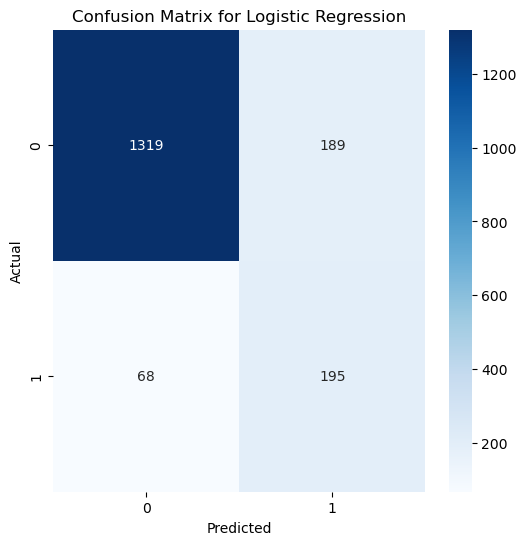

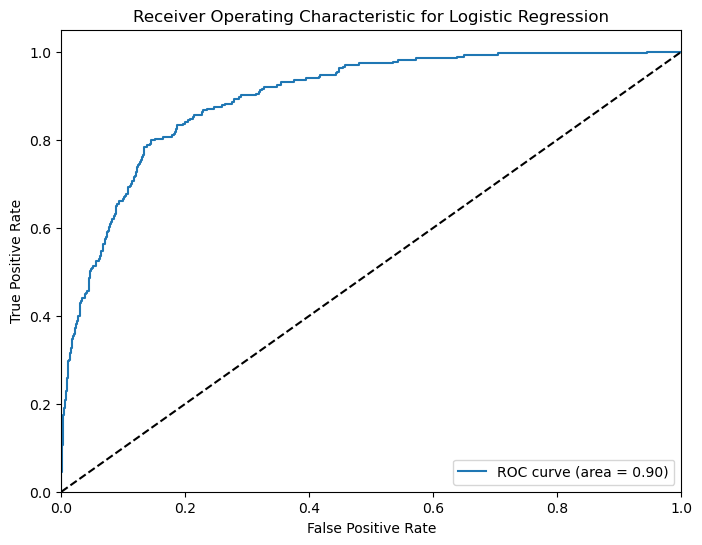

Results for training set of SVC:
Accuracy: 0.945455
Precision: 0.945646
Recall: 0.945455
F1: 0.945448
Roc_auc: 0.945455

Time taken: 18.01998 seconds

Test Results for testing set of SVC:
Accuracy: 0.918125
Precision: 0.926184
Recall: 0.918125
F1 Score: 0.921040
ROC AUC: 0.950411


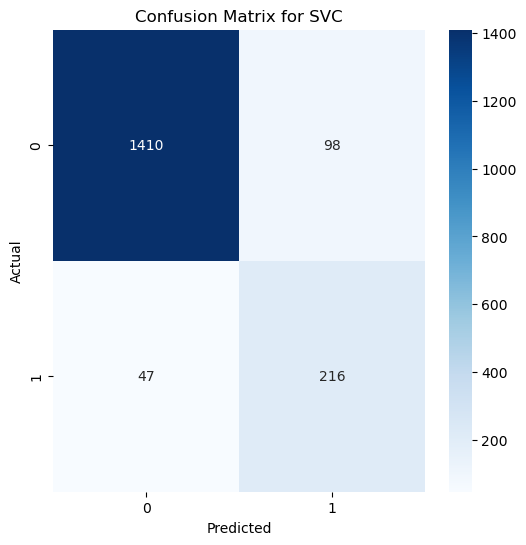

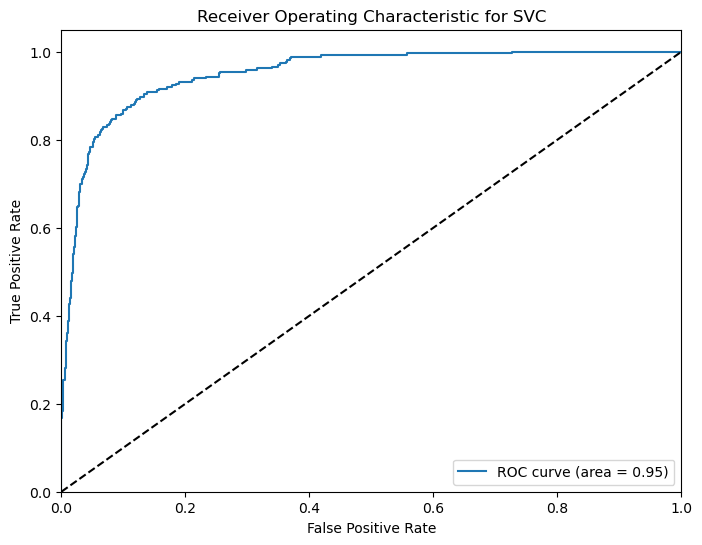

Results for training set of Random Forest Classifier:
Accuracy: 0.971970
Precision: 0.972148
Recall: 0.971970
F1: 0.971967
Roc_auc: 0.971970

Time taken: 3.66010 seconds

Test Results for testing set of Random Forest Classifier:
Accuracy: 0.952569
Precision: 0.953048
Recall: 0.952569
F1 Score: 0.952789
ROC AUC: 0.981142


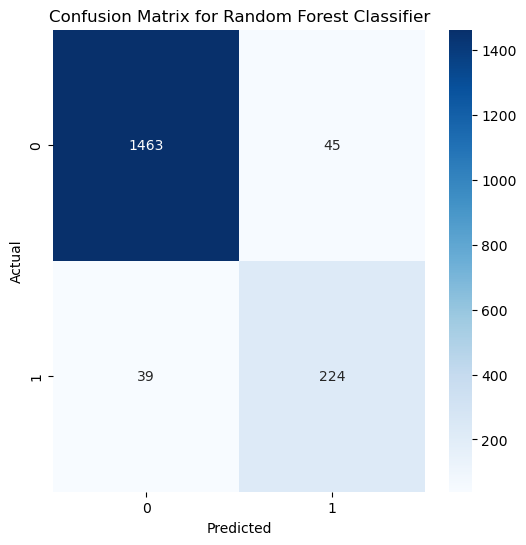

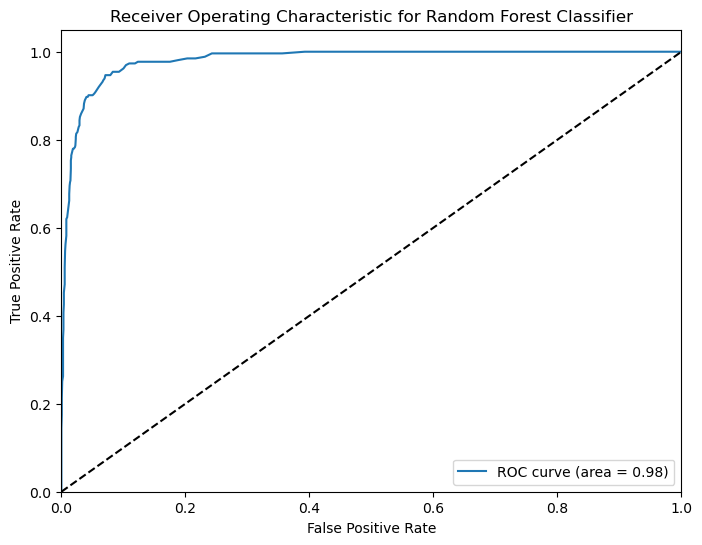

Results for training set of Gradient Boosting Classifier:
Accuracy: 0.965657
Precision: 0.965733
Recall: 0.965657
F1: 0.965655
Roc_auc: 0.965657

Time taken: 5.24594 seconds

Test Results for testing set of Gradient Boosting Classifier:
Accuracy: 0.945793
Precision: 0.948545
Recall: 0.945793
F1 Score: 0.946834
ROC AUC: 0.982045


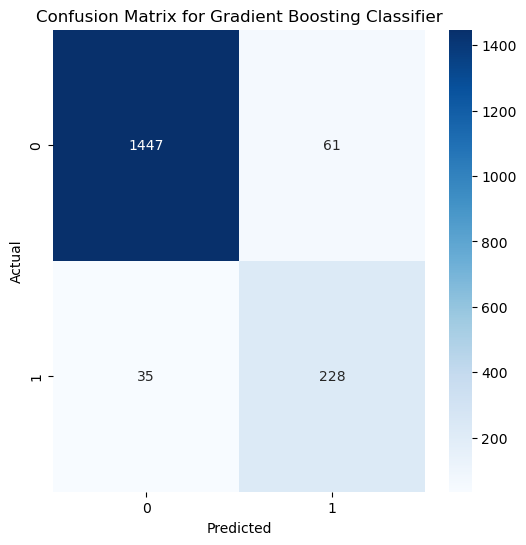

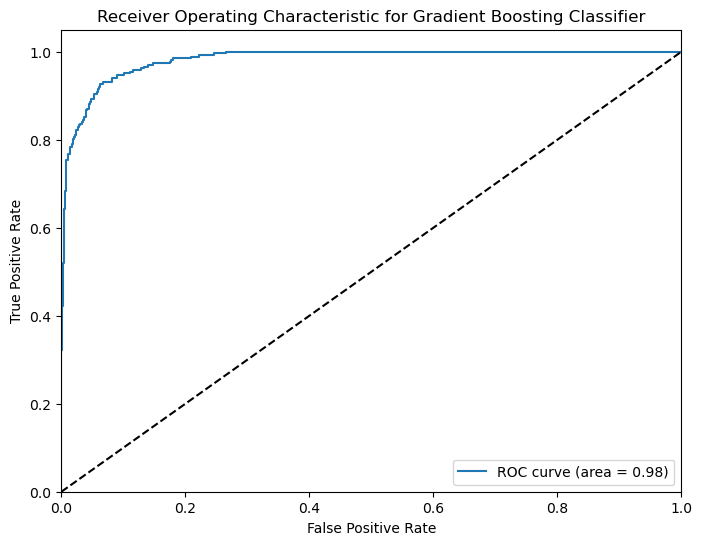

Results for training set of Logistic Regression:
Accuracy: 0.892003
Precision: 0.892069
Recall: 0.892003
F1: 0.891998
Roc_auc: 0.892003

Time taken: 0.06287 seconds

Test Results for testing set of Logistic Regression:
Accuracy: 0.854884
Precision: 0.885162
Recall: 0.854884
F1 Score: 0.865421
ROC AUC: 0.896335


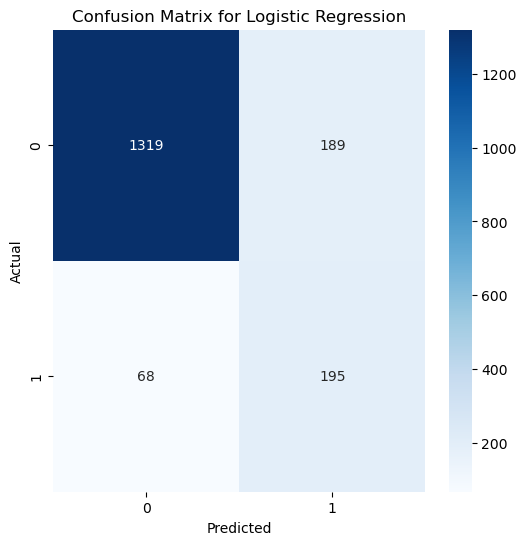

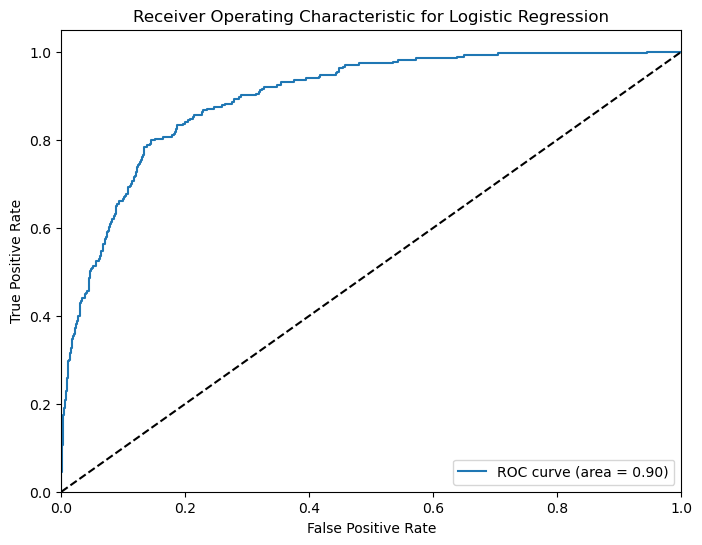

Results for training set of SVC:
Accuracy: 0.945455
Precision: 0.945646
Recall: 0.945455
F1: 0.945448
Roc_auc: 0.945455

Time taken: 17.59412 seconds

Test Results for testing set of SVC:
Accuracy: 0.918125
Precision: 0.926184
Recall: 0.918125
F1 Score: 0.921040
ROC AUC: 0.950411


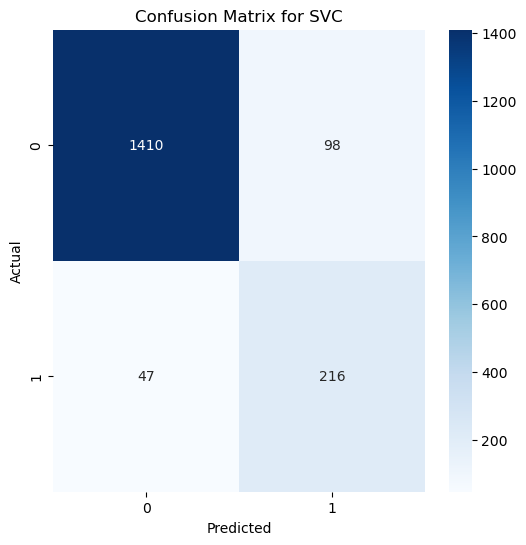

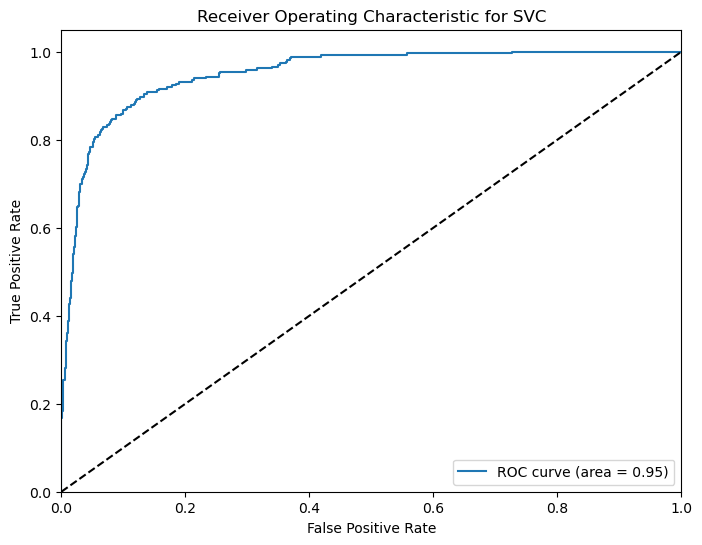

Results for training set of Random Forest Classifier:
Accuracy: 0.971970
Precision: 0.972148
Recall: 0.971970
F1: 0.971967
Roc_auc: 0.971970

Time taken: 2.33876 seconds

Test Results for testing set of Random Forest Classifier:
Accuracy: 0.952569
Precision: 0.953048
Recall: 0.952569
F1 Score: 0.952789
ROC AUC: 0.981142


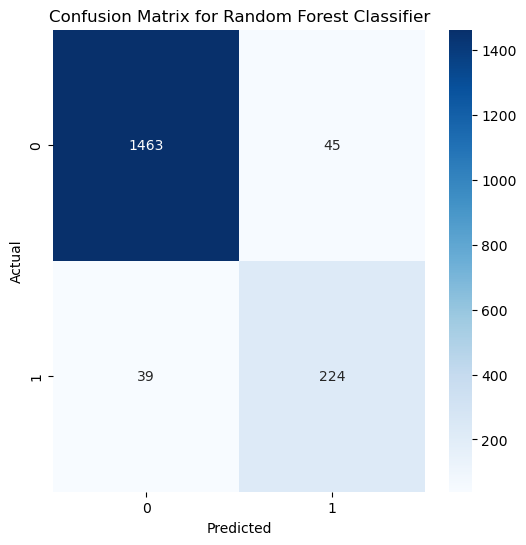

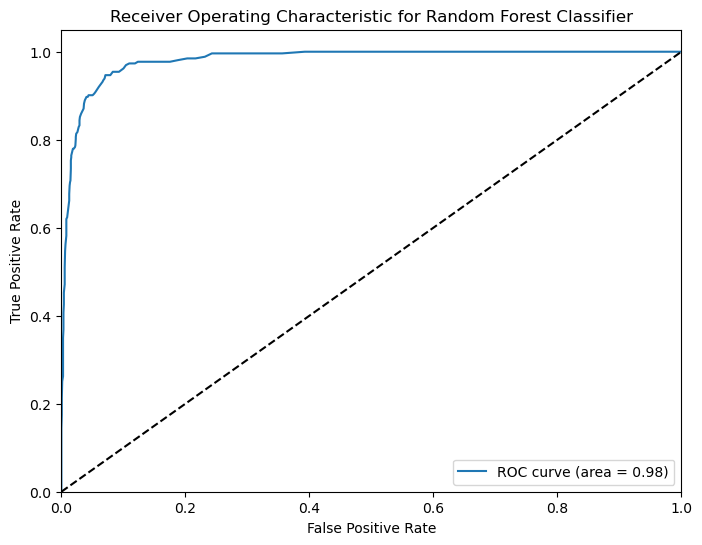

Results for training set of Gradient Boosting Classifier:
Accuracy: 0.965657
Precision: 0.965733
Recall: 0.965657
F1: 0.965655
Roc_auc: 0.965657

Time taken: 3.71209 seconds

Test Results for testing set of Gradient Boosting Classifier:
Accuracy: 0.945793
Precision: 0.948545
Recall: 0.945793
F1 Score: 0.946834
ROC AUC: 0.982045


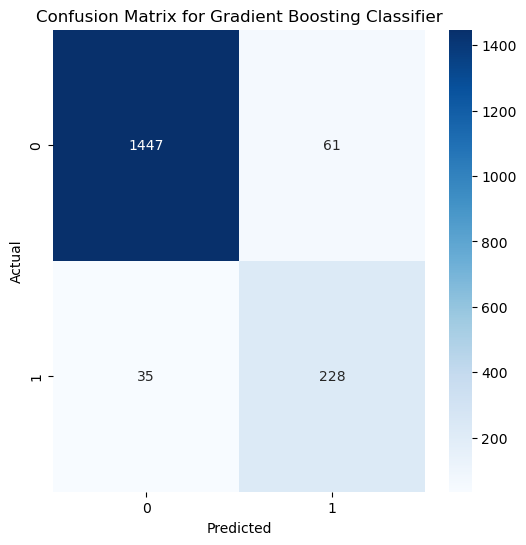

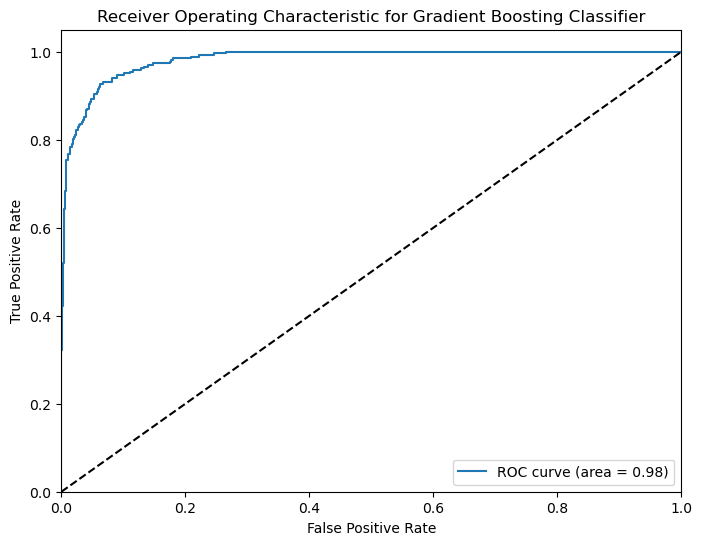

Results for training set of Logistic Regression:
Accuracy: 0.892003
Precision: 0.892069
Recall: 0.892003
F1: 0.891998
Roc_auc: 0.892003

Time taken: 0.08298 seconds

Test Results for testing set of Logistic Regression:
Accuracy: 0.854884
Precision: 0.885162
Recall: 0.854884
F1 Score: 0.865421
ROC AUC: 0.896335


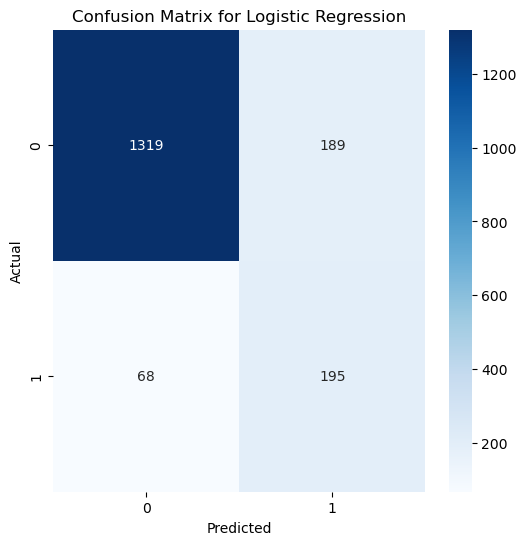

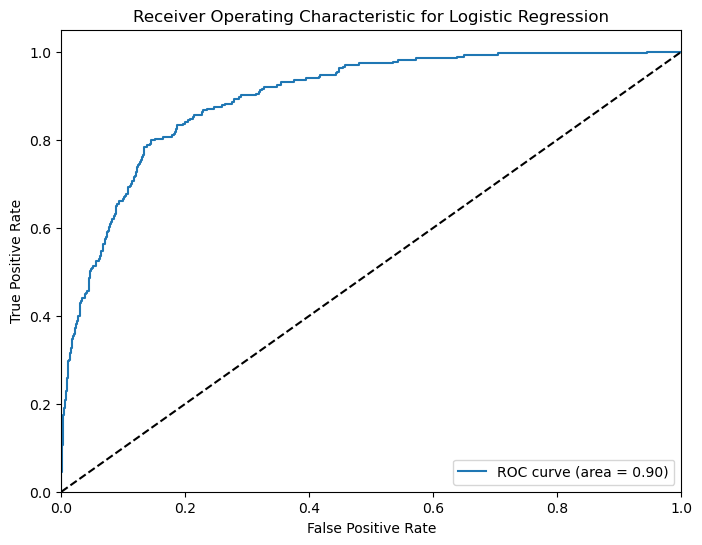

Results for training set of SVC:
Accuracy: 0.945455
Precision: 0.945646
Recall: 0.945455
F1: 0.945448
Roc_auc: 0.945455

Time taken: 18.02615 seconds

Test Results for testing set of SVC:
Accuracy: 0.918125
Precision: 0.926184
Recall: 0.918125
F1 Score: 0.921040
ROC AUC: 0.950411


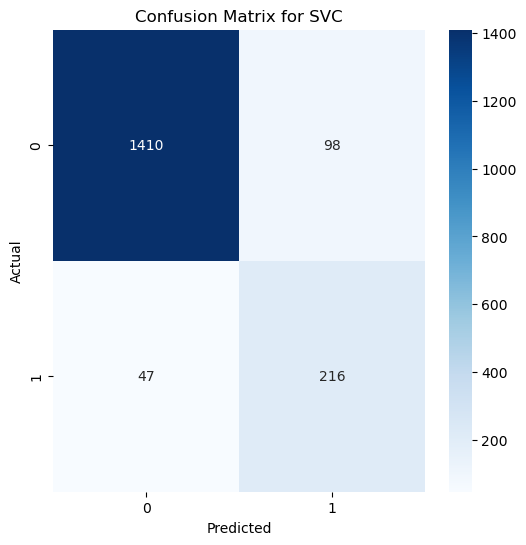

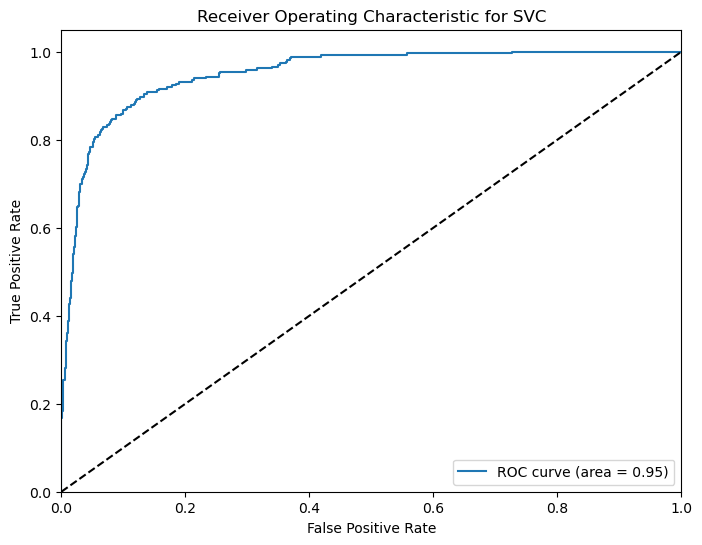

Results for training set of Random Forest Classifier:
Accuracy: 0.971970
Precision: 0.972148
Recall: 0.971970
F1: 0.971967
Roc_auc: 0.971970

Time taken: 2.40183 seconds

Test Results for testing set of Random Forest Classifier:
Accuracy: 0.952569
Precision: 0.953048
Recall: 0.952569
F1 Score: 0.952789
ROC AUC: 0.981142


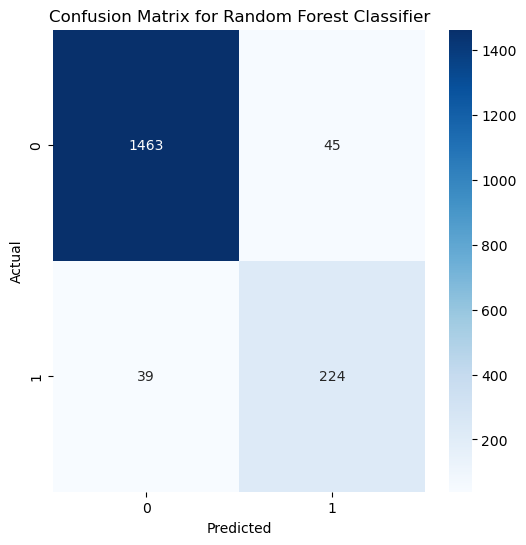

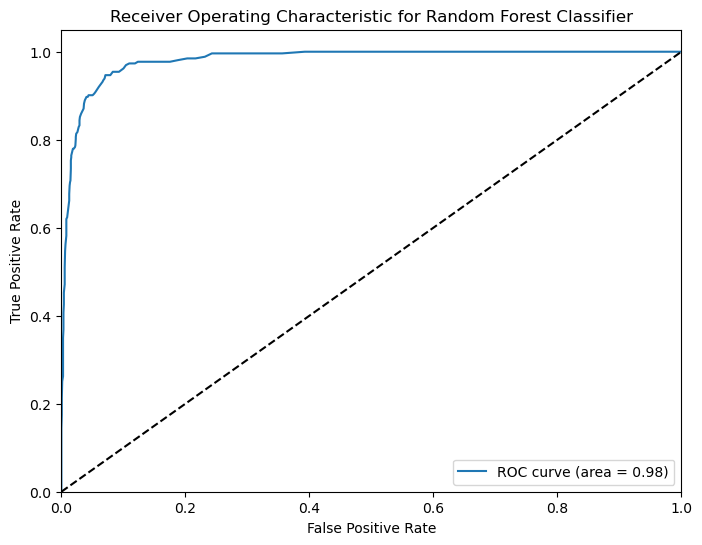

Results for training set of Gradient Boosting Classifier:
Accuracy: 0.965657
Precision: 0.965733
Recall: 0.965657
F1: 0.965655
Roc_auc: 0.965657

Time taken: 3.73450 seconds

Test Results for testing set of Gradient Boosting Classifier:
Accuracy: 0.945793
Precision: 0.948545
Recall: 0.945793
F1 Score: 0.946834
ROC AUC: 0.982045


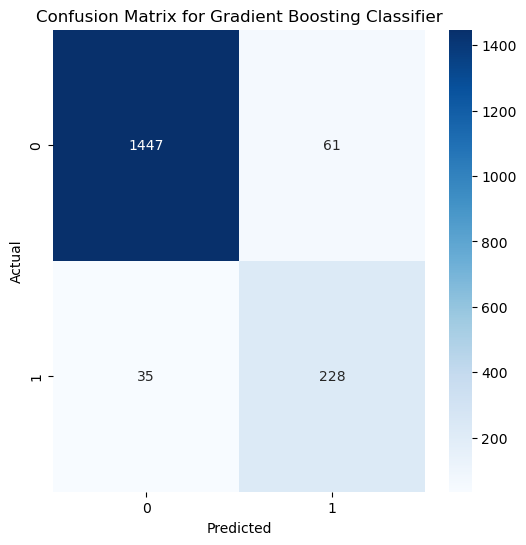

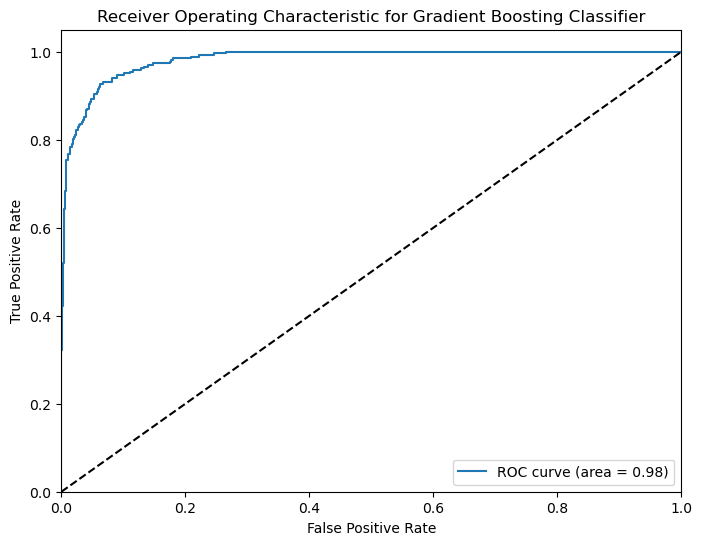

Results for training set of Logistic Regression:
Accuracy: 0.892003
Precision: 0.892069
Recall: 0.892003
F1: 0.891998
Roc_auc: 0.892003

Time taken: 0.07858 seconds

Test Results for testing set of Logistic Regression:
Accuracy: 0.854884
Precision: 0.885162
Recall: 0.854884
F1 Score: 0.865421
ROC AUC: 0.896335


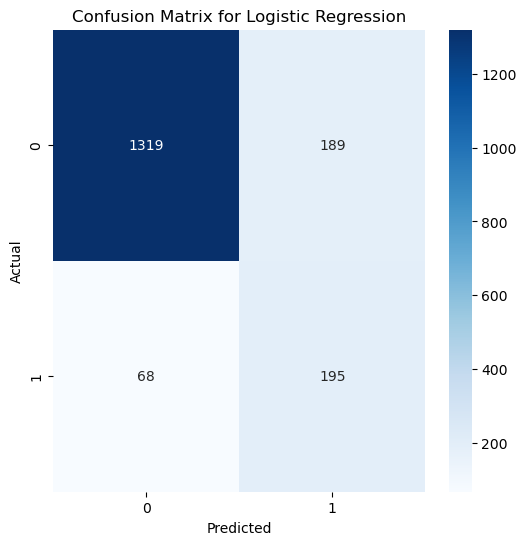

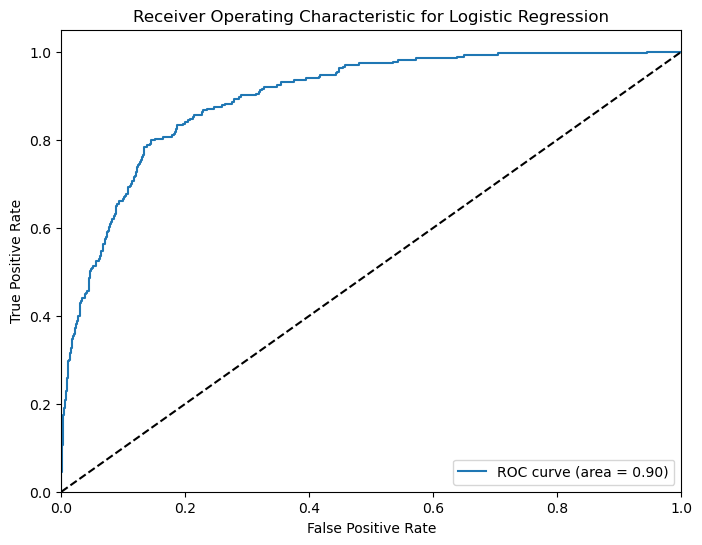

Results for training set of SVC:
Accuracy: 0.945455
Precision: 0.945646
Recall: 0.945455
F1: 0.945448
Roc_auc: 0.945455

Time taken: 16.82594 seconds

Test Results for testing set of SVC:
Accuracy: 0.918125
Precision: 0.926184
Recall: 0.918125
F1 Score: 0.921040
ROC AUC: 0.950411


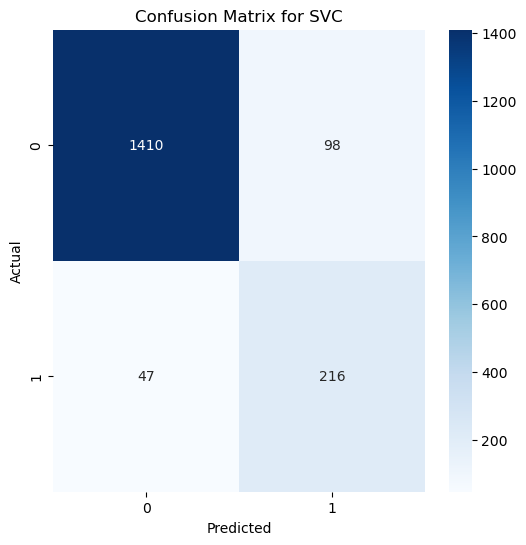

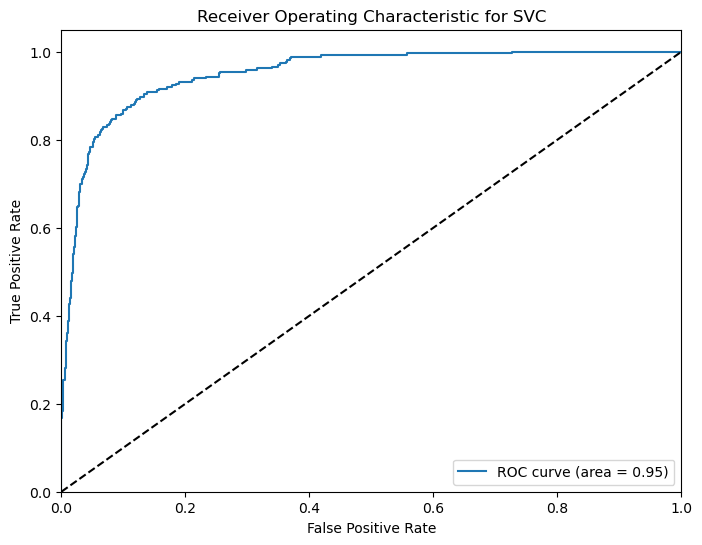

Results for training set of Random Forest Classifier:
Accuracy: 0.971970
Precision: 0.972148
Recall: 0.971970
F1: 0.971967
Roc_auc: 0.971970

Time taken: 2.35481 seconds

Test Results for testing set of Random Forest Classifier:
Accuracy: 0.952569
Precision: 0.953048
Recall: 0.952569
F1 Score: 0.952789
ROC AUC: 0.981142


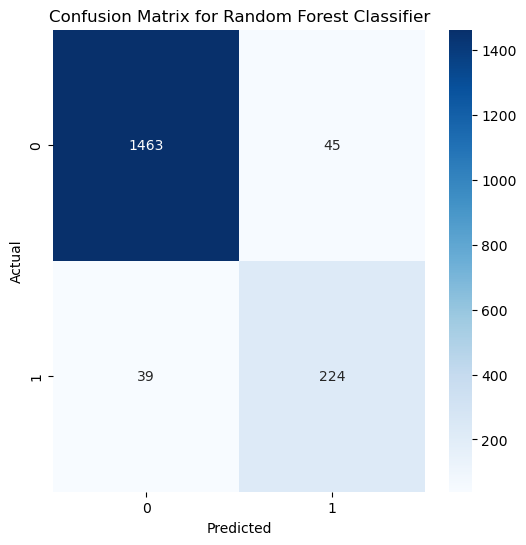

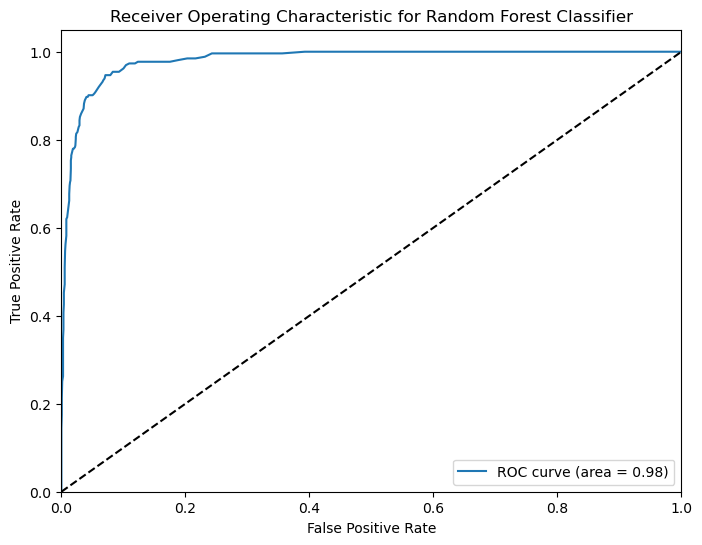

Results for training set of Gradient Boosting Classifier:
Accuracy: 0.965657
Precision: 0.965733
Recall: 0.965657
F1: 0.965655
Roc_auc: 0.965657

Time taken: 3.81558 seconds

Test Results for testing set of Gradient Boosting Classifier:
Accuracy: 0.945793
Precision: 0.948545
Recall: 0.945793
F1 Score: 0.946834
ROC AUC: 0.982045


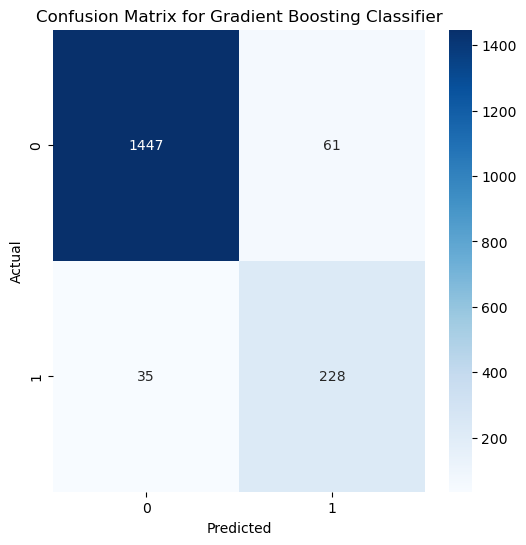

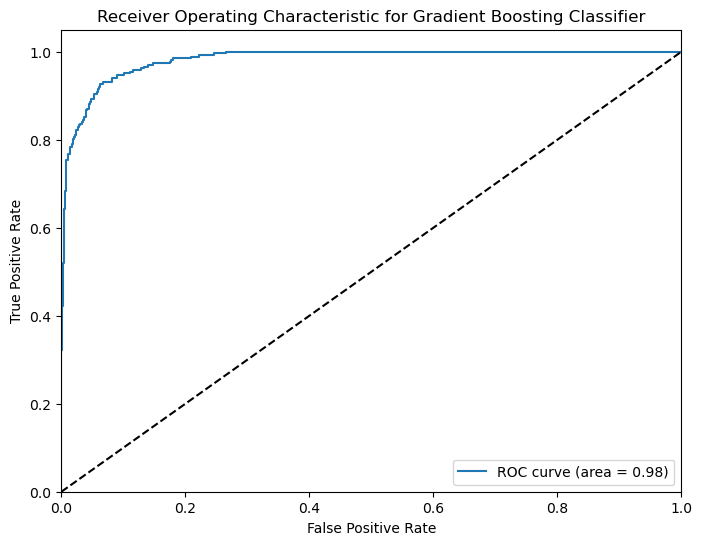

Results for training set of Logistic Regression:
Accuracy: 0.892003
Precision: 0.892069
Recall: 0.892003
F1: 0.891998
Roc_auc: 0.892003

Time taken: 0.07855 seconds

Test Results for testing set of Logistic Regression:
Accuracy: 0.854884
Precision: 0.885162
Recall: 0.854884
F1 Score: 0.865421
ROC AUC: 0.896335


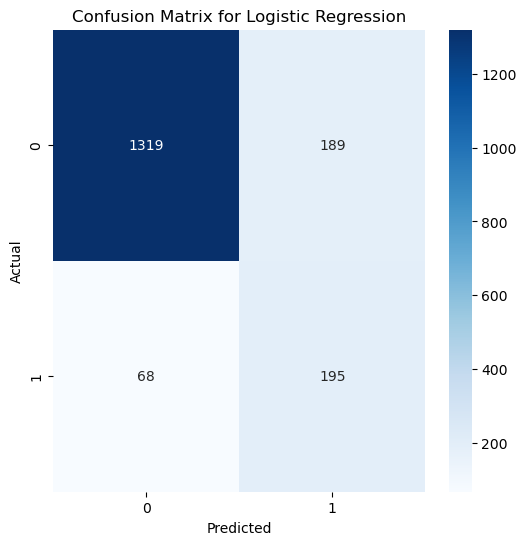

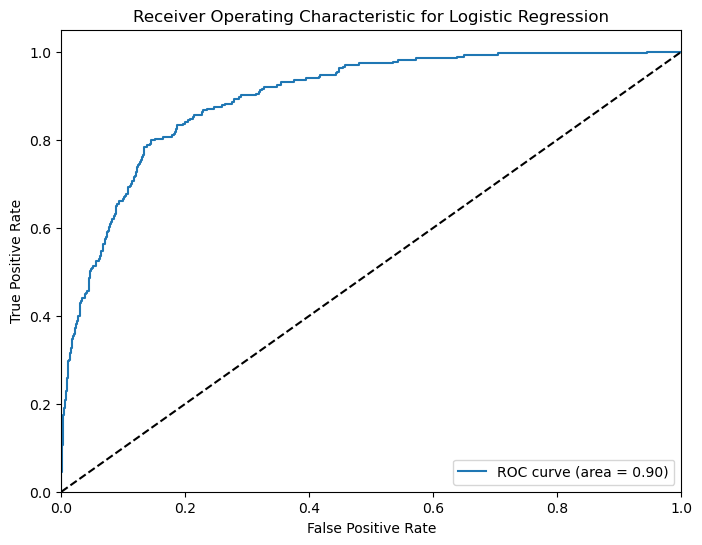

Results for training set of SVC:
Accuracy: 0.945455
Precision: 0.945646
Recall: 0.945455
F1: 0.945448
Roc_auc: 0.945455

Time taken: 16.83688 seconds

Test Results for testing set of SVC:
Accuracy: 0.918125
Precision: 0.926184
Recall: 0.918125
F1 Score: 0.921040
ROC AUC: 0.950411


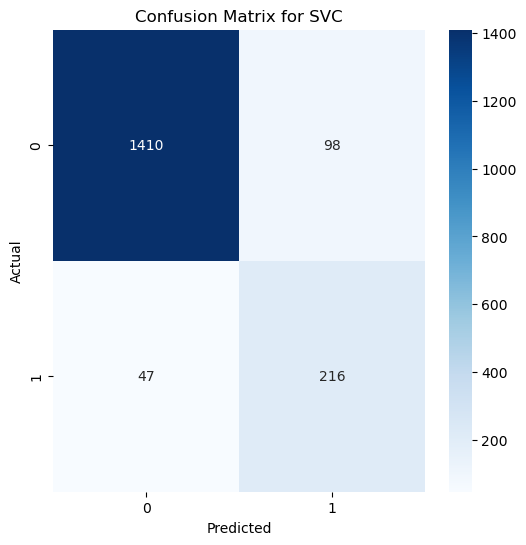

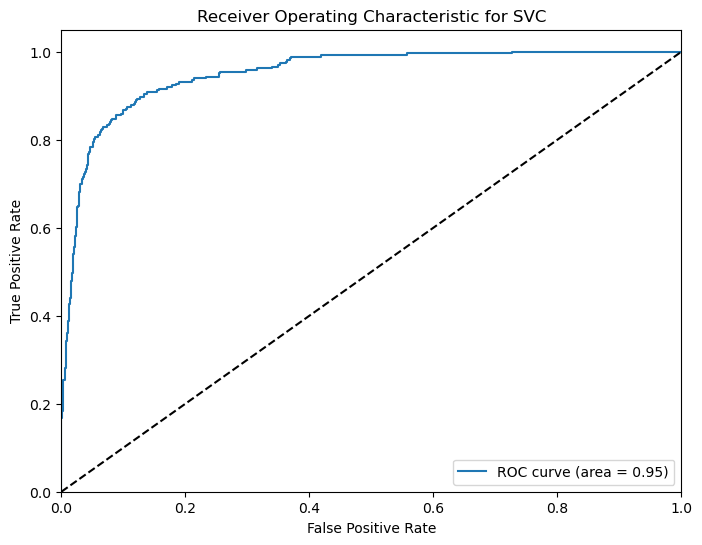

Results for training set of Random Forest Classifier:
Accuracy: 0.971970
Precision: 0.972148
Recall: 0.971970
F1: 0.971967
Roc_auc: 0.971970

Time taken: 2.31465 seconds

Test Results for testing set of Random Forest Classifier:
Accuracy: 0.952569
Precision: 0.953048
Recall: 0.952569
F1 Score: 0.952789
ROC AUC: 0.981142


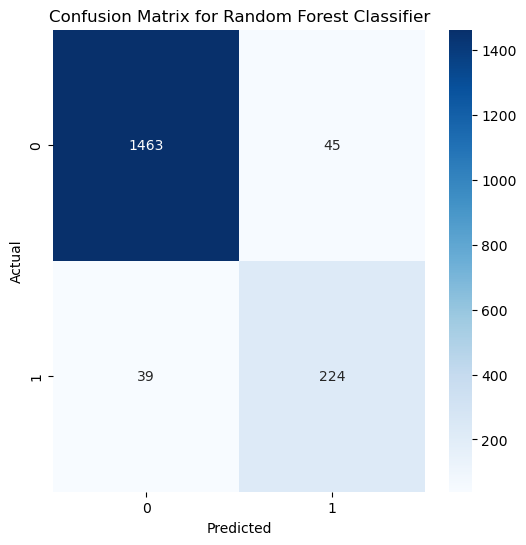

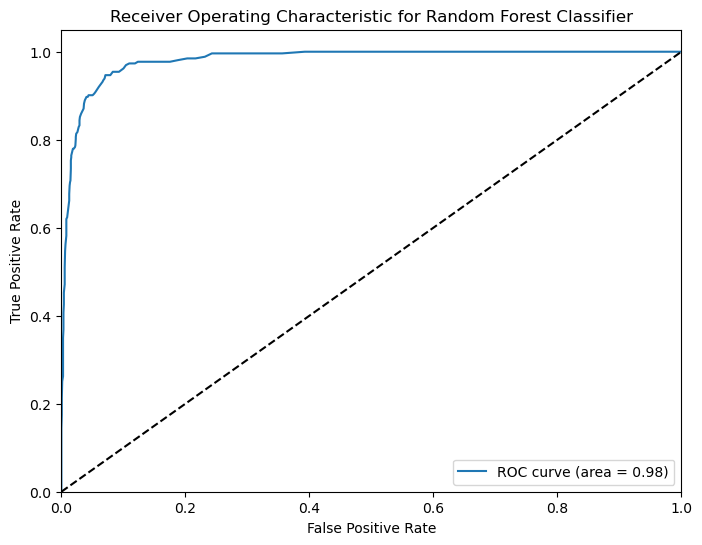

Results for training set of Gradient Boosting Classifier:
Accuracy: 0.965657
Precision: 0.965733
Recall: 0.965657
F1: 0.965655
Roc_auc: 0.965657

Time taken: 3.93481 seconds

Test Results for testing set of Gradient Boosting Classifier:
Accuracy: 0.945793
Precision: 0.948545
Recall: 0.945793
F1 Score: 0.946834
ROC AUC: 0.982045


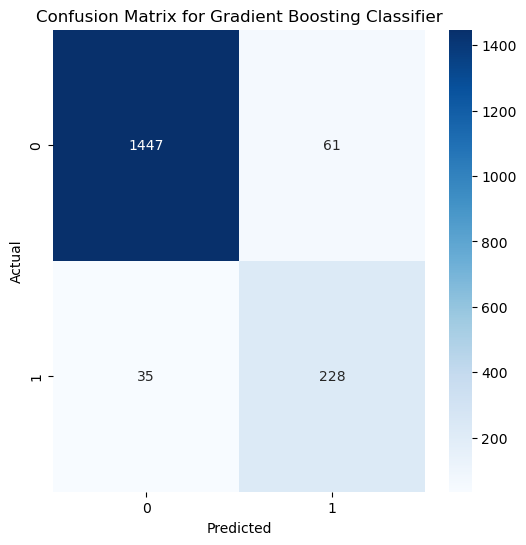

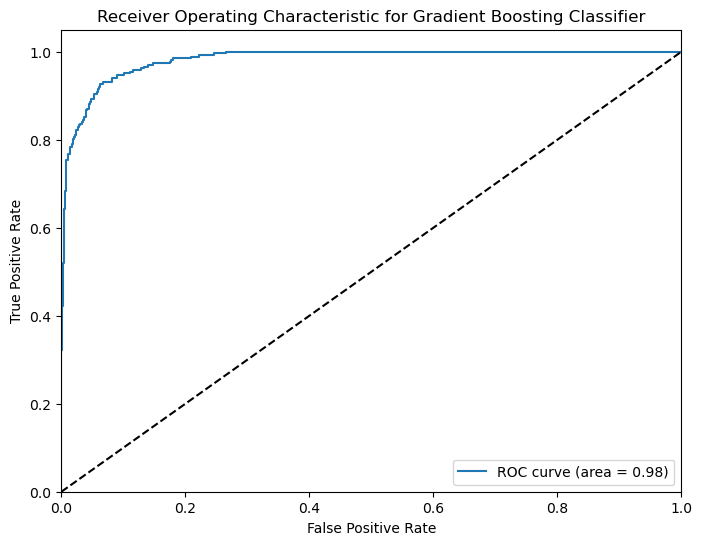

In [82]:
# Define the models to be evaluated with their respective initial configurations.
# Each model is associated with a name as the key in the dictionary.
models = {
    'Logistic Regression': LogisticRegression(random_state=seed_value),
    'SVC': SVC(probability=True, random_state=seed_value),
    'Random Forest Classifier': RandomForestClassifier(random_state=seed_value),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=seed_value),
}

# Specify the scoring metrics for model evaluation during cross-validation.
# These metrics will be used to assess each model's performance on the training data.
train_scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, average='macro')
}

# Define the columns for the results DataFrame. This DataFrame will hold the evaluation metrics
# for both training and testing phases, along with model parameters and elapsed time for training.
columns = [
    'Model', 'Parameters', 'Elapsed Time', 'Train Accuracy', 'Train Precision', 'Train Recall', 
    'Train F1', 'Train ROC AUC', 'Test Accuracy', 'Test Precision', 'Test Recall', 
    'Test F1', 'Test ROC AUC']

# Initialize an empty DataFrame with the specified columns.
# This DataFrame will be populated with the results from evaluating each model.
results_df = pd.DataFrame(columns=columns)

# Execute the baseline_model function to train, evaluate, and collect metrics for each model.
results_df = baseline_model(models, train_scoring, results_df, n_jobs_value)

In [83]:
results_df
results_df.to_csv(f'baseline/baseline_result_{seed_value}.csv')

<hr style="height: 3px; border-width:0;">

## 10.2 Setting Parameter Space and Scoring Metrics
The parameter space is defined for different models. The hyperparameter tuning techniques, which are simulated annealing, grid search, half grid search and genetic algorithm will be executed to find the optimal set of solutions based on the given parameter ranges.

In [72]:
# parameter space for logistic regression
param_space_lr = {
    'penalty': ['elasticnet', None],
    'C': [2**(-5), 2**(-3), 2**(-1), 2**1, 2**3, 2**5, 2**7, 2**9, 2**13],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
    'l1_ratio': np.linspace(0, 1, 6)
}


# parameter space for support vector classifier
param_space_svc = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [2**(-5), 2**(-3), 2**(-1), 1, 2**1, 5, 2**3, 10],
    'degree': [2, 3, 4, 5],  # Only for poly kernel
    'gamma': ['scale', 'auto']  # For rbf, poly, and sigmoid kernels
}


# parameter space for random forest classifier
param_space_rfc = {
    'n_estimators': [80, 100, 150, 200, 250, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 4, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7, 11, 17, 26, 40],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 15, 20],
#     'max_features': ['sqrt', 'log2', None]
}


# parameter space for gradient boosting classifier
param_space_gbc = {
#     'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.00215443, 0.00464159, 0.01, 0.02154435, 0.04641589, 0.1, 0.21544347, 0.46415888, 1.],
    'n_estimators': [80, 100, 150, 200, 250, 500],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
#     'criterion': ['friedman_mse', 'squared_error'],
#     'min_samples_split': [2, 3, 4, 5, 7, 10, 15, 20],
    'max_depth': [3, 4, 5, 7, 10, 15, 20],
#     'max_features': ['sqrt', 'log2', None]
}

In [73]:
# Setting scoring condition

train_scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, average='macro')
}

# Define the number of cross validation and seed value
cv_times=3
seed_value=42

columns = [
    'Model', 'Parameters', 'Elapsed Time', 'Train Accuracy', 'Train Precision', 'Train Recall', 
    'Train F1', 'Train ROC AUC', 'Test Accuracy', 'Test Precision', 'Test Recall', 
    'Test F1', 'Test ROC AUC']

In [74]:
from plot_history import plot_score_vs_iterations

<hr style="height: 3px; border-width:0;">

## 10.3 Hyperparameter Tuning
Each hyperparameter tuning method will be performed on four models. The result will be displayed and saved into its respective csv files. The method will be repeated multiple times to obtain the average results.

___
<hr style="height: 3px; border-width:0;">

### 10.3.1 Simulated Annealing


In [75]:
from simulated_annealing import simulated_annealing, sa_format_history

Simulated Annealing Progress: 100%|██████████| 50/50 [00:06<00:00,  7.33it/s]


Best Parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.03125}
Best Accuracy: 0.8696127946127946
Best Precision: 0.8700172027252625
Best Recall: 0.8696127946127946
Best F1 Score: 0.8695752035058156
Best ROC AUC: 0.8696127946127946
Total time taken: 6.825429677963257 seconds


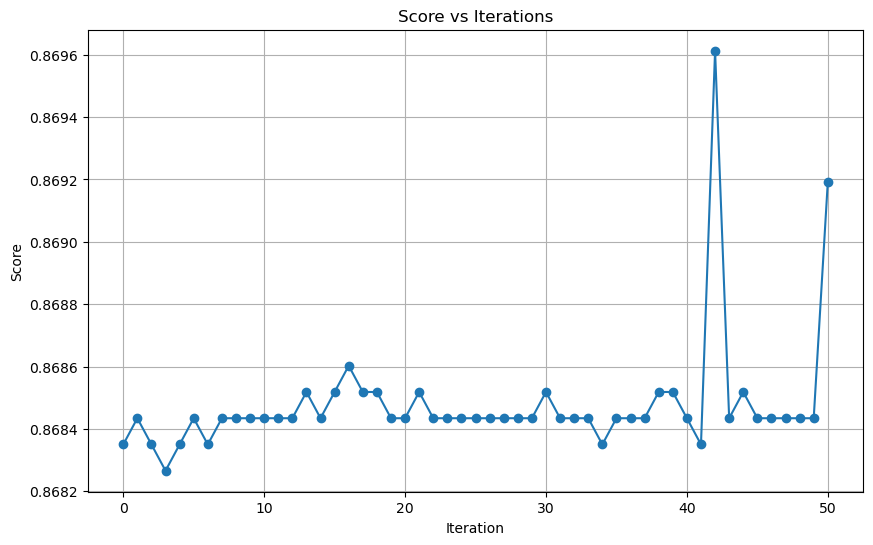

Test Results for testing set of Logistic Regression - Simulated Annealing:
Accuracy: 0.837380
Precision: 0.889379
Recall: 0.837380
F1 Score: 0.853384
ROC AUC: 0.910402


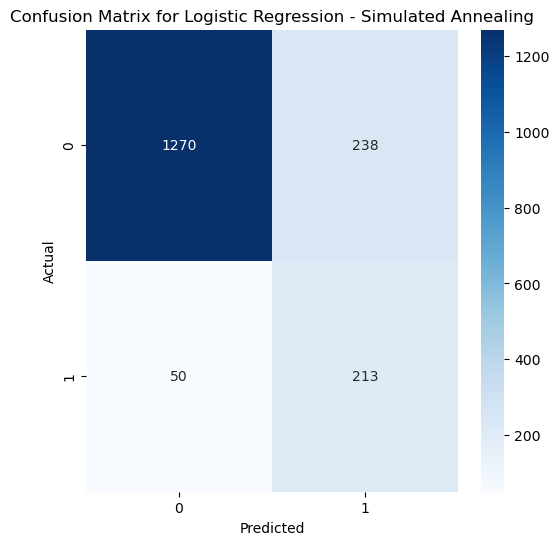

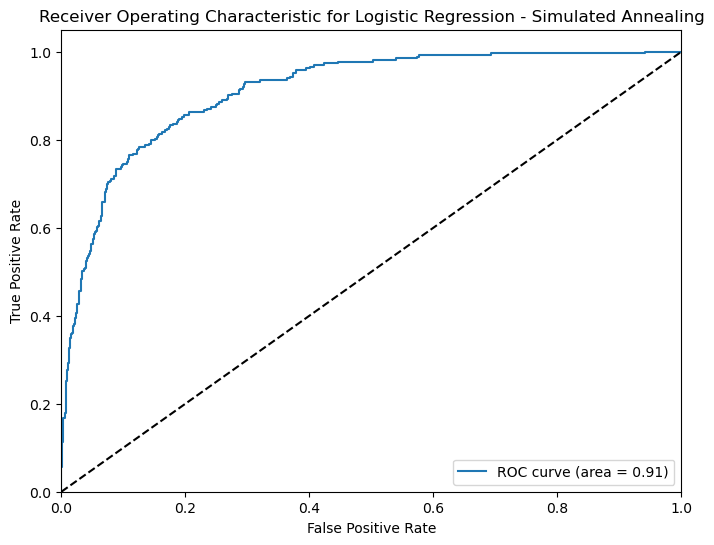

Simulated Annealing Progress: 100%|██████████| 50/50 [00:02<00:00, 17.36it/s]


Best Parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.03125}
Best Accuracy: 0.8696127946127946
Best Precision: 0.8700172027252625
Best Recall: 0.8696127946127946
Best F1 Score: 0.8695752035058156
Best ROC AUC: 0.8696127946127946
Total time taken: 2.8828840255737305 seconds


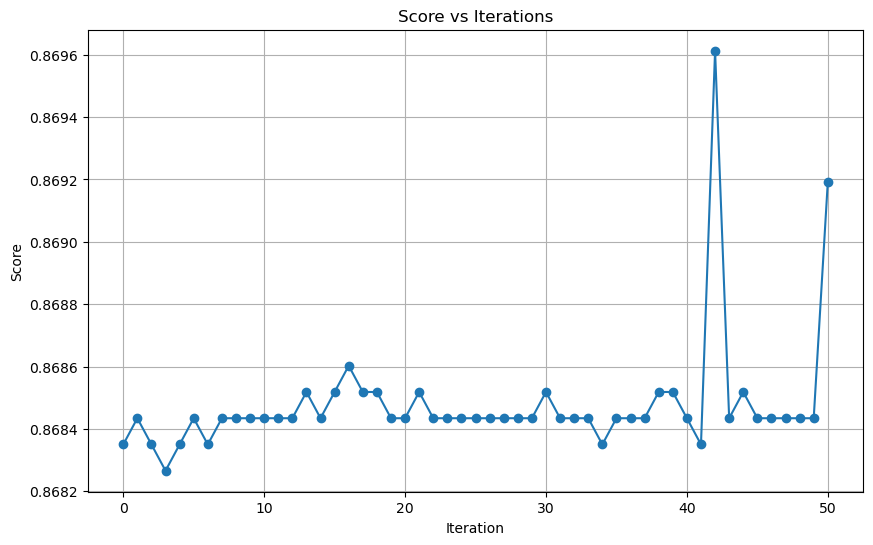

Test Results for testing set of Logistic Regression - Simulated Annealing:
Accuracy: 0.837380
Precision: 0.889379
Recall: 0.837380
F1 Score: 0.853384
ROC AUC: 0.910402


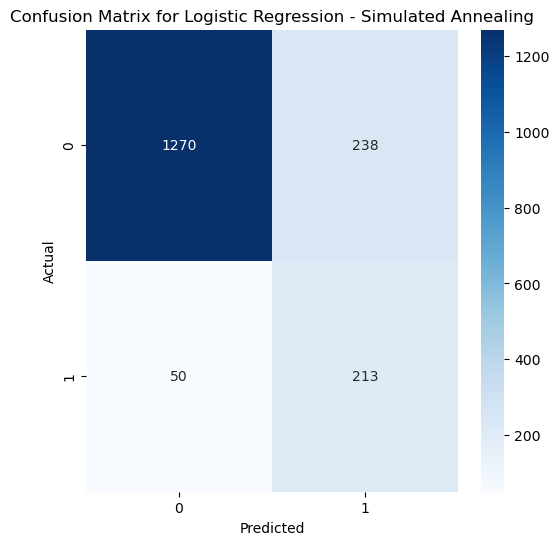

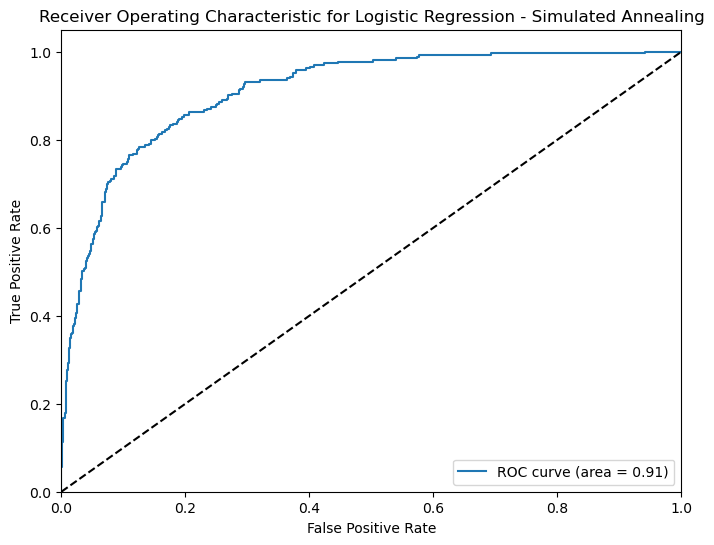

Simulated Annealing Progress: 100%|██████████| 50/50 [00:02<00:00, 17.13it/s]


Best Parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.03125}
Best Accuracy: 0.8696127946127946
Best Precision: 0.8700172027252625
Best Recall: 0.8696127946127946
Best F1 Score: 0.8695752035058156
Best ROC AUC: 0.8696127946127946
Total time taken: 2.921891689300537 seconds


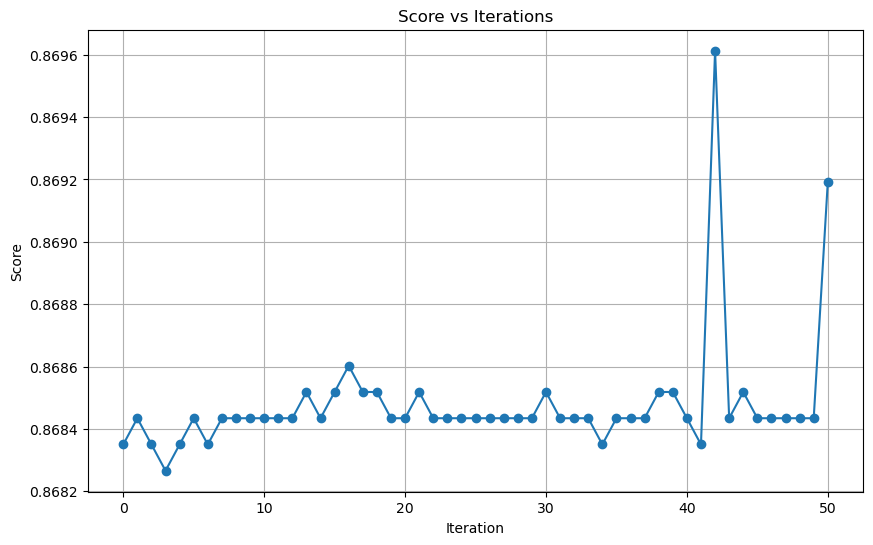

Test Results for testing set of Logistic Regression - Simulated Annealing:
Accuracy: 0.837380
Precision: 0.889379
Recall: 0.837380
F1 Score: 0.853384
ROC AUC: 0.910402


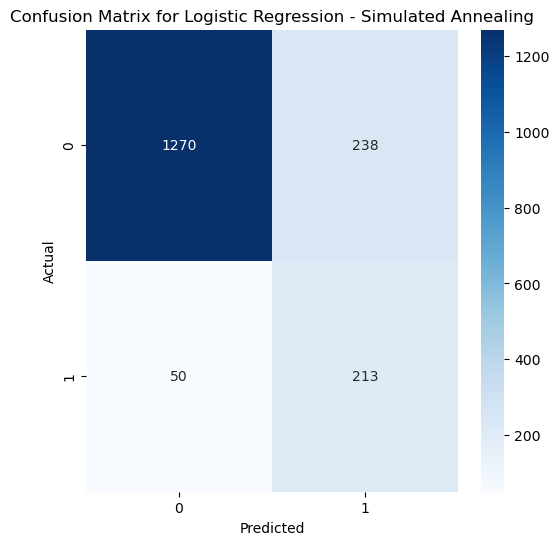

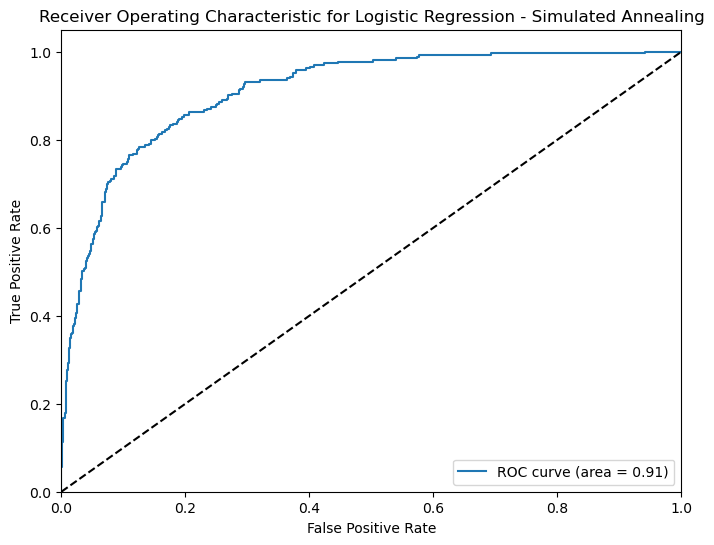

Simulated Annealing Progress: 100%|██████████| 50/50 [00:02<00:00, 17.57it/s]


Best Parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.03125}
Best Accuracy: 0.8696127946127946
Best Precision: 0.8700172027252625
Best Recall: 0.8696127946127946
Best F1 Score: 0.8695752035058156
Best ROC AUC: 0.8696127946127946
Total time taken: 2.847257375717163 seconds


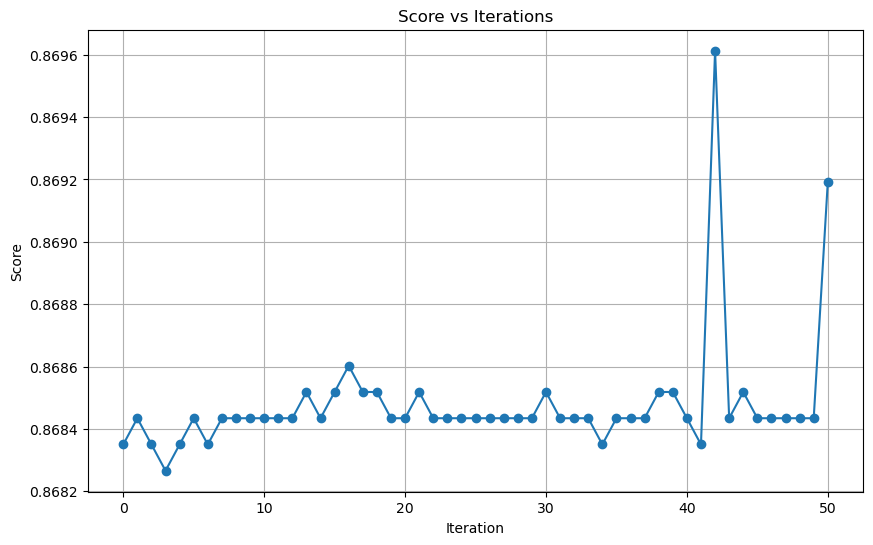

Test Results for testing set of Logistic Regression - Simulated Annealing:
Accuracy: 0.837380
Precision: 0.889379
Recall: 0.837380
F1 Score: 0.853384
ROC AUC: 0.910402


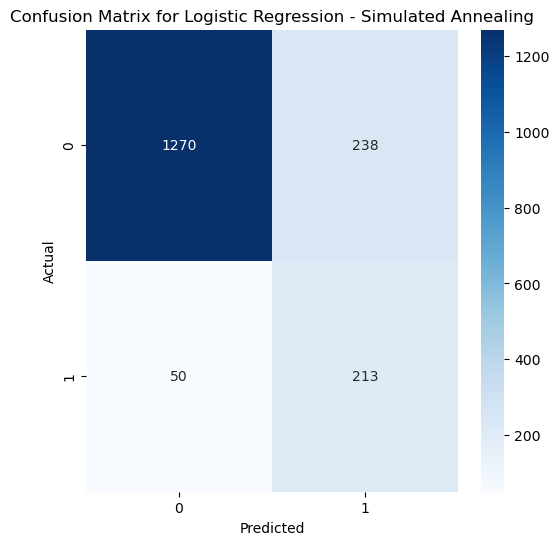

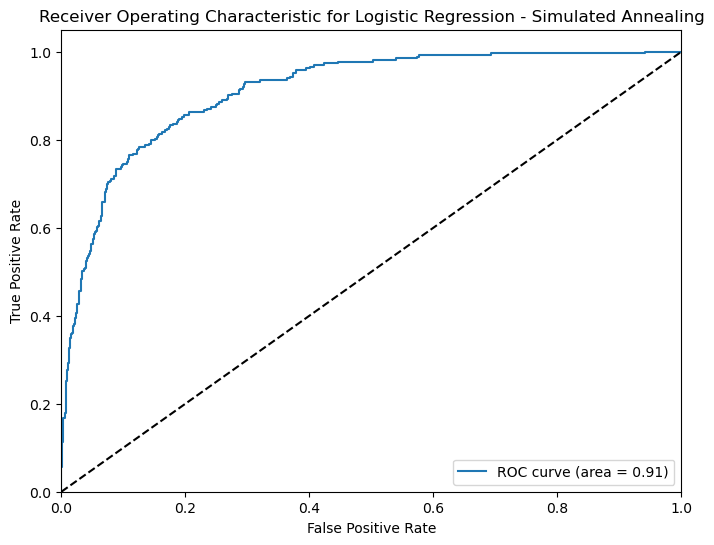

Simulated Annealing Progress: 100%|██████████| 50/50 [00:03<00:00, 16.66it/s]


Best Parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.03125}
Best Accuracy: 0.8696127946127946
Best Precision: 0.8700172027252625
Best Recall: 0.8696127946127946
Best F1 Score: 0.8695752035058156
Best ROC AUC: 0.8696127946127946
Total time taken: 3.002457857131958 seconds


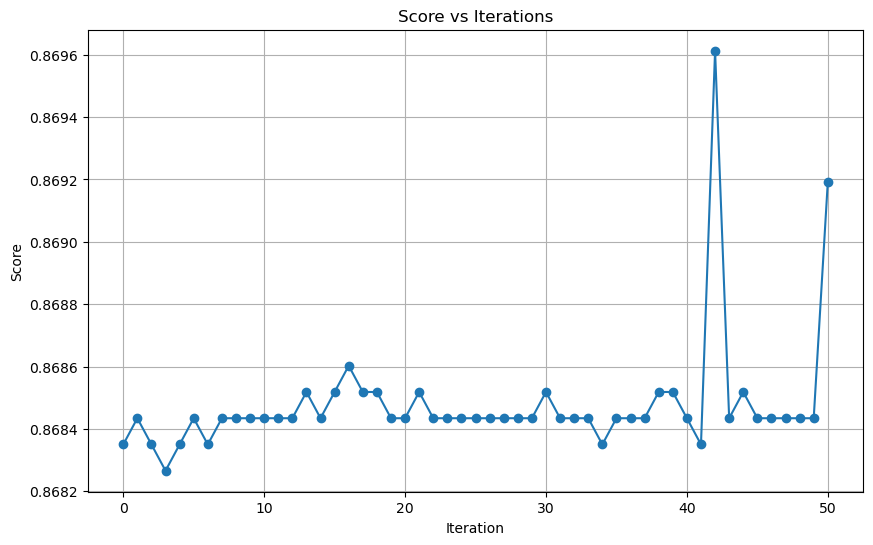

Test Results for testing set of Logistic Regression - Simulated Annealing:
Accuracy: 0.837380
Precision: 0.889379
Recall: 0.837380
F1 Score: 0.853384
ROC AUC: 0.910402


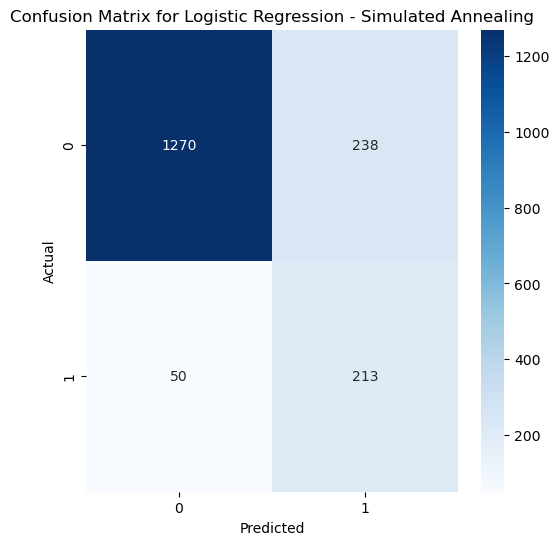

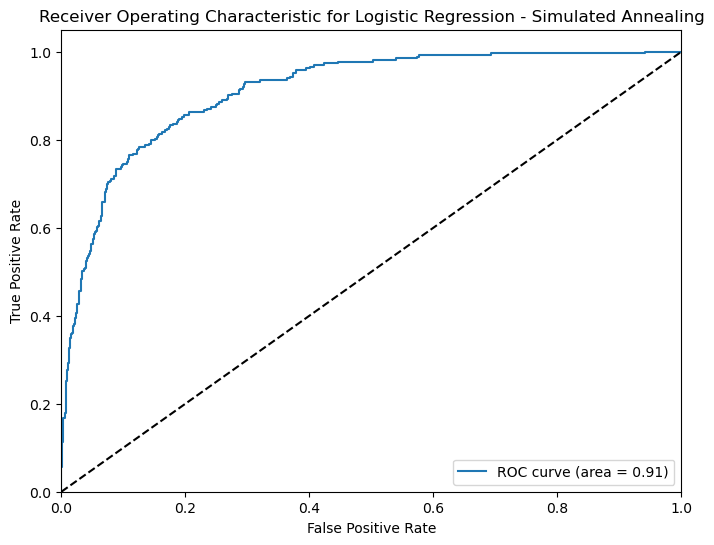

In [76]:
# Initialize the Logistic Regression model with a fixed random state for reproducibility
lr_model_sa = LogisticRegression(random_state=seed_value)

# Prepare an empty DataFrame to store results, with specified columns for evaluation metrics
lr_sa_results_df = pd.DataFrame(columns=columns)

for i in range(5):
    # Apply simulated annealing for hyperparameter optimization on the Logistic Regression model
    lr_sa_best_params, lr_sa_train_result, lr_sa_history, lr_sa_time = simulated_annealing(model=lr_model_sa, 
                                                                                            param_space=param_space_lr, 
                                                                                            max_iter=50, scoring=train_scoring, 
                                                                                            X=X_train, y=y_train, 
                                                                                            initial_temp=100, cooling_rate=0.90, cv_times=cv_times, 
                                                                                            model_type='logistic_regression',
                                                                                            n_jobs=-1, seed=seed_value)

    # Display the best hyperparameters found and their corresponding evaluation metrics
    print("Best Parameters:", lr_sa_best_params)
    print("Best Accuracy:", lr_sa_train_result['mean_accuracy'])
    print("Best Precision:", lr_sa_train_result['mean_precision'])
    print("Best Recall:", lr_sa_train_result['mean_recall'])
    print("Best F1 Score:", lr_sa_train_result['mean_f1'])
    print("Best ROC AUC:", lr_sa_train_result['mean_roc_auc'])
    print(f"Total time taken: {lr_sa_time} seconds")
    
    # Visualize the score vs. iterations to analyze the optimization trajectory
    plot_score_vs_iterations(lr_sa_history)

    # Set the Logistic Regression model with the best parameters found
    lr_model_sa.set_params(**lr_sa_best_params)
    lr_model_sa.fit(X_train, y_train) # Re-train the model on the entire training set

    # Predict labels and probabilities on the test set
    y_pred = lr_model_sa.predict(X_test)
    y_prob = lr_model_sa.predict_proba(X_test)[:, 1]

    # Evaluate the model on the test set and display the results
    lr_sa_test_result = display_test_score(y_test, y_pred, y_prob, 'Logistic Regression - Simulated Annealing')

    # Append the evaluation metrics and model details to the results DataFrame
    lr_sa_results_df = append_to_dataframe(lr_model_sa, lr_sa_best_params, lr_sa_time, lr_sa_train_result, lr_sa_test_result, lr_sa_results_df)
    
    time.sleep(20) # Pause between iterations to reduce load on the system

In [89]:
print(sa_format_history(lr_sa_history))

Iteration: 0
Parameters: {'penalty': 'l1', 'C': 0.5, 'solver': 'saga'}
Score: 0.892256
Status: Initial configuration
Score Difference: 0.000000
Temp: 100

Iteration: 1
Parameters: {'penalty': 'l2', 'C': 8192, 'solver': 'newton-cholesky'}
Score: 0.892761
Status: Improvement and accepted
Score Difference: 0.000505
Temp: 100

Iteration: 2
Parameters: {'penalty': None, 'solver': 'sag'}
Score: 0.892761
Status: No improvement and accepted
Score Difference: 0.000000
Temp: 90.0

Iteration: 3
Parameters: {'penalty': 'l2', 'solver': 'sag', 'C': 2}
Score: 0.892172
Status: No improvement and accepted
Score Difference: -0.000589
Temp: 81.0

Iteration: 4
Parameters: {'penalty': 'l2', 'solver': 'sag', 'C': 8192}
Score: 0.892761
Status: No improvement and accepted
Score Difference: 0.000000
Temp: 72.9

Iteration: 5
Parameters: {'penalty': None, 'solver': 'lbfgs'}
Score: 0.892677
Status: No improvement and accepted
Score Difference: -0.000084
Temp: 65.61000000000001

Iteration: 6
Parameters: {'penalty'

In [90]:
lr_sa_results_df.to_csv(f'lr/lr_sa_result_{seed_value}.csv')

Simulated Annealing Progress: 100%|██████████| 50/50 [01:23<00:00,  1.67s/it]

Best Parameters: {'kernel': 'rbf', 'C': 10, 'degree': 4, 'gamma': 'scale'}
Best Accuracy: 0.9537037037037037
Best Precision: 0.9539012452691419
Best Recall: 0.9537037037037037
Best F1 Score: 0.9536984139759629
Best ROC AUC: 0.9537037037037036
Total time taken: 83.60463762283325 seconds


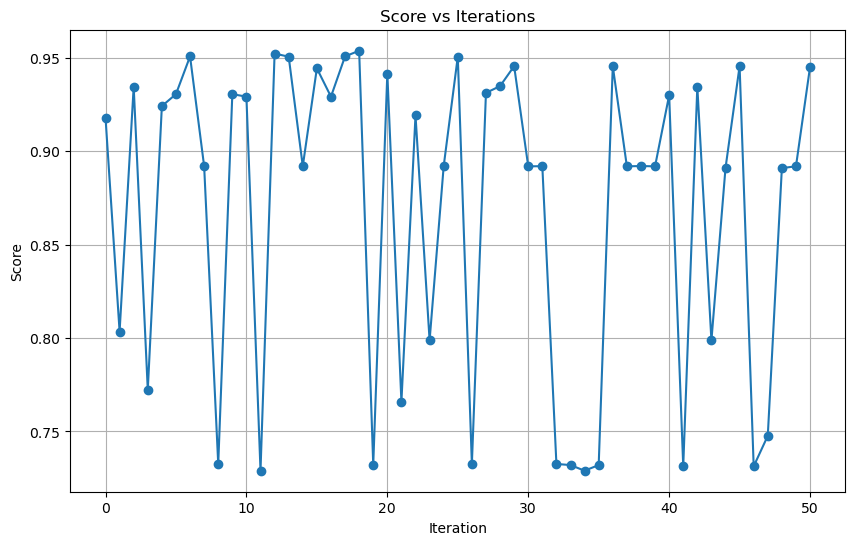

Test Results for testing set of SVC - Simulated Annealing:
Accuracy: 0.927160
Precision: 0.930439
Recall: 0.927160
F1 Score: 0.928508
ROC AUC: 0.954554


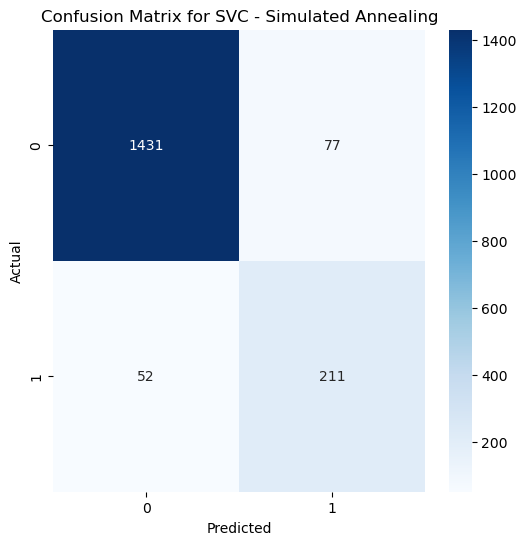

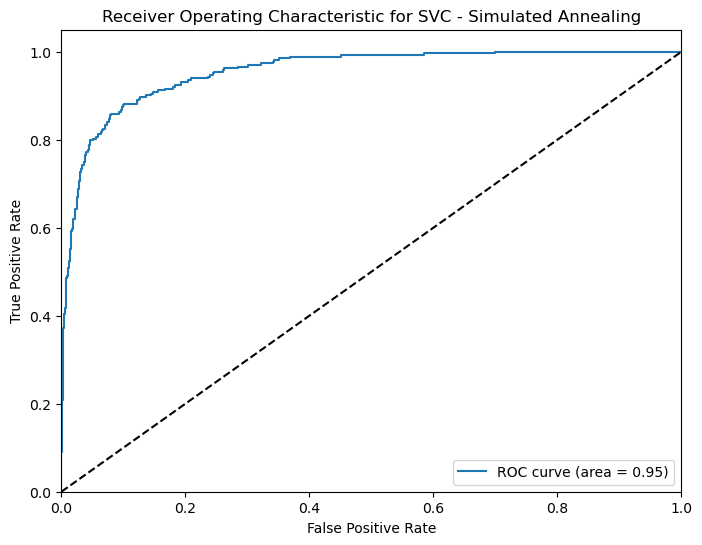

Simulated Annealing Progress:  34%|███▍      | 17/50 [02:10<04:12,  7.65s/it]


KeyboardInterrupt: 

In [91]:
svc_model_sa = SVC(random_state=seed_value)
svc_sa_results_df = pd.DataFrame(columns=columns)

for i in range(5):
    svc_sa_best_params, svc_sa_train_result, svc_sa_history, svc_sa_time = simulated_annealing(model=svc_model_sa, 
                                                                                            param_space=param_space_svc, 
                                                                                            max_iter=50, scoring=train_scoring, 
                                                                                            X=X_train, y=y_train, 
                                                                                            initial_temp=100, cooling_rate=0.90, cv_times=cv_times, 
                                                                                            model_type='svc',
                                                                                            n_jobs=-1, seed=seed_value)

    print("Best Parameters:", svc_sa_best_params)
    print("Best Accuracy:", svc_sa_train_result['mean_accuracy'])
    print("Best Precision:", svc_sa_train_result['mean_precision'])
    print("Best Recall:", svc_sa_train_result['mean_recall'])
    print("Best F1 Score:", svc_sa_train_result['mean_f1'])
    print("Best ROC AUC:", svc_sa_train_result['mean_roc_auc'])
    print(f"Total time taken: {svc_sa_time} seconds")
    
    plot_score_vs_iterations(svc_sa_history)

    svc_model_sa = SVC(random_state=seed_value, probability=True)
    svc_model_sa.set_params(**svc_sa_best_params)
    svc_model_sa.fit(X_train, y_train)

    y_pred = svc_model_sa.predict(X_test)
    y_prob = svc_model_sa.predict_proba(X_test)[:, 1]

    # Score on testing set
    svc_sa_test_result = display_test_score(y_test, y_pred, y_prob, 'SVC - Simulated Annealing')
    svc_sa_results_df = append_to_dataframe(svc_model_sa, svc_sa_best_params, svc_sa_time, svc_sa_train_result, svc_sa_test_result, svc_sa_results_df)
    
    time.sleep(20)

In [ ]:
print(sa_format_history(svc_sa_history))

In [ ]:
svc_sa_results_df.to_csv(f'svc/svc_sa_result_{seed_value}.csv')

In [ ]:
rfc_sa_results_df = pd.DataFrame(columns=columns)
rfc_model_sa = RandomForestClassifier(random_state=seed_value)


for i in range(5):
    rfc_sa_best_params, rfc_sa_train_result, rfc_sa_history, rfc_sa_time = simulated_annealing(model=rfc_model_sa, 
                                                                                            param_space=param_space_rfc, 
                                                                                            max_iter=50, scoring=train_scoring, 
                                                                                            X=X_train, y=y_train, 
                                                                                            initial_temp=100, cooling_rate=0.90, cv_times=cv_times, 
                                                                                            model_type='rfc',
                                                                                            n_jobs=-1, seed=seed_value)

    print("Best Parameters:", rfc_sa_best_params)
    print("Best Accuracy:", rfc_sa_train_result['mean_accuracy'])
    print("Best Precision:", rfc_sa_train_result['mean_precision'])
    print("Best Recall:", rfc_sa_train_result['mean_recall'])
    print("Best F1 Score:", rfc_sa_train_result['mean_f1'])
    print("Best ROC AUC:", rfc_sa_train_result['mean_roc_auc'])
    print(f"Total time taken: {rfc_sa_time} seconds")
    
    plot_score_vs_iterations(rfc_sa_history)

    rfc_model_sa.set_params(**rfc_sa_best_params)
    rfc_model_sa.fit(X_train, y_train)

    y_pred = rfc_model_sa.predict(X_test)
    y_prob = rfc_model_sa.predict_proba(X_test)[:, 1]

    # Score on testing set
    rfc_sa_test_result = display_test_score(y_test, y_pred, y_prob, 'RFC - Simulated Annealing')
    rfc_sa_results_df = append_to_dataframe(rfc_model_sa, rfc_sa_best_params, rfc_sa_time, rfc_sa_train_result, rfc_sa_test_result, rfc_sa_results_df)
    
    time.sleep(20)

In [ ]:
print(sa_format_history(rfc_sa_history))

In [ ]:
rfc_sa_results_df.to_csv(f'rfc/rfc_sa_result_{seed_value}.csv')

In [ ]:
gbc_sa_results_df = pd.DataFrame(columns=columns)
gbc_model_sa = GradientBoostingClassifier(random_state=seed_value)

for i in range(5):
    gbc_sa_best_params, gbc_sa_train_result, gbc_sa_history, gbc_sa_time = simulated_annealing(model=gbc_model_sa, 
                                                                                            param_space=param_space_gbc, 
                                                                                            max_iter=50, scoring=train_scoring, 
                                                                                            X=X_train, y=y_train, 
                                                                                            initial_temp=100, cooling_rate=0.90, cv_times=cv_times, 
                                                                                            model_type='gbc',
                                                                                            n_jobs=-1, seed=seed_value)

    print("Best Parameters:", gbc_sa_best_params)
    print("Best Accuracy:", gbc_sa_train_result['mean_accuracy'])
    print("Best Precision:", gbc_sa_train_result['mean_precision'])
    print("Best Recall:", gbc_sa_train_result['mean_recall'])
    print("Best F1 Score:", gbc_sa_train_result['mean_f1'])
    print("Best ROC AUC:", gbc_sa_train_result['mean_roc_auc'])
    print(f"Total time taken: {gbc_sa_time} seconds")
    
    plot_score_vs_iterations(gbc_sa_history)

    gbc_model_sa.set_params(**gbc_sa_best_params)
    gbc_model_sa.fit(X_train, y_train)

    y_pred = gbc_model_sa.predict(X_test)
    y_prob = gbc_model_sa.predict_proba(X_test)[:, 1]

    # Score on testing set
    gbc_sa_test_result = display_test_score(y_test, y_pred, y_prob, 'GBC - Simulated Annealing')
    gbc_sa_results_df = append_to_dataframe(gbc_model_sa, gbc_sa_best_params, gbc_sa_time, gbc_sa_train_result, gbc_sa_test_result, gbc_sa_results_df)
    
    time.sleep(20)

In [ ]:
print(sa_format_history(gbc_sa_history))

In [ ]:
gbc_sa_results_df.to_csv(f'gbc/gbc_sa_result_{seed_value}.csv')

___
<hr style="height: 3px; border-width:0;">

### 10.3.2 Grid Search

In [ ]:
from grid_search import calculate_grid_size, generate_param_grid, grid_search, gs_format_history, objective_function

In [ ]:
param_grid_lr = generate_param_grid(param_space_lr, model_type='logistic_regression')

print('Param grid size for Logistic Regression: ', calculate_grid_size(param_grid=param_grid_lr, model_type='logistic_regression'))

In [ ]:
lr_model_gs = LogisticRegression(random_state=seed_value)
lr_gs_results_df = pd.DataFrame(columns=columns)


for i in range(5):
    lr_gs_best_params, lr_gs_train_result, lr_gs_history, lr_gs_time = grid_search(model=lr_model_gs, param_grid=param_grid_lr, 
                                                                                   scoring=train_scoring, X=X_train, y=y_train, 
                                                                                   cv_times=cv_times, n_jobs=-1, seed=seed_value,
                                                                                   parallelize=True)

    print("Best Parameters:", lr_gs_best_params)
    print("Best Accuracy:", lr_gs_train_result['mean_accuracy'])
    print("Best Precision:", lr_gs_train_result['mean_precision'])
    print("Best Recall:", lr_gs_train_result['mean_recall'])
    print("Best F1 Score:", lr_gs_train_result['mean_f1'])
    print("Best ROC AUC:", lr_gs_train_result['mean_roc_auc'])
    print(f"Total time taken: {lr_gs_time} seconds")
    
    plot_score_vs_iterations(lr_gs_history)

    lr_model_gs.set_params(**lr_gs_best_params)
    lr_model_gs.fit(X_train, y_train)

    y_pred = lr_model_gs.predict(X_test)
    y_prob = lr_model_gs.predict_proba(X_test)[:, 1]

    # Score on testing set
    lr_gs_test_result = display_test_score(y_test, y_pred, y_prob, 'Logistic Regression - Grid Search')
    lr_gs_results_df = append_to_dataframe(lr_model_gs, lr_gs_best_params, lr_gs_time, lr_gs_train_result, lr_gs_test_result, lr_gs_results_df)
    
    time.sleep(20)

In [ ]:
print(gs_format_history(lr_gs_history))

In [ ]:
lr_gs_results_df.to_csv(f'lr/lr_gs_result_{seed_value}.csv')

In [ ]:
param_grid_svc = generate_param_grid(param_space_svc, model_type='svc')

print('Param grid size for SVC: ', calculate_grid_size(param_grid=param_grid_svc, model_type='svc'))

In [ ]:
svc_model_gs = SVC(random_state=seed_value)
svc_gs_results_df = pd.DataFrame(columns=columns)


for i in range(5):
    svc_gs_best_params, svc_gs_train_result, svc_gs_history, svc_gs_time = grid_search(model=svc_model_gs, param_grid=param_grid_svc, 
                                                                                   scoring=train_scoring, X=X_train, y=y_train, 
                                                                                   cv_times=cv_times, n_jobs=-1, seed=seed_value,
                                                                                   parallelize=True)

    print("Best Parameters:", svc_gs_best_params)
    print("Best Accuracy:", svc_gs_train_result['mean_accuracy'])
    print("Best Precision:", svc_gs_train_result['mean_precision'])
    print("Best Recall:", svc_gs_train_result['mean_recall'])
    print("Best F1 Score:", svc_gs_train_result['mean_f1'])
    print("Best ROC AUC:", svc_gs_train_result['mean_roc_auc'])
    print(f"Total time taken: {svc_gs_time} seconds")
    
    plot_score_vs_iterations(svc_gs_history)
    
    svc_model_gs = SVC(probability=True, random_state=seed_value)
    svc_model_gs.set_params(**svc_gs_best_params)
    svc_model_gs.fit(X_train, y_train)

    y_pred = svc_model_gs.predict(X_test)
    y_prob = svc_model_gs.predict_proba(X_test)[:, 1]

    # Score on testing set
    svc_gs_test_result = display_test_score(y_test, y_pred, y_prob, 'SVC - Grid Search')
    svc_gs_results_df = append_to_dataframe(svc_model_gs, svc_gs_best_params, svc_gs_time, svc_gs_train_result, svc_gs_test_result, svc_gs_results_df)
    
    time.sleep(20)

In [ ]:
print(gs_format_history(svc_gs_history))

In [ ]:
svc_gs_results_df.to_csv(f'svc/svc_gs_result_{seed_value}.csv')

In [ ]:
param_grid_rfc = generate_param_grid(param_space_rfc, model_type='rfc')

print('Param grid size for RFC: ', calculate_grid_size(param_grid=param_grid_rfc, model_type='rfc'))

In [ ]:
rfc_model_gs = RandomForestClassifier(random_state=seed_value)
rfc_gs_results_df = pd.DataFrame(columns=columns)


for i in range(5):
    rfc_gs_best_params, rfc_gs_train_result, rfc_gs_history, rfc_gs_time = grid_search(model=rfc_model_gs, param_grid=param_grid_rfc, 
                                                                                   scoring=train_scoring, X=X_train, y=y_train, 
                                                                                   cv_times=cv_times, n_jobs=-1, seed=seed_value,
                                                                                   parallelize=True)

    print("Best Parameters:", rfc_gs_best_params)
    print("Best Accuracy:", rfc_gs_train_result['mean_accuracy'])
    print("Best Precision:", rfc_gs_train_result['mean_precision'])
    print("Best Recall:", rfc_gs_train_result['mean_recall'])
    print("Best F1 Score:", rfc_gs_train_result['mean_f1'])
    print("Best ROC AUC:", rfc_gs_train_result['mean_roc_auc'])
    print(f"Total time taken: {rfc_gs_time} seconds")
    
    plot_score_vs_iterations(rfc_gs_history)
    
    rfc_model_gs.set_params(**rfc_gs_best_params)
    rfc_model_gs.fit(X_train, y_train)

    y_pred = rfc_model_gs.predict(X_test)
    y_prob = rfc_model_gs.predict_proba(X_test)[:, 1]

    # Score on testing set
    rfc_gs_test_result = display_test_score(y_test, y_pred, y_prob, 'RFC - Grid Search')
    rfc_gs_results_df = append_to_dataframe(rfc_model_gs, rfc_gs_best_params, rfc_gs_time, rfc_gs_train_result, rfc_gs_test_result, rfc_gs_results_df)
    
    time.sleep(20)

In [ ]:
print(gs_format_history(rfc_gs_history))

In [ ]:
rfc_gs_results_df.to_csv(f'rfc/rfc_gs_result_{seed_value}.csv')

In [ ]:
param_grid_gbc = generate_param_grid(param_space_gbc, model_type='gbc')

print('Param grid size for GBC: ', calculate_grid_size(param_grid=param_grid_gbc, model_type='gbc'))

In [ ]:
gbc_model_gs = GradientBoostingClassifier(random_state=seed_value)
gbc_gs_results_df = pd.DataFrame(columns=columns)


for i in range(1):
    gbc_gs_best_params, gbc_gs_train_result, gbc_gs_history, gbc_gs_time = grid_search(model=gbc_model_gs, param_grid=param_grid_gbc, 
                                                                                   scoring=train_scoring, X=X_train, y=y_train, 
                                                                                   cv_times=cv_times, n_jobs=-1, seed=seed_value,
                                                                                   parallelize=True)

    print("Best Parameters:", gbc_gs_best_params)
    print("Best Accuracy:", gbc_gs_train_result['mean_accuracy'])
    print("Best Precision:", gbc_gs_train_result['mean_precision'])
    print("Best Recall:", gbc_gs_train_result['mean_recall'])
    print("Best F1 Score:", gbc_gs_train_result['mean_f1'])
    print("Best ROC AUC:", gbc_gs_train_result['mean_roc_auc'])
    print(f"Total time taken: {gbc_gs_time} seconds")
    
    plot_score_vs_iterations(gbc_gs_history)
    
    gbc_model_gs.set_params(**gbc_gs_best_params)
    gbc_model_gs.fit(X_train, y_train)

    y_pred = gbc_model_gs.predict(X_test)
    y_prob = gbc_model_gs.predict_proba(X_test)[:, 1]

    # Score on testing set
    gbc_gs_test_result = display_test_score(y_test, y_pred, y_prob, 'GBC - Grid Search')
    gbc_gs_results_df = append_to_dataframe(gbc_model_gs, gbc_gs_best_params, gbc_gs_time, gbc_gs_train_result, gbc_gs_test_result, gbc_gs_results_df)
    
    time.sleep(20)

In [ ]:
print(gs_format_history(gbc_gs_history))

In [ ]:
gbc_gs_results_df.to_csv(f'gbc/gbc_gs_result_{seed_value}.csv')

___
<hr style="height: 3px; border-width:0;">

### 10.3.3 Half Grid Search

In [ ]:
from half_grid_search import halving_grid_search, hs_format_history

In [ ]:
lr_hs_results_df = pd.DataFrame(columns=columns)
lr_model_hs = LogisticRegression(random_state=seed_value)

for i in range(5):
    lr_hs_best_params, lr_hs_train_result, lr_hs_history, lr_hs_time = halving_grid_search(model=lr_model_hs, 
                                                                                           param_space=param_space_lr, 
                                                                                           scoring=train_scoring, 
                                                                                           X=X_train, y=y_train, 
                                                                                           cv_times=cv_times, n_iterations=10, factor=2,
                                                                                           dynamic_reduction=False, n_jobs=-1,
                                                                                           model_type='logistic_regression',
                                                                                           seed=seed_value)

    print("Best Parameters:", lr_hs_best_params)
    print("Best Accuracy:", lr_hs_train_result['mean_accuracy'])
    print("Best Precision:", lr_hs_train_result['mean_precision'])
    print("Best Recall:", lr_hs_train_result['mean_recall'])
    print("Best F1 Score:", lr_hs_train_result['mean_f1'])
    print("Best ROC AUC:", lr_hs_train_result['mean_roc_auc'])
    print(f"Total time taken: {lr_hs_time} seconds")
    
    plot_score_vs_iterations(lr_hs_history)

    lr_model_hs.set_params(**lr_hs_best_params)
    lr_model_hs.fit(X_train, y_train)

    y_pred = lr_model_hs.predict(X_test)
    y_prob = lr_model_hs.predict_proba(X_test)[:, 1]

    # Score on testing set
    lr_hs_test_result = display_test_score(y_test, y_pred, y_prob, 'Logistic Regression - Half Grid Search')
    lr_hs_results_df = append_to_dataframe(lr_model_hs, lr_hs_best_params, lr_hs_time, lr_hs_train_result, lr_hs_test_result, lr_hs_results_df)
    
    time.sleep(20)

In [ ]:
print(hs_format_history(lr_hs_history))

In [ ]:
lr_hs_results_df.to_csv(f'lr/lr_hs_result_{seed_value}.csv')

In [ ]:
svc_hs_results_df = pd.DataFrame(columns=columns)
svc_model_hs = SVC(random_state=seed_value)

for i in range(5):
    svc_hs_best_params, svc_hs_train_result, svc_hs_history, svc_hs_time = halving_grid_search(model=svc_model_hs, 
                                                                                           param_space=param_space_svc, 
                                                                                           scoring=train_scoring, 
                                                                                           X=X_train, y=y_train, 
                                                                                           cv_times=cv_times, n_iterations=10, factor=2,
                                                                                           dynamic_reduction=False, n_jobs=-1,
                                                                                           model_type='svc',
                                                                                           seed=seed_value)

    print("Best Parameters:", svc_hs_best_params)
    print("Best Accuracy:", svc_hs_train_result['mean_accuracy'])
    print("Best Precision:", svc_hs_train_result['mean_precision'])
    print("Best Recall:", svc_hs_train_result['mean_recall'])
    print("Best F1 Score:", svc_hs_train_result['mean_f1'])
    print("Best ROC AUC:", svc_hs_train_result['mean_roc_auc'])
    print(f"Total time taken: {svc_hs_time} seconds")
    
    plot_score_vs_iterations(svc_hs_history)

    svc_model_hs = SVC(probability=True, random_state=seed_value)
    svc_model_hs.set_params(**svc_hs_best_params)
    svc_model_hs.fit(X_train, y_train)

    y_pred = svc_model_hs.predict(X_test)
    y_prob = svc_model_hs.predict_proba(X_test)[:, 1]

    # Score on testing set
    svc_hs_test_result = display_test_score(y_test, y_pred, y_prob, 'SVC - Half Grid Search')
    svc_hs_results_df = append_to_dataframe(svc_model_hs, svc_hs_best_params, svc_hs_time, svc_hs_train_result, svc_hs_test_result, svc_hs_results_df)
    
    time.sleep(20)

In [ ]:
print(hs_format_history(svc_hs_history))

In [ ]:
svc_hs_results_df.to_csv(f'svc/svc_hs_result_{seed_value}.csv')

In [ ]:
rfc_hs_results_df = pd.DataFrame(columns=columns)
rfc_model_hs = RandomForestClassifier(random_state=seed_value)

for i in range(5):
    rfc_hs_best_params, rfc_hs_train_result, rfc_hs_history, rfc_hs_time = halving_grid_search(model=rfc_model_hs, 
                                                                                           param_space=param_space_rfc, 
                                                                                           scoring=train_scoring, 
                                                                                           X=X_train, y=y_train, 
                                                                                           cv_times=cv_times, n_iterations=10, factor=2,
                                                                                           dynamic_reduction=False, n_jobs=-1,
                                                                                           model_type='rfc',
                                                                                           seed=seed_value)

    print("Best Parameters:", rfc_hs_best_params)
    print("Best Accuracy:", rfc_hs_train_result['mean_accuracy'])
    print("Best Precision:", rfc_hs_train_result['mean_precision'])
    print("Best Recall:", rfc_hs_train_result['mean_recall'])
    print("Best F1 Score:", rfc_hs_train_result['mean_f1'])
    print("Best ROC AUC:", rfc_hs_train_result['mean_roc_auc'])
    print(f"Total time taken: {rfc_hs_time} seconds")
    
    plot_score_vs_iterations(rfc_hs_history)

    rfc_model_hs.set_params(**rfc_hs_best_params)
    rfc_model_hs.fit(X_train, y_train)

    y_pred = rfc_model_hs.predict(X_test)
    y_prob = rfc_model_hs.predict_proba(X_test)[:, 1]

    # Score on testing set
    rfc_hs_test_result = display_test_score(y_test, y_pred, y_prob, 'RFC - Half Grid Search')
    rfc_hs_results_df = append_to_dataframe(rfc_model_hs, rfc_hs_best_params, rfc_hs_time, rfc_hs_train_result, rfc_hs_test_result, rfc_hs_results_df)
    
    time.sleep(20)

In [ ]:
print(hs_format_history(rfc_hs_history))

In [ ]:
rfc_hs_results_df.to_csv(f'rfc/rfc_hs_result_{seed_value}.csv')

In [ ]:
gbc_hs_results_df = pd.DataFrame(columns=columns)
gbc_model_hs = GradientBoostingClassifier(random_state=seed_value)

for i in range(5):
    gbc_hs_best_params, gbc_hs_train_result, gbc_hs_history, gbc_hs_time = halving_grid_search(model=gbc_model_hs, 
                                                                                           param_space=param_space_gbc, 
                                                                                           scoring=train_scoring, 
                                                                                           X=X_train, y=y_train, 
                                                                                           cv_times=cv_times, n_iterations=10, factor=2,
                                                                                           dynamic_reduction=False, n_jobs=-1,
                                                                                           model_type='gbc',
                                                                                           seed=seed_value)

    print("Best Parameters:", gbc_hs_best_params)
    print("Best Accuracy:", gbc_hs_train_result['mean_accuracy'])
    print("Best Precision:", gbc_hs_train_result['mean_precision'])
    print("Best Recall:", gbc_hs_train_result['mean_recall'])
    print("Best F1 Score:", gbc_hs_train_result['mean_f1'])
    print("Best ROC AUC:", gbc_hs_train_result['mean_roc_auc'])
    print(f"Total time taken: {gbc_hs_time} seconds")
    
    plot_score_vs_iterations(gbc_hs_history)

    gbc_model_hs.set_params(**gbc_hs_best_params)
    gbc_model_hs.fit(X_train, y_train)

    y_pred = gbc_model_hs.predict(X_test)
    y_prob = gbc_model_hs.predict_proba(X_test)[:, 1]

    # Score on testing set
    gbc_hs_test_result = display_test_score(y_test, y_pred, y_prob, 'GBC - Half Grid Search')
    gbc_hs_results_df = append_to_dataframe(gbc_model_hs, gbc_hs_best_params, gbc_hs_time, gbc_hs_train_result, gbc_hs_test_result, gbc_hs_results_df)
    
    time.sleep(20)

In [ ]:
print(hs_format_history(gbc_hs_history))

In [ ]:
gbc_hs_results_df.to_csv(f'gbc/gbc_hs_result_{seed_value}.csv')

___
<hr style="height: 3px; border-width:0;">

### 10.3.4 Generic Algorithm

In [ ]:
from genetic_algorithm import genetic_algorithm, format_ga_history, access_population_info

In [ ]:
lr_ga_results_df = pd.DataFrame(columns=columns)
lr_model_ga = LogisticRegression(random_state=seed_value)

for i in range(5):
    lr_ga_best_params, lr_ga_train_result, lr_ga_history, lr_ga_time = genetic_algorithm(model=lr_model_ga, 
                                                                                         param_space=param_space_lr, 
                                                                                         scoring=train_scoring, X=X_train, 
                                                                                         y=y_train, cv_times=cv_times, 
                                                                                         pop_size=5, max_iterations=10, 
                                                                                         no_improve_limit=100, n_jobs=-1, 
                                                                                         sel_rate=0.2, mut_rate=0.8, 
                                                                                         model_type='logistic_regression',
                                                                                         seed=seed_value)

    print("Best Parameters:", lr_ga_best_params)
    print("Best Accuracy:", lr_ga_train_result['mean_accuracy'])
    print("Best Precision:", lr_ga_train_result['mean_precision'])
    print("Best Recall:", lr_ga_train_result['mean_recall'])
    print("Best F1 Score:", lr_ga_train_result['mean_f1'])
    print("Best ROC AUC:", lr_ga_train_result['mean_roc_auc'])
    print(f"Total time taken: {lr_ga_time} seconds")
    
    plot_score_vs_iterations(lr_ga_history)

    lr_model_ga.set_params(**lr_ga_best_params)
    lr_model_ga.fit(X_train, y_train)

    y_pred = lr_model_ga.predict(X_test)
    y_prob = lr_model_ga.predict_proba(X_test)[:, 1]

    # Score on testing set
    lr_ga_test_result = display_test_score(y_test, y_pred, y_prob, 'Logistic Regression - Genetic Algorithm')
    lr_ga_results_df = append_to_dataframe(lr_model_ga, lr_ga_best_params, lr_ga_time, lr_ga_train_result, lr_ga_test_result, lr_ga_results_df)
    
    time.sleep(20)

In [ ]:
print(format_ga_history(lr_ga_history))

In [ ]:
lr_ga_results_df.to_csv(f'lr/lr_ga_result_{seed_value}.csv')

In [ ]:
access_population_info(lr_ga_history)

In [ ]:
svc_ga_results_df = pd.DataFrame(columns=columns)
svc_model_ga = SVC(random_state=seed_value)

for i in range(5):
    svc_ga_best_params, svc_ga_train_result, svc_ga_history, svc_ga_time = genetic_algorithm(model=svc_model_ga, 
                                                                                         param_space=param_space_svc, 
                                                                                         scoring=train_scoring, X=X_train, 
                                                                                         y=y_train, cv_times=cv_times, 
                                                                                         pop_size=5, max_iterations=10, 
                                                                                         no_improve_limit=100, n_jobs=-1, 
                                                                                         sel_rate=0.2, mut_rate=0.8, 
                                                                                         model_type='svc',
                                                                                         seed=seed_value)

    print("Best Parameters:", svc_ga_best_params)
    print("Best Accuracy:", svc_ga_train_result['mean_accuracy'])
    print("Best Precision:", svc_ga_train_result['mean_precision'])
    print("Best Recall:", svc_ga_train_result['mean_recall'])
    print("Best F1 Score:", svc_ga_train_result['mean_f1'])
    print("Best ROC AUC:", svc_ga_train_result['mean_roc_auc'])
    print(f"Total time taken: {svc_ga_time} seconds")
    
    plot_score_vs_iterations(svc_ga_history)

    svc_model_ga = SVC(probability=True, random_state=seed_value)
    svc_model_ga.set_params(**svc_ga_best_params)
    svc_model_ga.fit(X_train, y_train)

    y_pred = svc_model_ga.predict(X_test)
    y_prob = svc_model_ga.predict_proba(X_test)[:, 1]

    # Score on testing set
    svc_ga_test_result = display_test_score(y_test, y_pred, y_prob, 'SVC - Genetic Algorithm')
    svc_ga_results_df = append_to_dataframe(svc_model_ga, svc_ga_best_params, svc_ga_time, svc_ga_train_result, svc_ga_test_result, svc_ga_results_df)
    
    time.sleep(20)

In [ ]:
print(format_ga_history(svc_ga_history))

In [ ]:
access_population_info(svc_ga_history)

In [ ]:
svc_ga_results_df.to_csv(f'svc/svc_ga_result_{seed_value}.csv')

In [ ]:
rfc_ga_results_df = pd.DataFrame(columns=columns)
rfc_model_ga = RandomForestClassifier(random_state=seed_value)

for i in range(5):
    rfc_ga_best_params, rfc_ga_train_result, rfc_ga_history, rfc_ga_time = genetic_algorithm(model=rfc_model_ga, 
                                                                                         param_space=param_space_rfc, 
                                                                                         scoring=train_scoring, X=X_train, 
                                                                                         y=y_train, cv_times=cv_times, 
                                                                                         pop_size=5, max_iterations=10, 
                                                                                         no_improve_limit=100, n_jobs=-1, 
                                                                                         sel_rate=0.2, mut_rate=0.8, 
                                                                                         model_type='rfc',
                                                                                         seed=seed_value)

    print("Best Parameters:", rfc_ga_best_params)
    print("Best Accuracy:", rfc_ga_train_result['mean_accuracy'])
    print("Best Precision:", rfc_ga_train_result['mean_precision'])
    print("Best Recall:", rfc_ga_train_result['mean_recall'])
    print("Best F1 Score:", rfc_ga_train_result['mean_f1'])
    print("Best ROC AUC:", rfc_ga_train_result['mean_roc_auc'])
    print(f"Total time taken: {rfc_ga_time} seconds")
    
    plot_score_vs_iterations(rfc_ga_history)

    rfc_model_ga.set_params(**rfc_ga_best_params)
    rfc_model_ga.fit(X_train, y_train)

    y_pred = rfc_model_ga.predict(X_test)
    y_prob = rfc_model_ga.predict_proba(X_test)[:, 1]

    # Score on testing set
    rfc_ga_test_result = display_test_score(y_test, y_pred, y_prob, 'RFC - Genetic Algorithm')
    rfc_ga_results_df = append_to_dataframe(rfc_model_ga, rfc_ga_best_params, rfc_ga_time, rfc_ga_train_result, rfc_ga_test_result, rfc_ga_results_df)
    
    time.sleep(20)

In [ ]:
print(format_ga_history(rfc_ga_history))

In [ ]:
access_population_info(rfc_ga_history)

In [ ]:
rfc_ga_results_df.to_csv(f'rfc/rfc_ga_result_{seed_value}.csv')

In [ ]:
gbc_ga_results_df = pd.DataFrame(columns=columns)
gbc_model_ga = GradientBoostingClassifier(random_state=seed_value)

for i in range(5):
    gbc_ga_best_params, gbc_ga_train_result, gbc_ga_history, gbc_ga_time = genetic_algorithm(model=gbc_model_ga, 
                                                                                         param_space=param_space_gbc, 
                                                                                         scoring=train_scoring, X=X_train, 
                                                                                         y=y_train, cv_times=cv_times, 
                                                                                         pop_size=5, max_iterations=10, 
                                                                                         no_improve_limit=100, n_jobs=-1, 
                                                                                         sel_rate=0.2, mut_rate=0.8, 
                                                                                         model_type='gbc',
                                                                                         seed=seed_value)

    print("Best Parameters:", gbc_ga_best_params)
    print("Best Accuracy:", gbc_ga_train_result['mean_accuracy'])
    print("Best Precision:", gbc_ga_train_result['mean_precision'])
    print("Best Recall:", gbc_ga_train_result['mean_recall'])
    print("Best F1 Score:", gbc_ga_train_result['mean_f1'])
    print("Best ROC AUC:", gbc_ga_train_result['mean_roc_auc'])
    print(f"Total time taken: {gbc_ga_time} seconds")
    
    plot_score_vs_iterations(gbc_ga_history)

    gbc_model_ga.set_params(**gbc_ga_best_params)
    gbc_model_ga.fit(X_train, y_train)

    y_pred = gbc_model_ga.predict(X_test)
    y_prob = gbc_model_ga.predict_proba(X_test)[:, 1]

    # Score on testing set
    gbc_ga_test_result = display_test_score(y_test, y_pred, y_prob, 'GBC - Genetic Algorithm')
    gbc_ga_results_df = append_to_dataframe(gbc_model_ga, gbc_ga_best_params, gbc_ga_time, gbc_ga_train_result, gbc_ga_test_result, gbc_ga_results_df)
    
    time.sleep(20)

In [ ]:
print(format_ga_history(gbc_ga_history))

In [ ]:
access_population_info(gbc_ga_history)

In [ ]:
gbc_ga_results_df.to_csv(f'gbc/gbc_ga_result_{seed_value}.csv')